<a href="https://colab.research.google.com/github/juyeonshin/datafestival2021/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8E%98%EC%8A%A4%ED%8B%B0%EB%B2%8C_4%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-1. 데이터 전처리_ 소득 대비 주거비 지출 비율(RIR)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
#'2019 주거실태조사'파일 불러오기
df_rir = pd.read_csv('/content/drive/Shareddrives/data_festival/일반가구_2019_20211111_01715.csv', encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,31,158,162,194,196,319,325,328,350) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_rir.info()
df_rir.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61170 entries, 0 to 61169
Columns: 352 entries, 시도 to 최종가중치
dtypes: float64(246), int64(93), object(13)
memory usage: 164.3+ MB


(61170, 352)

In [ ]:
#열 이름 확인하기
df_rir.columns

Index(['시도', '동부/읍면부 구분', '문1. 귀하는 가구주나 가구주의 배우자이십니까?',
       '문1. (기타) 귀하는 가구주나 가구주의 배우자이십니까?',
       '문2. 귀 댁의 가구주는 몇 년도부터 가구주가 되셨습니까?_년도',
       '문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도',
       '문4. 귀 댁의 주택 유형은 무엇입니까?', '문4. (기타오픈) 귀 댁의 주택 유형은 무엇입니까?',
       '문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?', '문7. 귀 댁의 점유형태는 어디에 해당됩니까?',
       ...
       '문1. 주택개조 경험 유무_7) 주택 내 응급 비상벨_(2) 개조 필요성 여부',
       '문1. 주택개조 경험 유무_8) 적절한 높이의 부엌 작업대_(1) 설치 및 개조 여부',
       '문1. 주택개조 경험 유무_8) 적절한 높이의 부엌 작업대_(2) 개조 필요성 여부',
       '문1. 주택개조 경험 유무_9) 레버형 수전(수도꼭지)_(1) 설치 및 개조 여부',
       '문1. 주택개조 경험 유무_9) 레버형 수전(수도꼭지)_(2) 개조 필요성 여부',
       '문1. 주택개조 경험 유무_10) 현관에 보조의자 설치_(1) 설치 및 개조 여부',
       '문1. 주택개조 경험 유무_10) 현관에 보조의자 설치_(2) 개조 필요성 여부',
       '문2. 실제 개조를 못하거나 하지 않고 있다면 그 이유는 무엇입니까?',
       '문2. (기타오픈) 실제 개조를 못하거나 하지 않고 있다면 그 이유는 무엇입니까?', '최종가중치'],
      dtype='object', length=352)

In [ ]:
#필요한 데이터 열만 추출
df_rir = df_rir.iloc[0:,[0,6,9,35,36,81,220,275,283,284,285,286,287,288,290,295]]
df_rir.head()
df_rir.shape

(61170, 16)

In [ ]:
#열 이름 바꾸기
df_rir.columns = ['지역', '주택유형', '점유형태', '임차료_월세', '임차료_전세보증금','면적',
                  '나이','가구원 수', '월근로소득','월재산소득','월사회보험수혜금','월정부보조금',
                  '월사적이전소득', '월경상소득','월비경상소득', '월평균주거관리비']
# 주택유형
#1. 일반단독주택, 2. 다가구단독주택, 3. 영업겸용단독주택, 4. 아파트, 5. 연립주택, 6. 다세대주택, 7. 비거주용건물(상가·공장·여관 등)내 주택, 8. 오피스텔, 9. 고시원, 10. 판잣집·비닐하우스·컨테이너·움막, 11. 기타
df_rir.head()

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비
0,11,4,1,NaN,NaN,59.504130,93,1,0,20,50,20,0,90,0,12
1,11,4,3,20.0,NaN,66.115700,94,1,0,0,30,25,15,70,0,14
2,11,4,1,NaN,NaN,125.619830,92,2,0,115,30,0,0,145,0,23
3,11,4,1,NaN,NaN,132.231400,93,2,0,0,100,0,60,160,100,37
4,11,3,1,NaN,NaN,159.999994,99,2,0,220,0,0,0,220,0,14


In [ ]:
#결측값 처리
df_rir=df_rir.fillna(0)

In [ ]:
#'월 소득 합'열 새로 만들기
df_rir['월 소득 합'] = df_rir['월근로소득']+df_rir['월재산소득']+df_rir['월사회보험수혜금']+df_rir['월정부보조금']
+df_rir['월사적이전소득']+df_rir['월경상소득']+df_rir['월비경상소득']

df_rir.head()

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비,월 소득 합
0,11,4,1,0.0,0.0,59.504130,93,1,0,20,50,20,0,90,0,12,90
1,11,4,3,20.0,0.0,66.115700,94,1,0,0,30,25,15,70,0,14,55
2,11,4,1,0.0,0.0,125.619830,92,2,0,115,30,0,0,145,0,23,145
3,11,4,1,0.0,0.0,132.231400,93,2,0,0,100,0,60,160,100,37,100
4,11,3,1,0.0,0.0,159.999994,99,2,0,220,0,0,0,220,0,14,220


In [ ]:
#이상치 제거하기
df_rir = df_rir.drop(df_rir[df_rir['월 소득 합'] == 9999999].index)
df_rir = df_rir.drop(df_rir[df_rir['월평균주거관리비'] == 9999999].index)
df_rir = df_rir.drop(df_rir[df_rir['임차료_전세보증금'] == 9999999].index)
df_rir = df_rir.drop(df_rir[df_rir['월 소득 합'] == 0].index)

In [ ]:
#'전세 월 임대료'열 새로 만들기
# 2019년 9월 기준 전월세 전환율 6.1%
df_rir['전세보증금_월세전환']=round(df_rir['임차료_전세보증금']*0.061/12, 1)
df_rir.head()

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비,월 소득 합,전세보증금_월세전환
0,11,4,1,0.0,0.0,59.504130,93,1,0,20,50,20,0,90,0,12,90,0.0
1,11,4,3,20.0,0.0,66.115700,94,1,0,0,30,25,15,70,0,14,55,0.0
2,11,4,1,0.0,0.0,125.619830,92,2,0,115,30,0,0,145,0,23,145,0.0
3,11,4,1,0.0,0.0,132.231400,93,2,0,0,100,0,60,160,100,37,100,0.0
4,11,3,1,0.0,0.0,159.999994,99,2,0,220,0,0,0,220,0,14,220,0.0


In [ ]:
#'월주거비'열 새로 만들기
df_rir['월주거비'] = df_rir['임차료_월세']+df_rir['전세보증금_월세전환']+df_rir['월평균주거관리비']
df_rir.head()

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비,월 소득 합,전세보증금_월세전환,월주거비
0,11,4,1,0.0,0.0,59.504130,93,1,0,20,50,20,0,90,0,12,90,0.0,12.0
1,11,4,3,20.0,0.0,66.115700,94,1,0,0,30,25,15,70,0,14,55,0.0,34.0
2,11,4,1,0.0,0.0,125.619830,92,2,0,115,30,0,0,145,0,23,145,0.0,23.0
3,11,4,1,0.0,0.0,132.231400,93,2,0,0,100,0,60,160,100,37,100,0.0,37.0
4,11,3,1,0.0,0.0,159.999994,99,2,0,220,0,0,0,220,0,14,220,0.0,14.0


In [ ]:
#자가 이외에 서울에 사는 19~34세 1인 가구 데이터만 남기기
#서울 거주: 지역코드11
df_rir= df_rir.loc[(df_rir['점유형태'] != 1)&(df_rir['지역'] == 11) & (df_rir['가구원 수'] == 1) & (df_rir['나이'] >=19) & (df_rir['나이'] <= 34)]
df_rir.shape

(476, 19)

In [ ]:
#소득 대비 주거비 지출 비율(RIR) 구하기
df_rir['RIR']=round((df_rir['월주거비'])/df_rir['월 소득 합']*100,1)
df_rir.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(476, 20)

In [ ]:
df_rir.sort_values(by='RIR')

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비,월 소득 합,전세보증금_월세전환,월주거비,RIR
3257,11,11,7,0.0,0.0,9.999999e+06,27,1,180,0,0,0,0,180,0,0,180,0.0,0.0,0.0
4545,11,4,7,0.0,0.0,1.123967e+02,32,1,250,0,0,0,0,250,0,9,250,0.0,9.0,3.6
4812,11,8,7,0.0,0.0,2.975207e+01,21,1,270,0,0,0,0,270,0,10,270,0.0,10.0,3.7
4653,11,2,7,0.0,0.0,2.644628e+01,28,1,250,0,0,0,0,250,0,11,250,0.0,11.0,4.4
4007,11,6,7,0.0,0.0,3.008264e+01,29,1,200,0,0,0,0,200,0,9,200,0.0,9.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,11,8,3,40.0,0.0,2.644628e+01,29,1,27,0,0,0,0,27,0,6,27,0.0,46.0,170.4
3673,11,2,2,0.0,12000.0,2.314050e+01,21,1,30,0,0,0,60,90,0,11,30,61.0,72.0,240.0
4641,11,2,3,45.0,0.0,1.983471e+01,21,1,20,0,0,0,50,70,0,5,20,0.0,50.0,250.0
4523,11,8,3,70.0,0.0,3.305785e+01,21,1,30,0,0,0,50,80,0,10,30,0.0,80.0,266.7


In [ ]:
df_rir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 2590 to 4831
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역          476 non-null    int64  
 1   주택유형        476 non-null    int64  
 2   점유형태        476 non-null    int64  
 3   임차료_월세      476 non-null    float64
 4   임차료_전세보증금   476 non-null    float64
 5   면적          476 non-null    float64
 6   나이          476 non-null    int64  
 7   가구원 수       476 non-null    int64  
 8   월근로소득       476 non-null    int64  
 9   월재산소득       476 non-null    int64  
 10  월사회보험수혜금    476 non-null    int64  
 11  월정부보조금      476 non-null    int64  
 12  월사적이전소득     476 non-null    int64  
 13  월경상소득       476 non-null    int64  
 14  월비경상소득      476 non-null    int64  
 15  월평균주거관리비    476 non-null    int64  
 16  월 소득 합      476 non-null    int64  
 17  전세보증금_월세전환  476 non-null    float64
 18  월주거비        476 non-null    float64
 19  RIR         476 non-null 

In [ ]:
df_rir.shape

(476, 20)

In [ ]:
df_rir.describe()

,지역,주택유형,점유형태,임차료_월세,임차료_전세보증금,면적,나이,가구원 수,월근로소득,월재산소득,월사회보험수혜금,월정부보조금,월사적이전소득,월경상소득,월비경상소득,월평균주거관리비,월 소득 합,전세보증금_월세전환,월주거비,RIR
count,476.0,476.000000,476.000000,476.000000,476.000000,4.760000e+02,476.000000,476.0,476.000000,476.00000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,11.0,5.014706,2.777311,28.413866,4280.882353,8.406100e+04,28.716387,1.0,232.262605,0.52521,1.260504,0.105042,4.254202,238.407563,37.247899,8.634454,234.153361,21.760504,58.808824,31.731723
std,0.0,2.620123,0.810971,25.700439,7371.249416,9.137965e+05,3.314629,0.0,98.515039,9.44443,19.425631,2.291746,17.020745,99.244418,336.046660,3.898284,104.278996,37.470258,30.202395,32.256160
min,11.0,1.000000,2.000000,0.000000,0.000000,3.305785e+00,20.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,11.0,2.000000,2.000000,0.000000,0.000000,1.983471e+01,26.000000,1.0,200.000000,0.00000,0.000000,0.000000,0.000000,200.000000,0.000000,6.000000,200.000000,0.000000,42.750000,18.000000
50%,11.0,6.000000,3.000000,32.000000,0.000000,2.314050e+01,29.000000,1.0,230.000000,0.00000,0.000000,0.000000,0.000000,230.000000,0.000000,8.000000,230.000000,0.000000,53.000000,23.800000
75%,11.0,8.000000,3.000000,45.000000,8000.000000,3.305785e+01,31.000000,1.0,280.000000,0.00000,0.000000,0.000000,0.000000,280.000000,0.000000,11.000000,280.000000,40.700000,67.000000,32.925000
max,11.0,11.000000,7.000000,150.000000,55000.000000,9.999999e+06,34.000000,1.0,920.000000,200.00000,300.000000,50.000000,130.000000,920.000000,4000.000000,24.000000,920.000000,279.600000,303.600000,360.000000


In [ ]:
# 시각화를 위한 새로운 데이터 프레임 생성
df_rir2 = df_rir.loc[:,['월 소득 합', '월주거비', 'RIR']]
df_rir2

,월 소득 합,월주거비,RIR
2590,250,30.4,12.2
2604,200,59.8,29.9
2649,500,66.0,13.2
2697,250,55.0,22.0
2752,200,34.0,17.0
...,...,...,...
4815,250,61.0,24.4
4816,800,47.0,5.9
4817,800,47.0,5.9
4822,200,29.0,14.5


In [ ]:
#월 소득 합과 월주거비를 (원)단위로 맞춘다
df_rir2['월 소득 합']=(df_rir2['월 소득 합']*10000)
df_rir2['월주거비']=(df_rir2['월주거비']*10000)
df_rir2.reset_index(drop=True)

,월 소득 합,월주거비,RIR
0,2500000,304000.0,12.2
1,2000000,598000.0,29.9
2,5000000,660000.0,13.2
3,2500000,550000.0,22.0
4,2000000,340000.0,17.0
...,...,...,...
471,2500000,610000.0,24.4
472,8000000,470000.0,5.9
473,8000000,470000.0,5.9
474,2000000,290000.0,14.5


In [ ]:
# 소득분위라는 비어있는 열을 만들고 각 분위 마다의 RIR 파악
# 1분위 1인가구 월 소득 : 860000, 2분위 1인가구 소득 : 2220000, 3분위 1인가구 소득 : 3820000
# 4분위 1인가구 소득 : 5960000, 5분위 1인가구 월 소득 : 9890000
# 출처: 통계청 가구특성별_소득분위별_가구소득
df_rir2['소득분위'] = ""

i = 0
for i in range(0,476):
  if df_rir2['월 소득 합'].iloc[i] <= 860000:
    df_rir2['소득분위'].iloc[i] = 1
    i = i + 1
  elif 860000 < df_rir2['월 소득 합'].iloc[i] <= 2220000:
    df_rir2['소득분위'].iloc[i] = 2
    i = i + 1
  elif 2220000 < df_rir2['월 소득 합'].iloc[i] <= 3820000:
    df_rir2['소득분위'].iloc[i] = 3
    i = i + 1
  elif 3820000 < df_rir2['월 소득 합'].iloc[i] <= 5960000:
    df_rir2['소득분위'].iloc[i] = 4
    i = i + 1
  else:
    df_rir2['소득분위'].iloc[i] = 5
    i = i + 1

df_rir2.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,월 소득 합,월주거비,RIR,소득분위
0,2500000,304000.0,12.2,3
1,2000000,598000.0,29.9,2
2,5000000,660000.0,13.2,4
3,2500000,550000.0,22.0,3
4,2000000,340000.0,17.0,2
...,...,...,...,...
471,2500000,610000.0,24.4,3
472,8000000,470000.0,5.9,5
473,8000000,470000.0,5.9,5
474,2000000,290000.0,14.5,2


In [ ]:
df_rir2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 2590 to 4831
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월 소득 합  476 non-null    int64  
 1   월주거비    476 non-null    float64
 2   RIR     476 non-null    float64
 3   소득분위    476 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 18.6+ KB


In [ ]:
df_rir2.shape

(476, 4)

In [ ]:
df_rir2.describe()

,월 소득 합,월주거비,RIR
count,4.760000e+02,4.760000e+02,476.000000
mean,2.341534e+06,5.880882e+05,31.731723
std,1.042790e+06,3.020239e+05,32.256160
min,2.000000e+05,0.000000e+00,0.000000
25%,2.000000e+06,4.275000e+05,18.000000
50%,2.300000e+06,5.300000e+05,23.800000
75%,2.800000e+06,6.700000e+05,32.925000
max,9.200000e+06,3.036000e+06,360.000000


In [ ]:
# 이상치 제거 후 인덱스 재정렬
df_rir2= df_rir2.drop(df_rir2[df_rir2['RIR'] > 100].index)
df_rir2.reset_index(drop=True)

,월 소득 합,월주거비,RIR,소득분위
0,2500000,304000.0,12.2,3
1,2000000,598000.0,29.9,2
2,5000000,660000.0,13.2,4
3,2500000,550000.0,22.0,3
4,2000000,340000.0,17.0,2
...,...,...,...,...
453,2500000,610000.0,24.4,3
454,8000000,470000.0,5.9,5
455,8000000,470000.0,5.9,5
456,2000000,290000.0,14.5,2


# 1-2. 데이터 시각화_소득 대비 주거비 지출(RIR)

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/content/drive/Shareddrives/data_festival/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


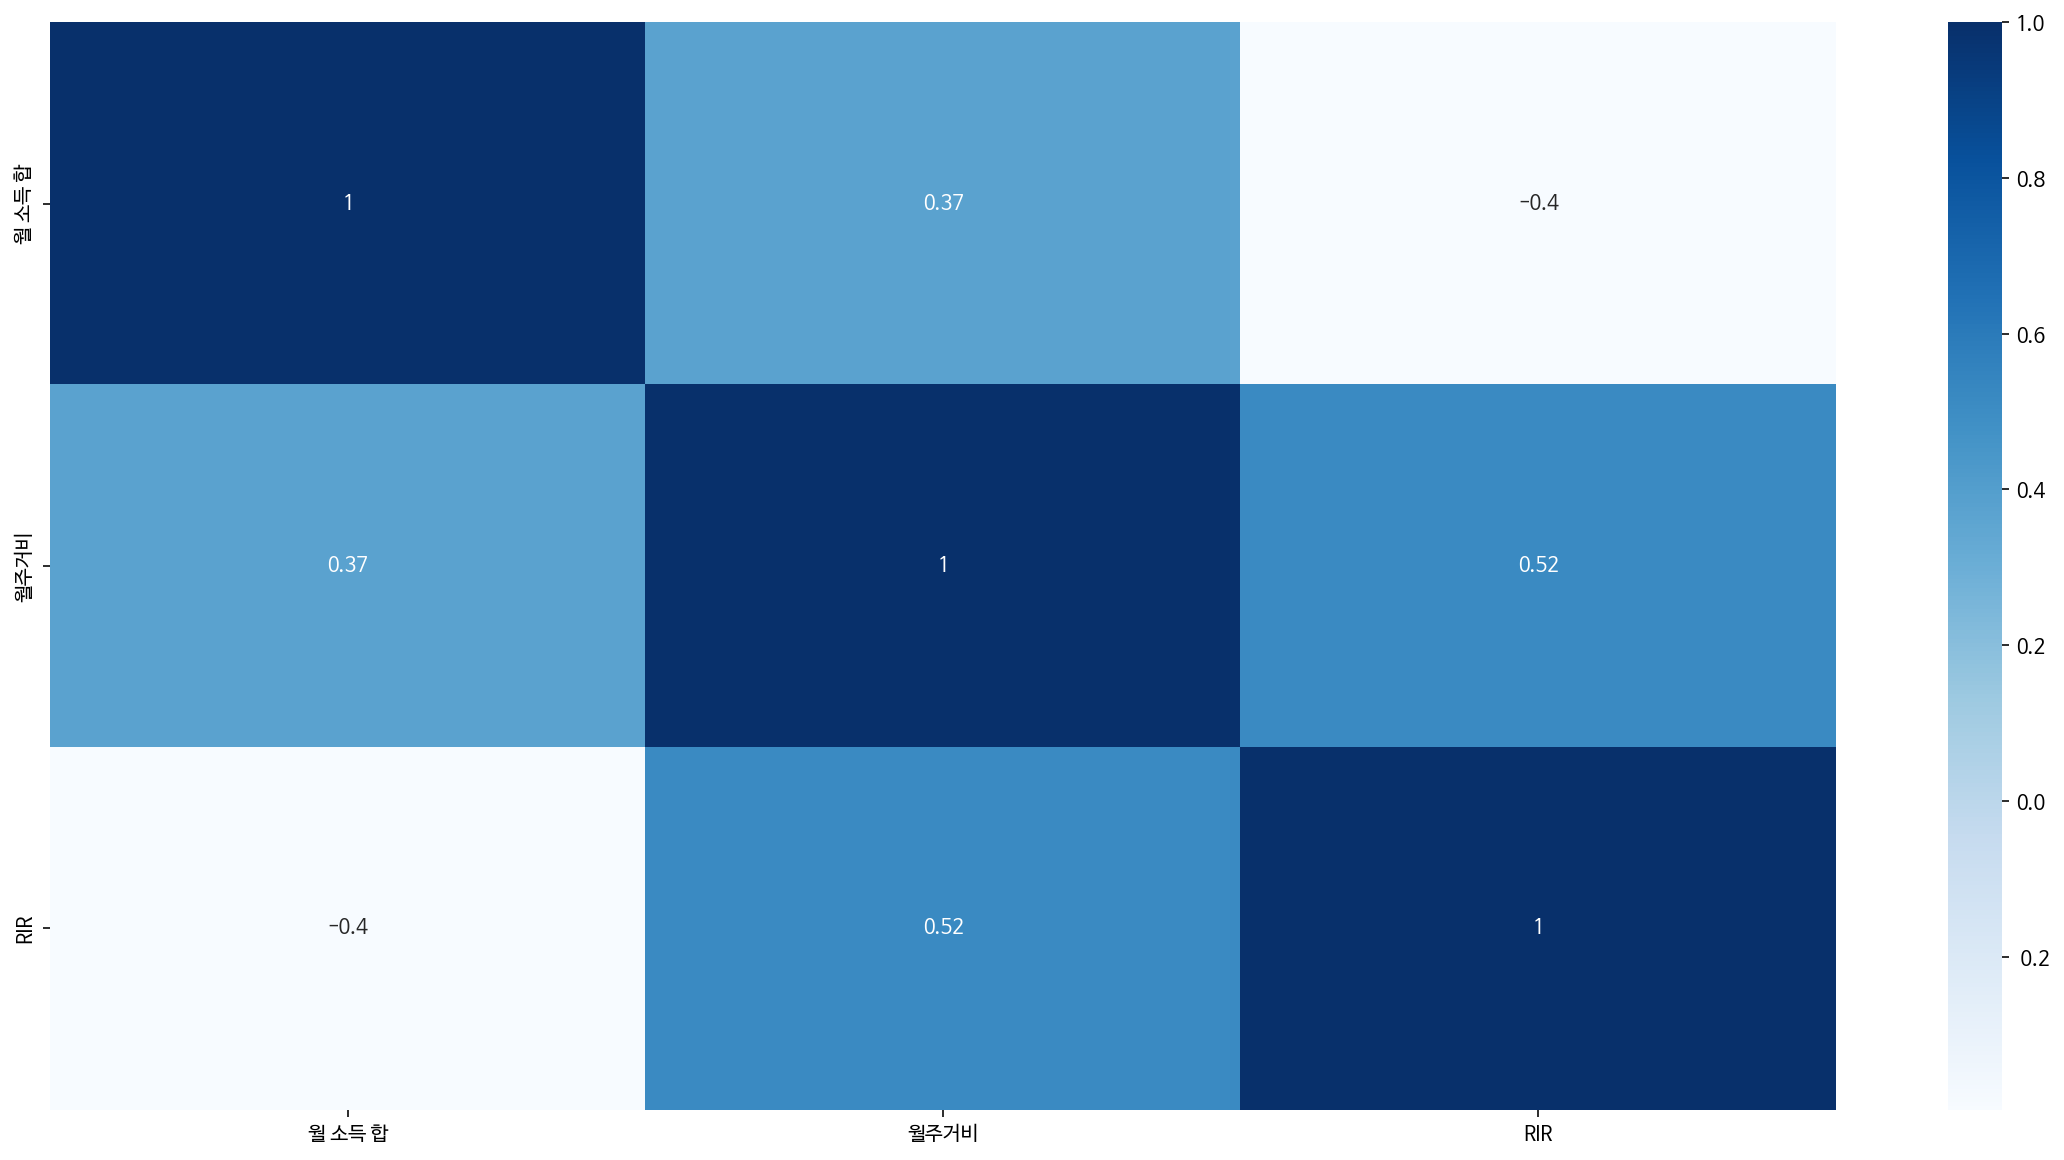

In [ ]:
# 변수간의 상관관계 히트맵
plt.figure(figsize = (20,10))
sns.heatmap(df_rir2.corr(),cmap='Blues', annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


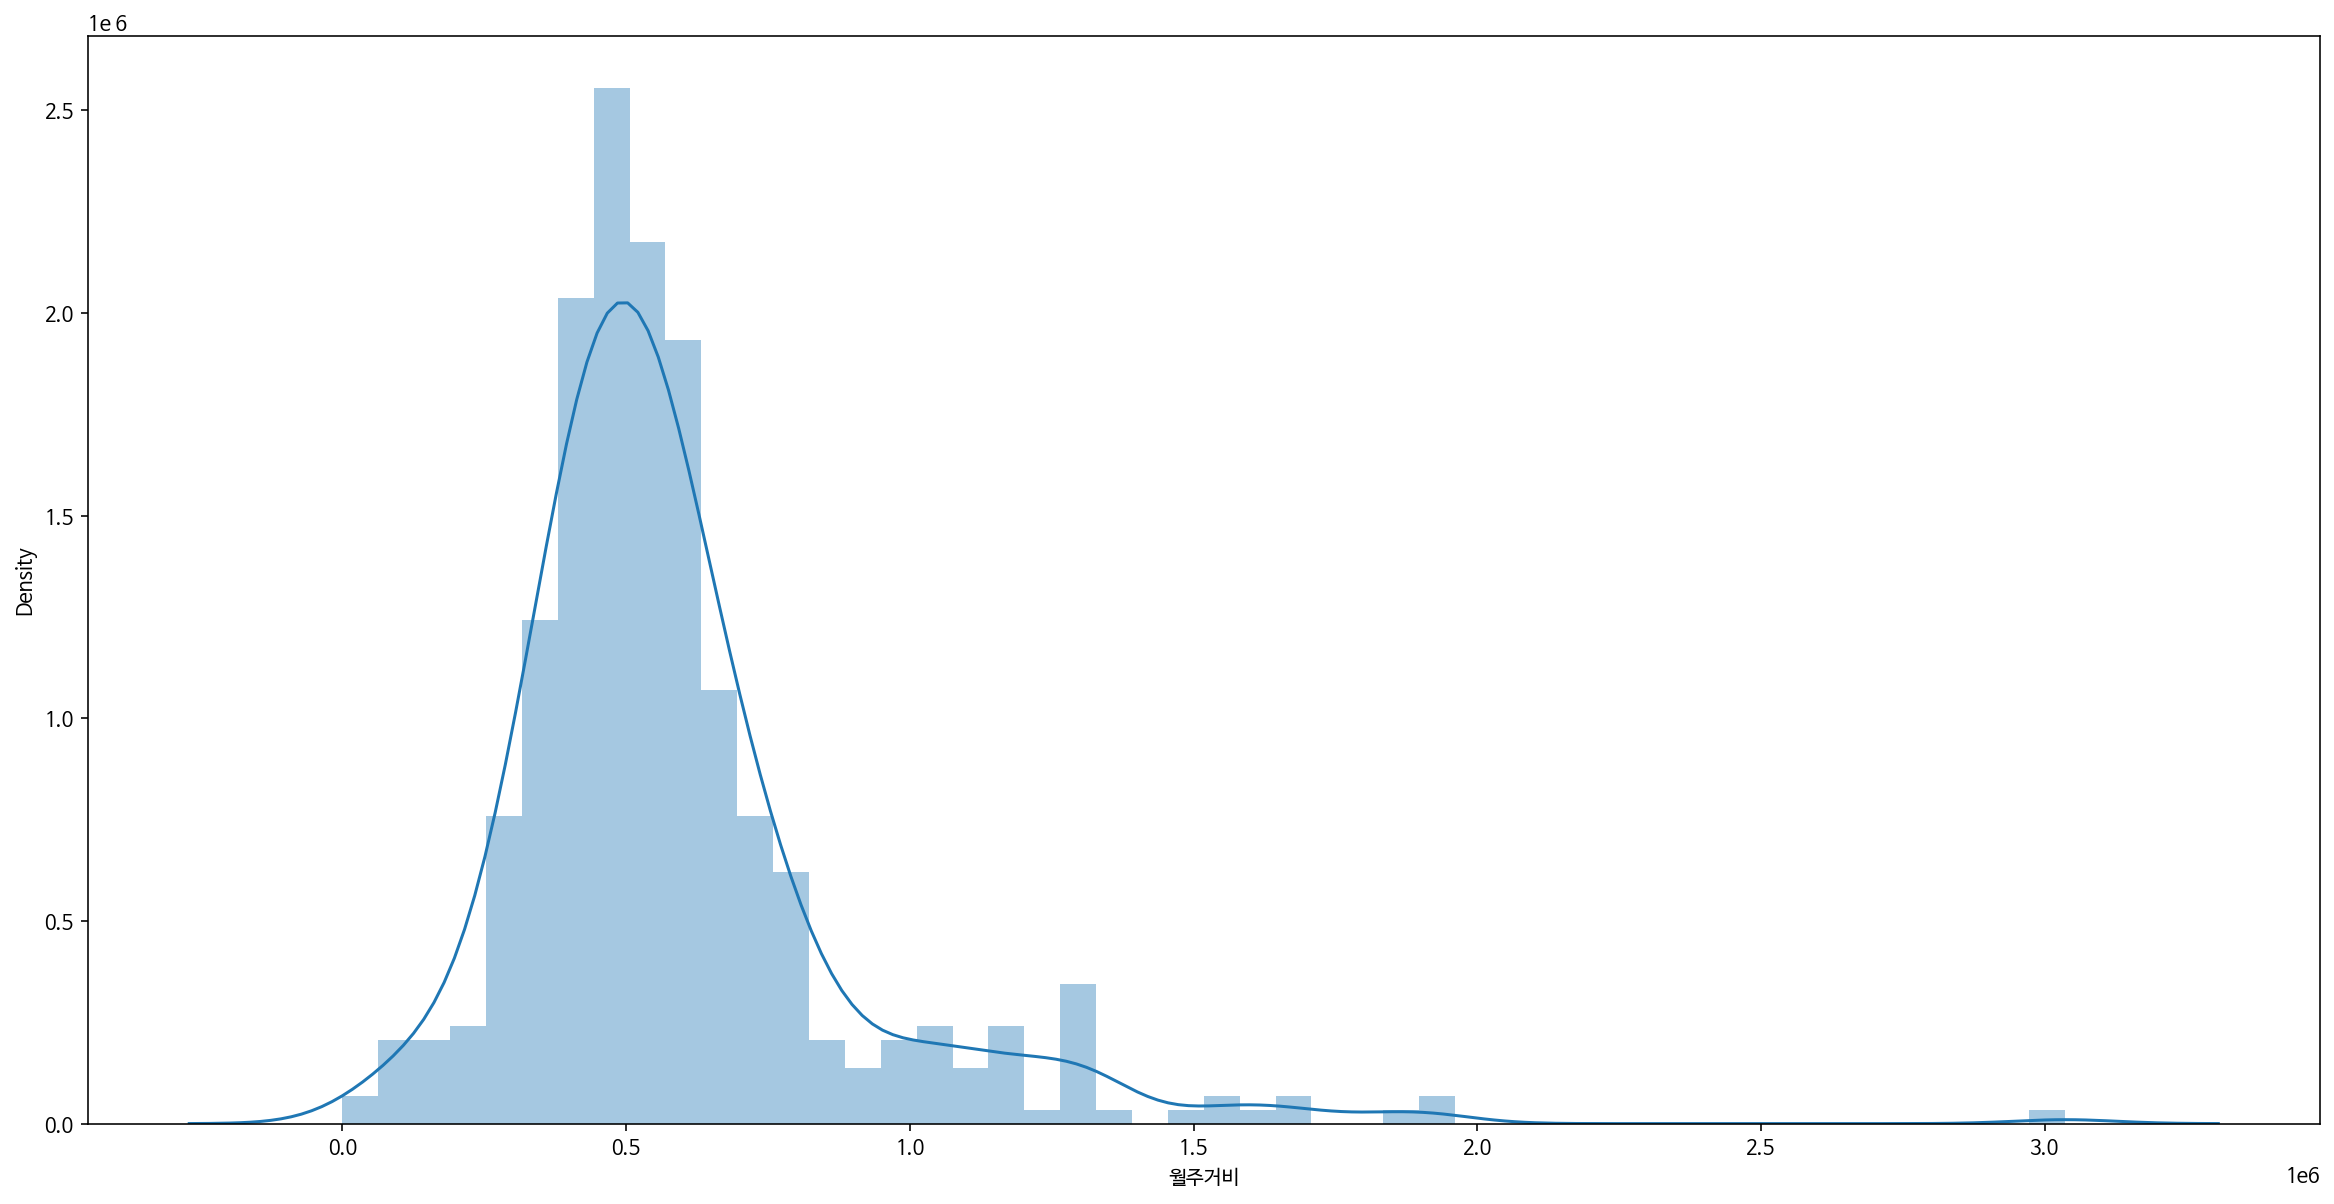

In [ ]:
# 각 변수의 분포 확인(1)월 주거비에 따른 분포
plt.figure(figsize = (20,10))
sns.distplot(df_rir2['월주거비'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


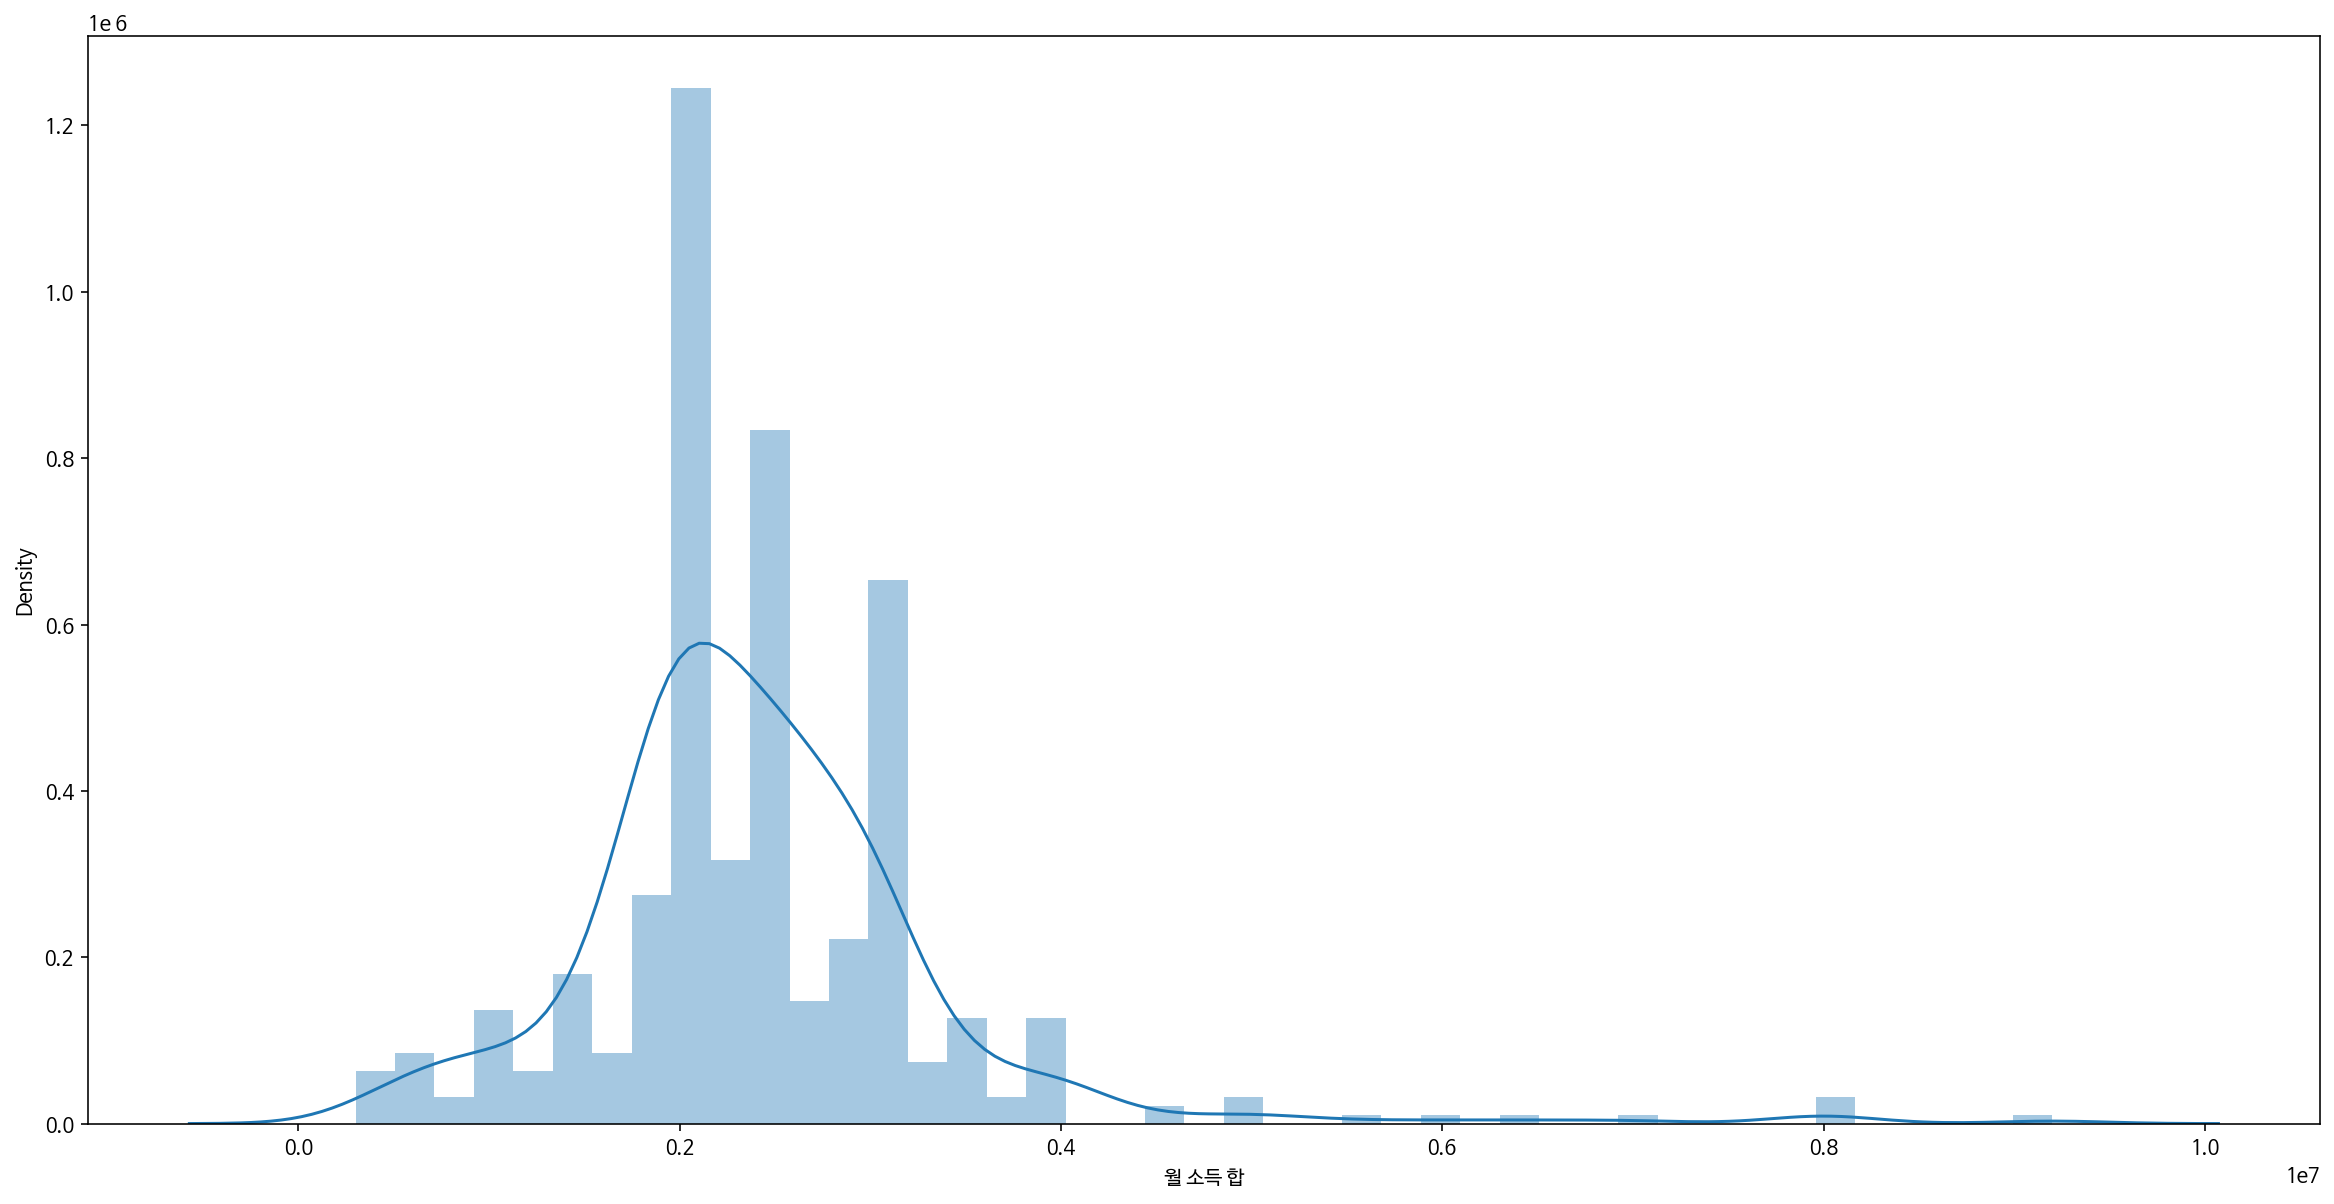

In [ ]:
# 각 변수의 분포 확인(2): 월 소득 합의 분포
plt.figure(figsize = (20,10))
sns.distplot(df_rir2['월 소득 합'])

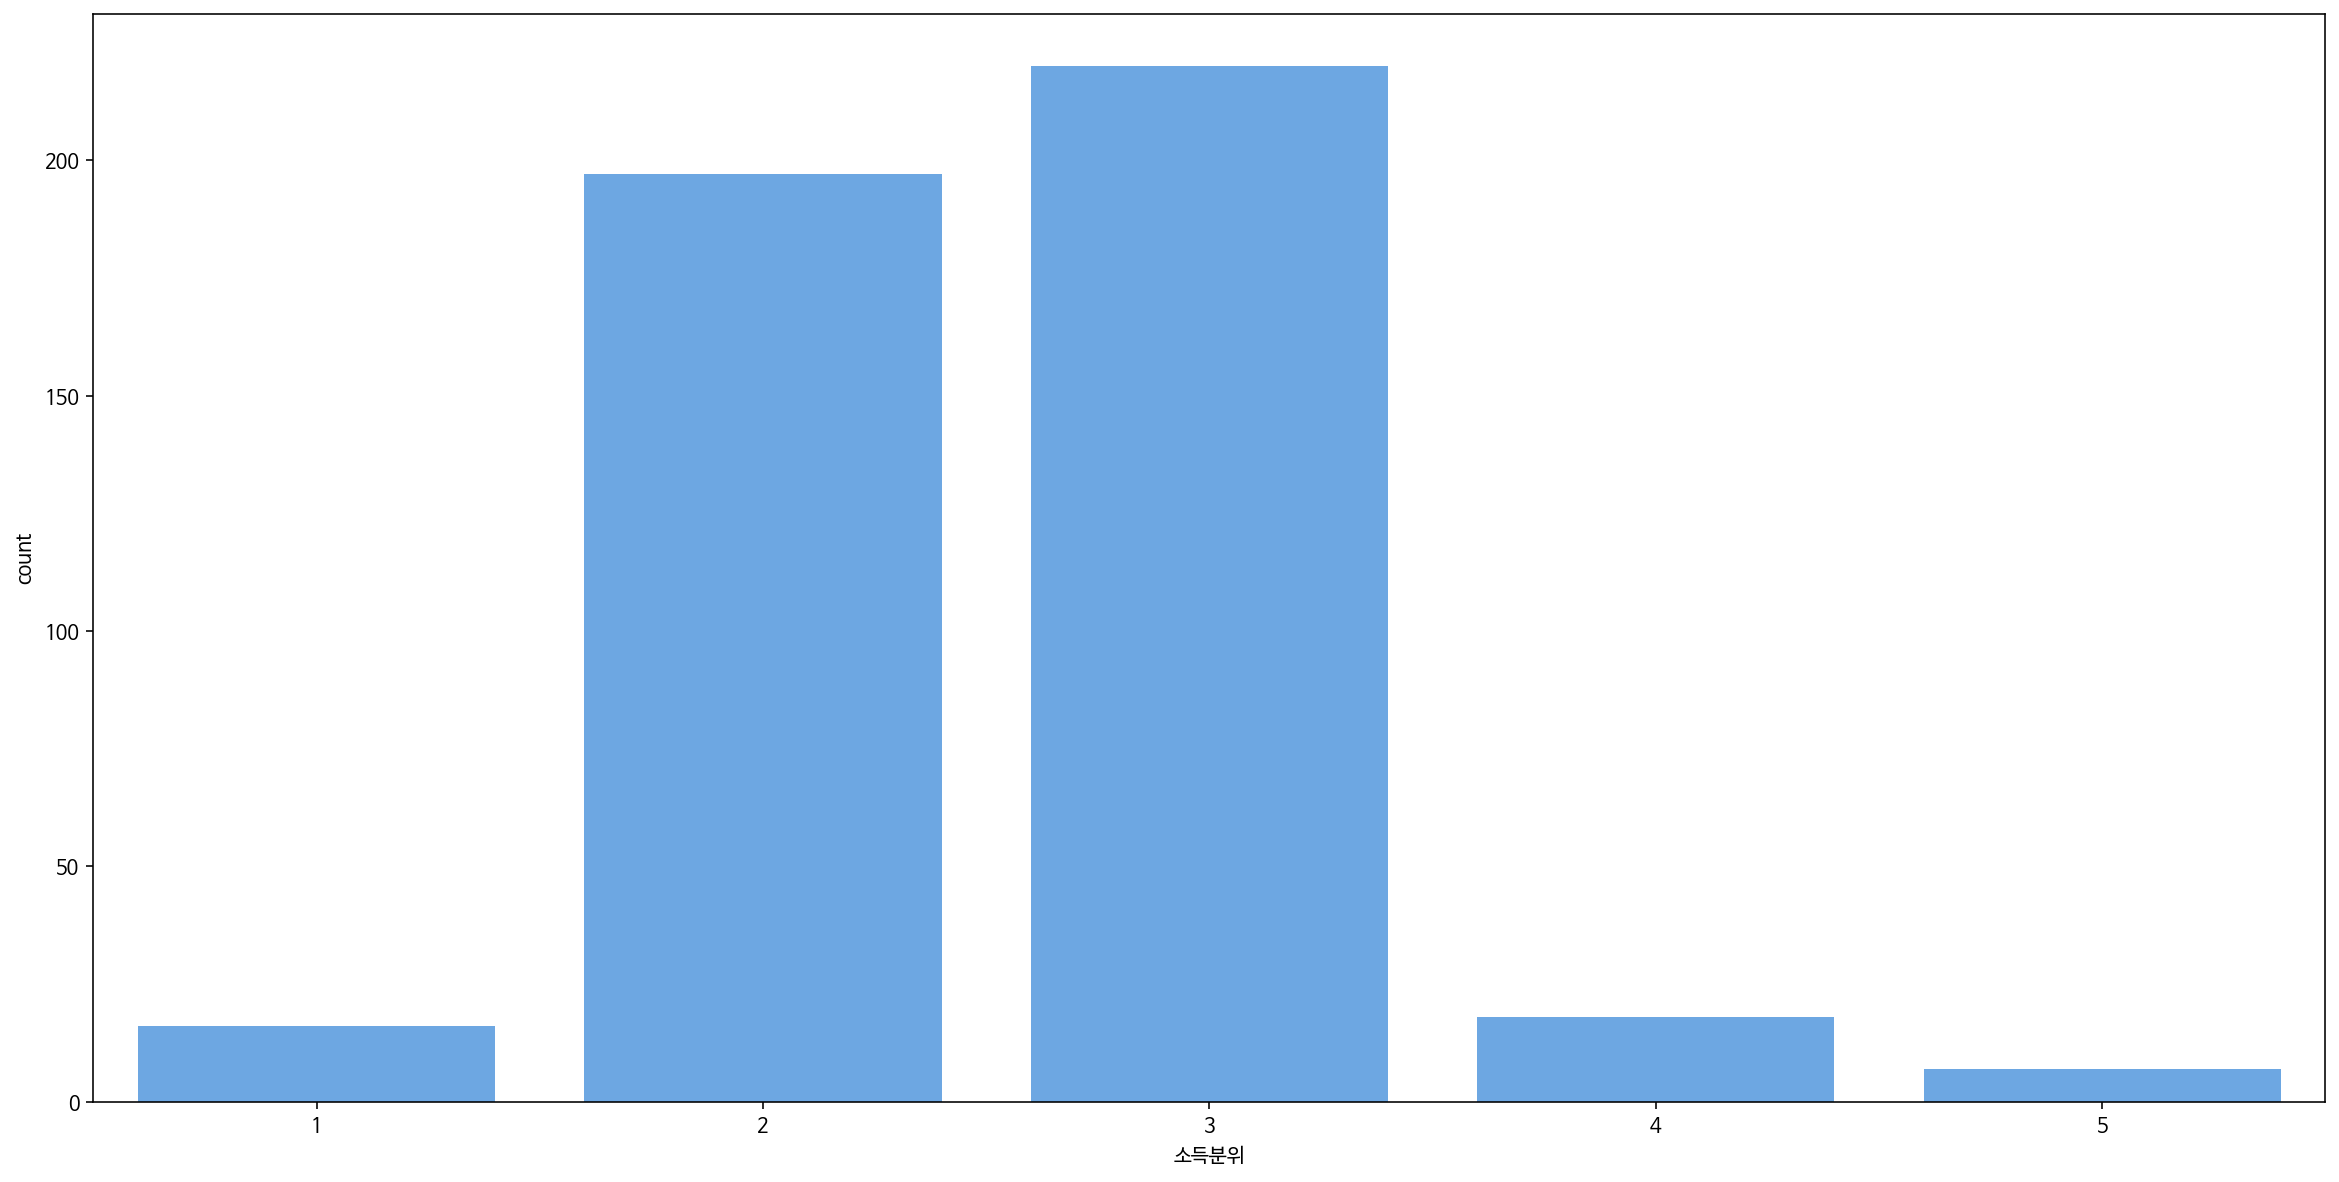

In [ ]:
# 각 변수의 분포 확인(4):소득분위의 부포
plt.figure(figsize = (20,10))
sns.countplot(data=df_rir2, x = '소득분위',color='#5AA7F5')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


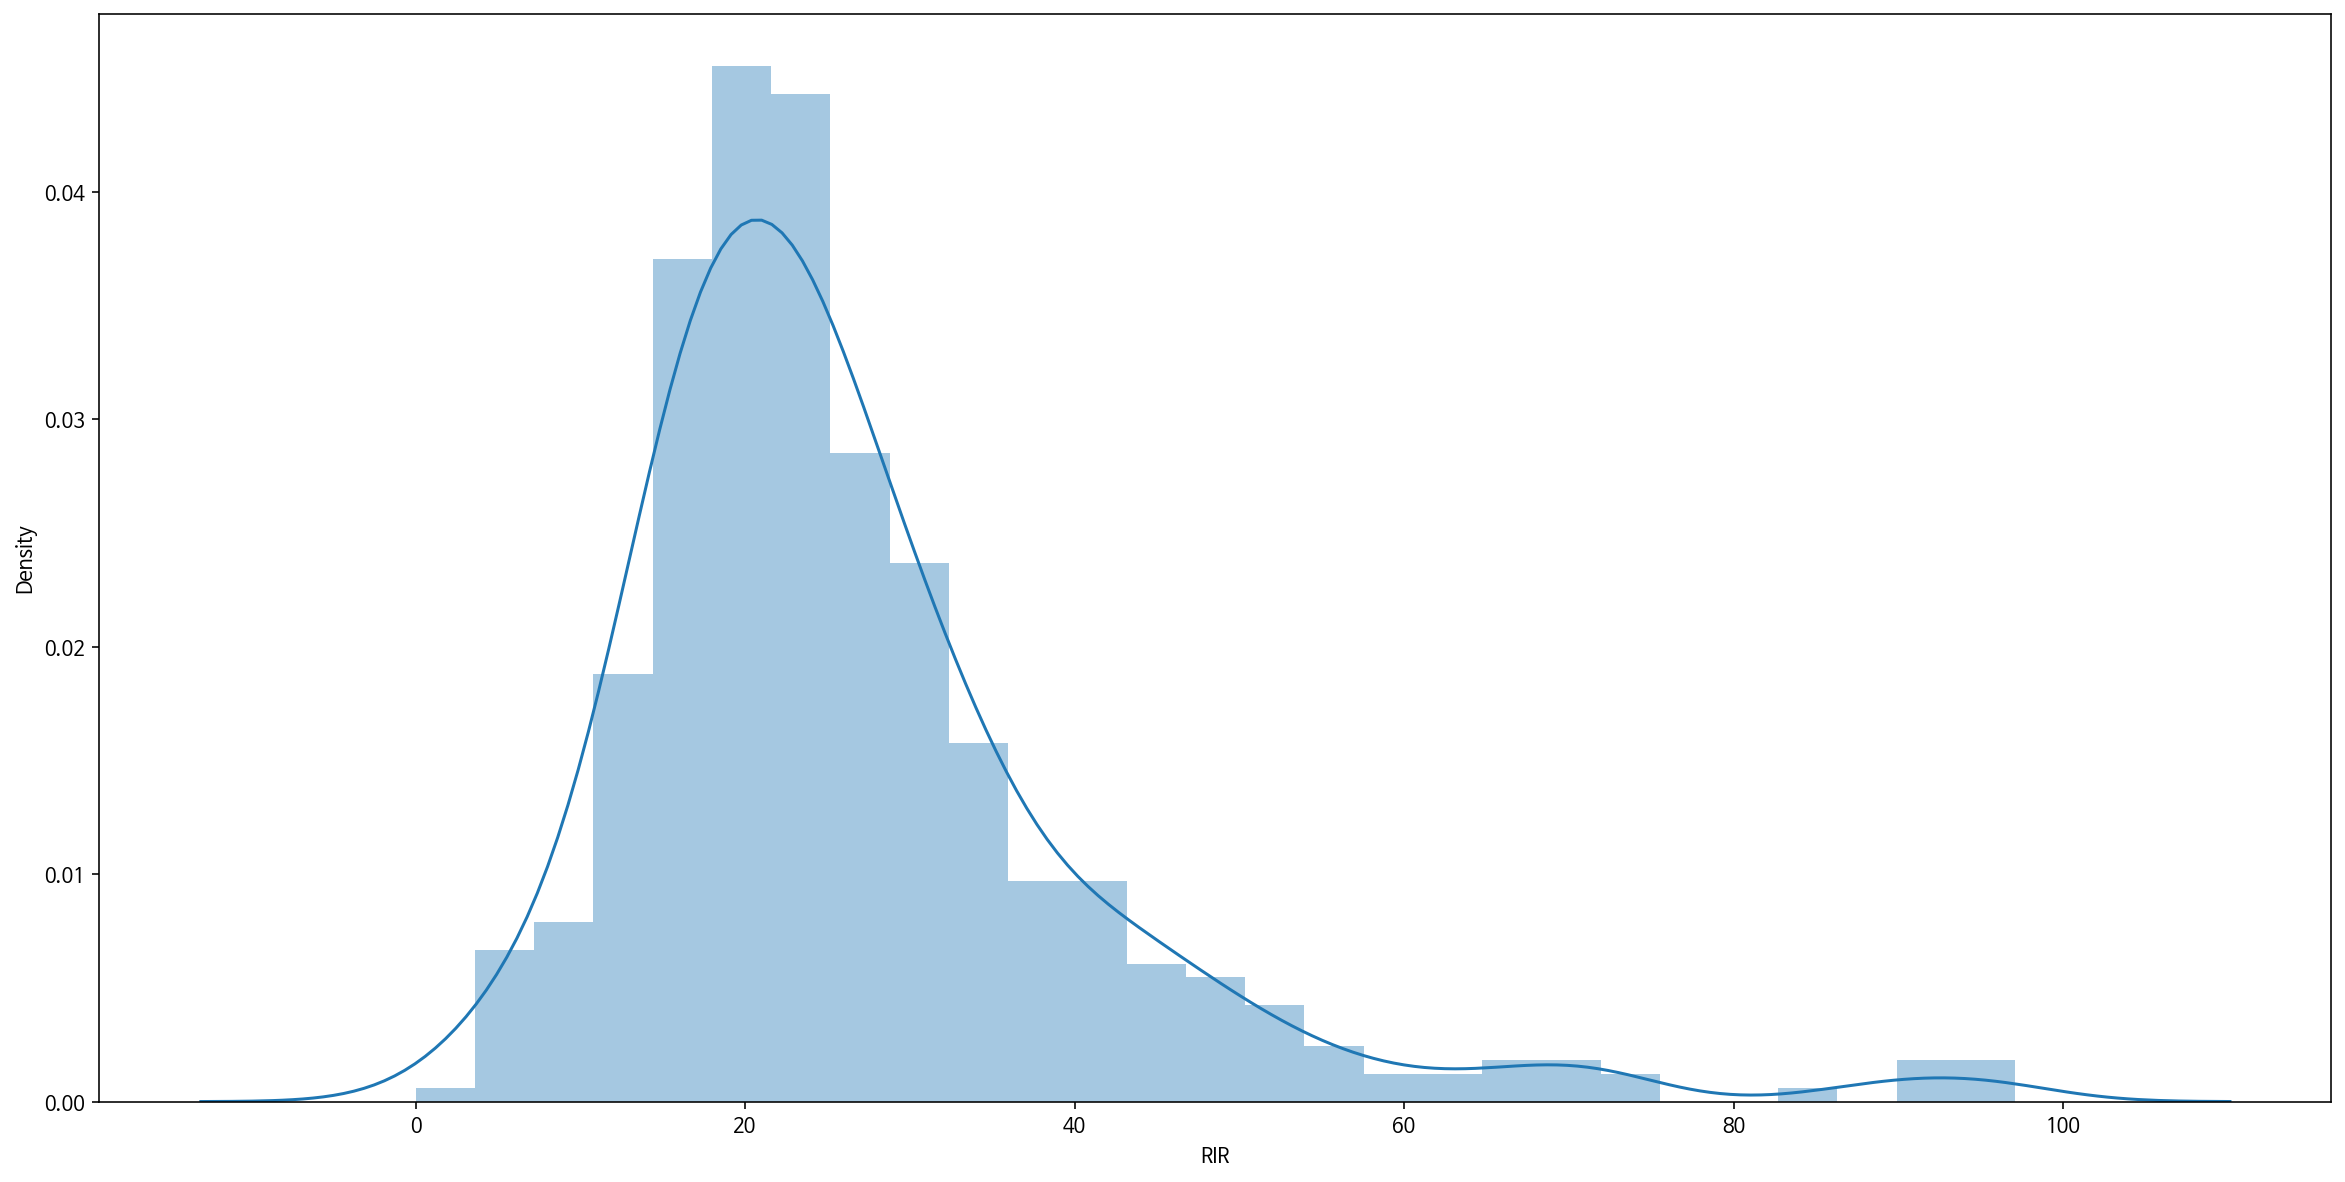

In [ ]:
# 각 변수의 분포 확인(3)
plt.figure(figsize = (20,10))
sns.distplot(df_rir2['RIR'])

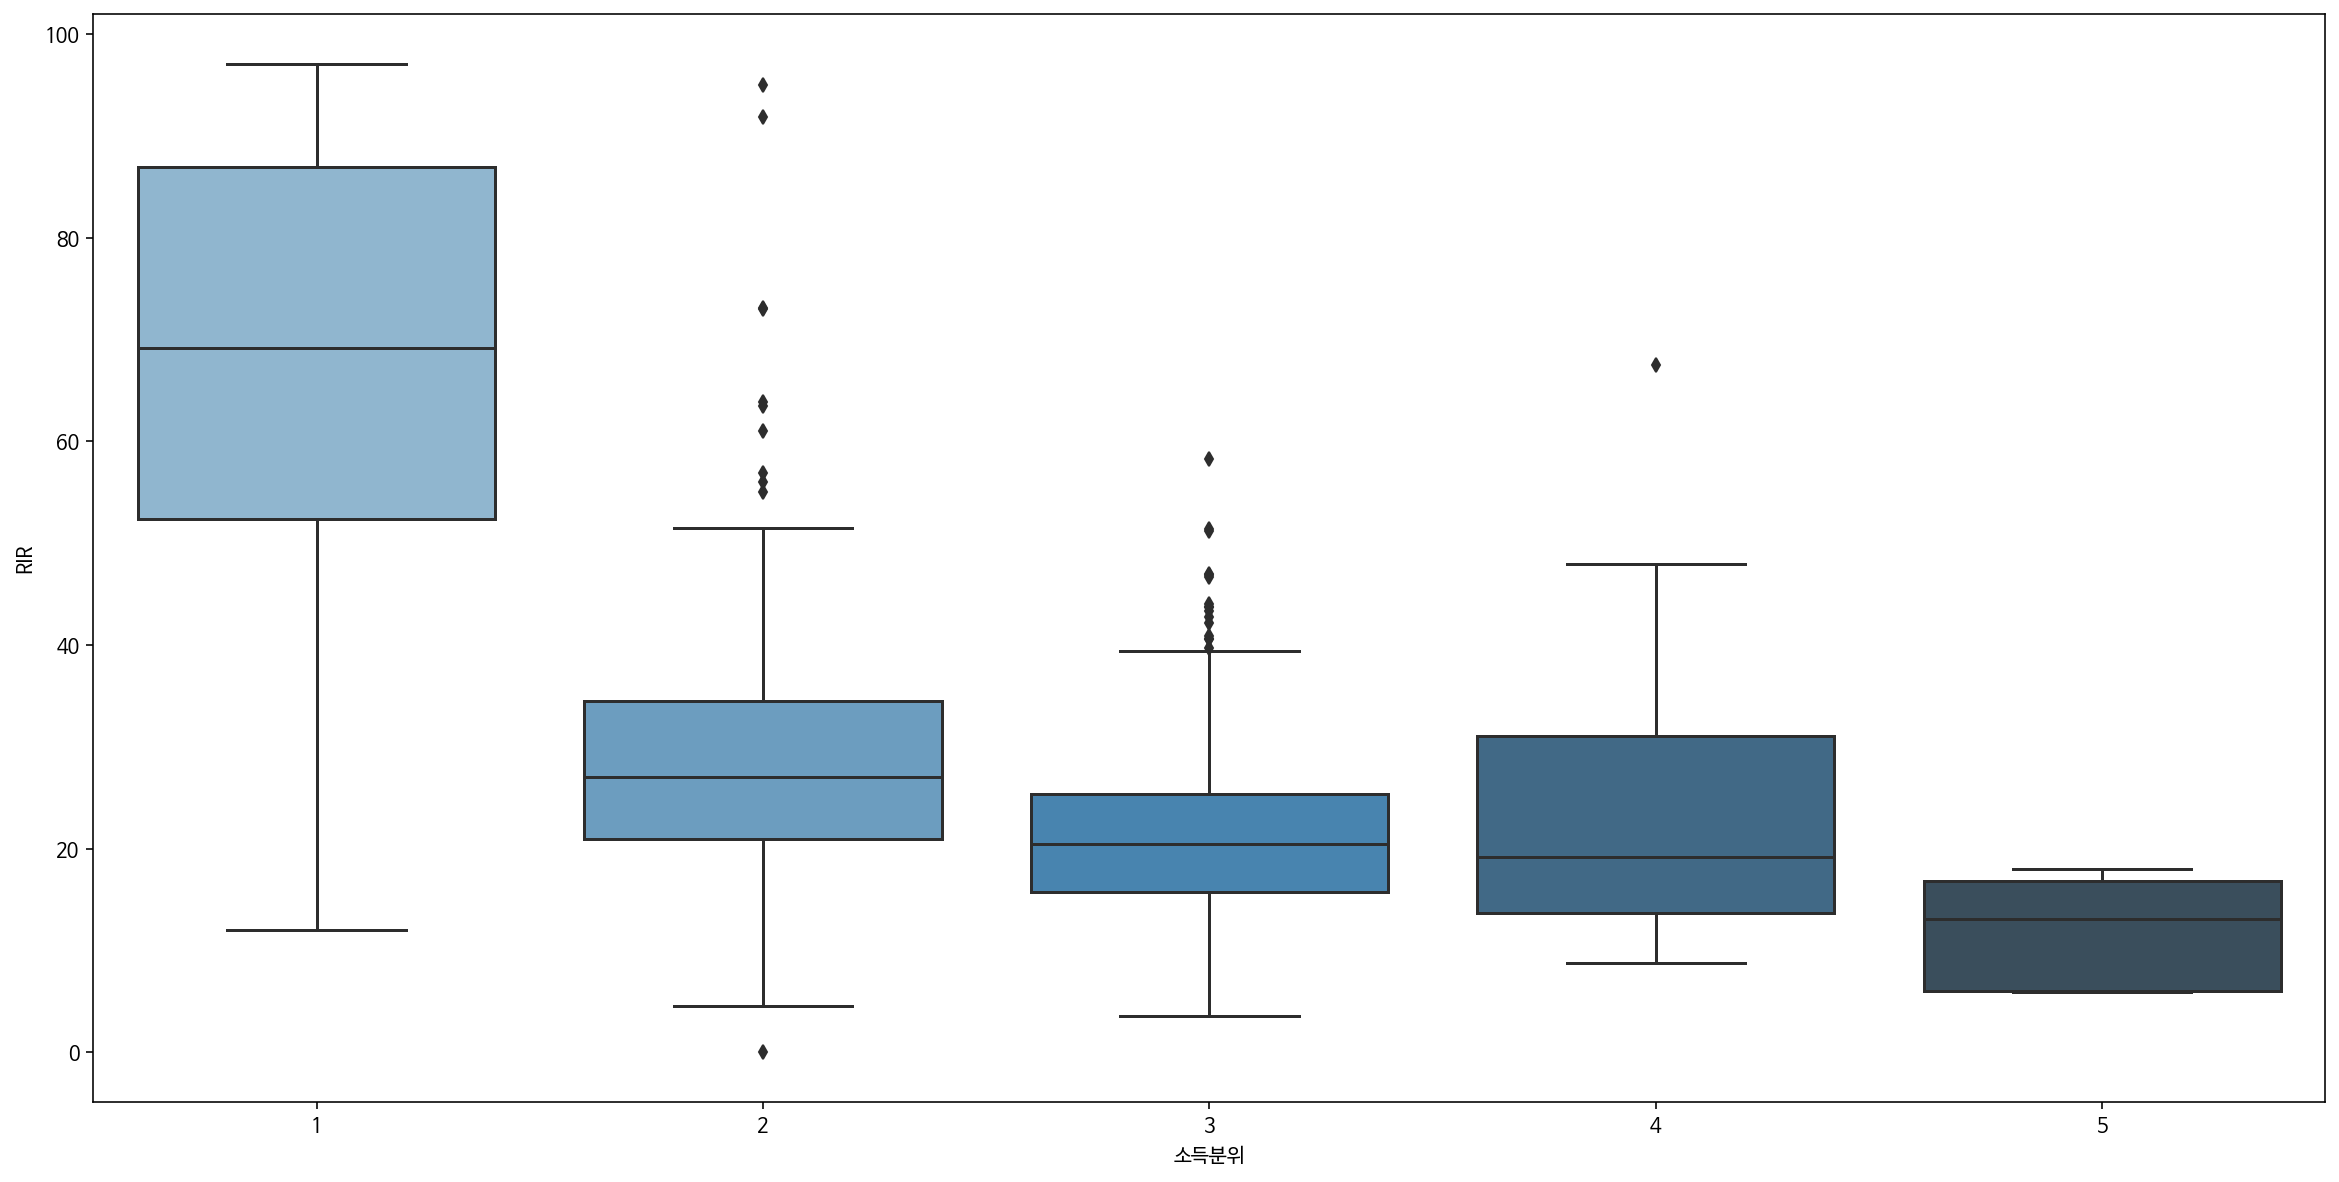

In [ ]:
# 소득분위와 RIR의 관계 시각화
plt.figure(figsize = (20,10))
sns.boxplot(x = '소득분위', y = 'RIR', data = df_rir2,palette='Blues_d')

In [ ]:
from sklearn.cluster import KMeans

# var에 분석에 사용할 변수의 값을 넣고 클러스터를 통해 파악할 변수만 다시 다른 데이터프레임에 넣는다.
var = df_rir2[['월주거비', '월 소득 합', 'RIR', '소득분위']].values
df_rir2 = df_rir2[['월주거비', '월 소득 합', 'RIR', '소득분위']]

In [ ]:
# inertia라는 빈 리스트를 만들어준다.
inertia = []

In [ ]:
# inertia라는 빈 리스트를 만들어준다.
inertia = []

In [ ]:
# 군집수 n을 1에서 11까지 돌아가며 var에 대해 k-means 알고리즘 적용하여 inertia 값을 리스트에 저장
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n))
  algorithm.fit(var)
  inertia.append(algorithm.inertia_)

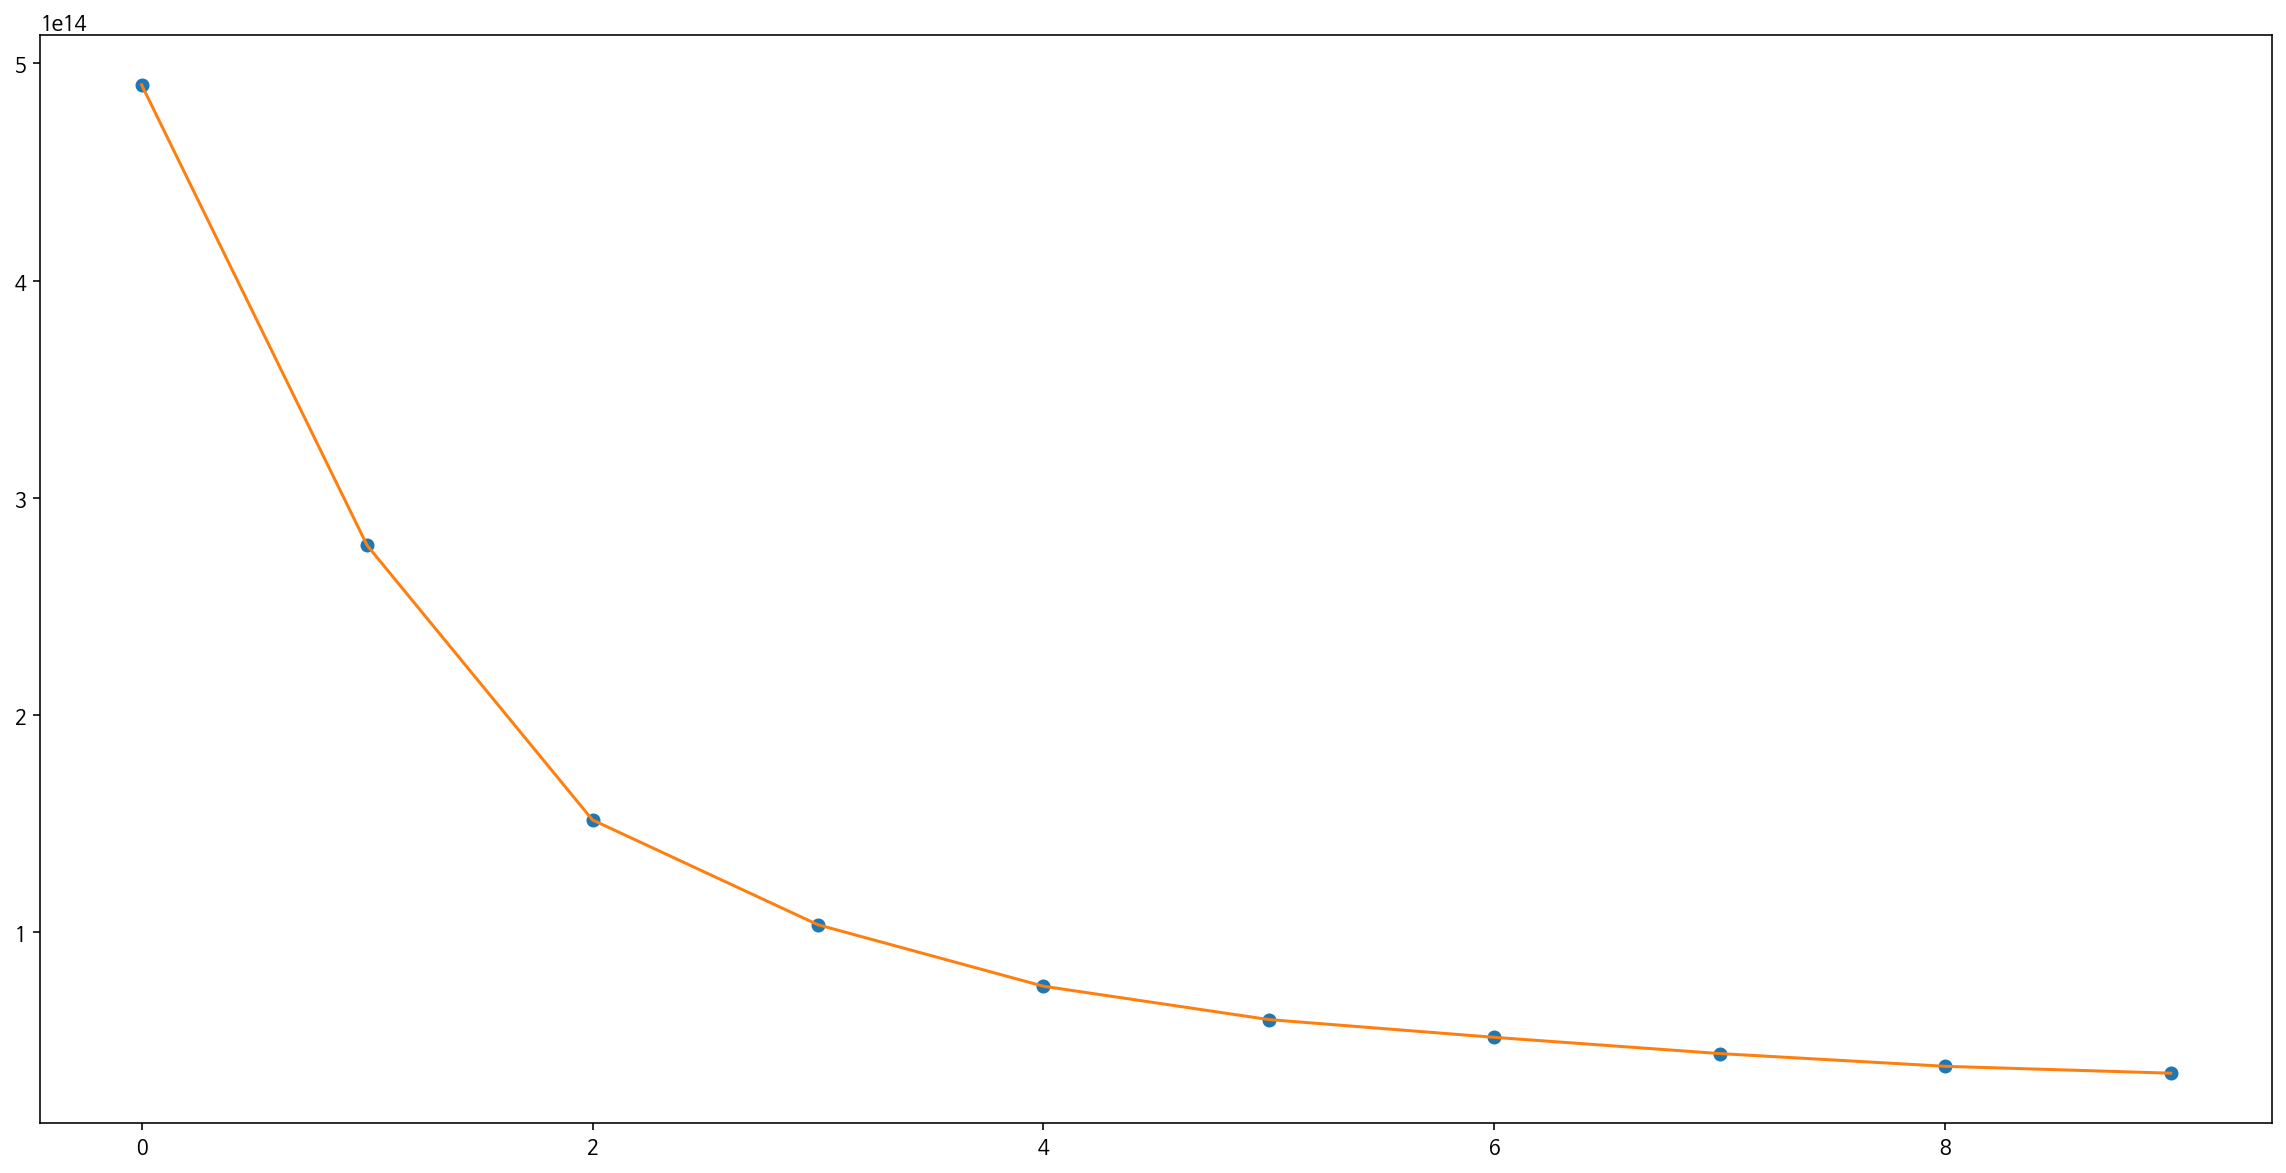

In [ ]:
# inertia 값을 시각화
plt.figure(1, figsize = (20,10))
plt.plot(inertia, 'o')
plt.plot(inertia, '-')

In [ ]:
# 군집수를 4로 지정하고, 기존 데이터셋에 클러스터 값을 넣는다.
algorithm = (KMeans(n_clusters = 4, random_state = 111))
algorithm.fit(var)
labels = algorithm.labels_

df_rir2['cluster'] = labels
df_rir2

,월주거비,월 소득 합,RIR,소득분위,cluster
2590,304000.0,2500000,12.2,3,0
2604,598000.0,2000000,29.9,2,0
2649,660000.0,5000000,13.2,4,3
2697,550000.0,2500000,22.0,3,0
2752,340000.0,2000000,17.0,2,0
...,...,...,...,...,...
4815,610000.0,2500000,24.4,3,0
4816,470000.0,8000000,5.9,5,1
4817,470000.0,8000000,5.9,5,1
4822,290000.0,2000000,14.5,2,0


cluster
0    528868.613139
1    852250.000000
2    442436.363636
3    768561.983471
Name: 월주거비, dtype: float64

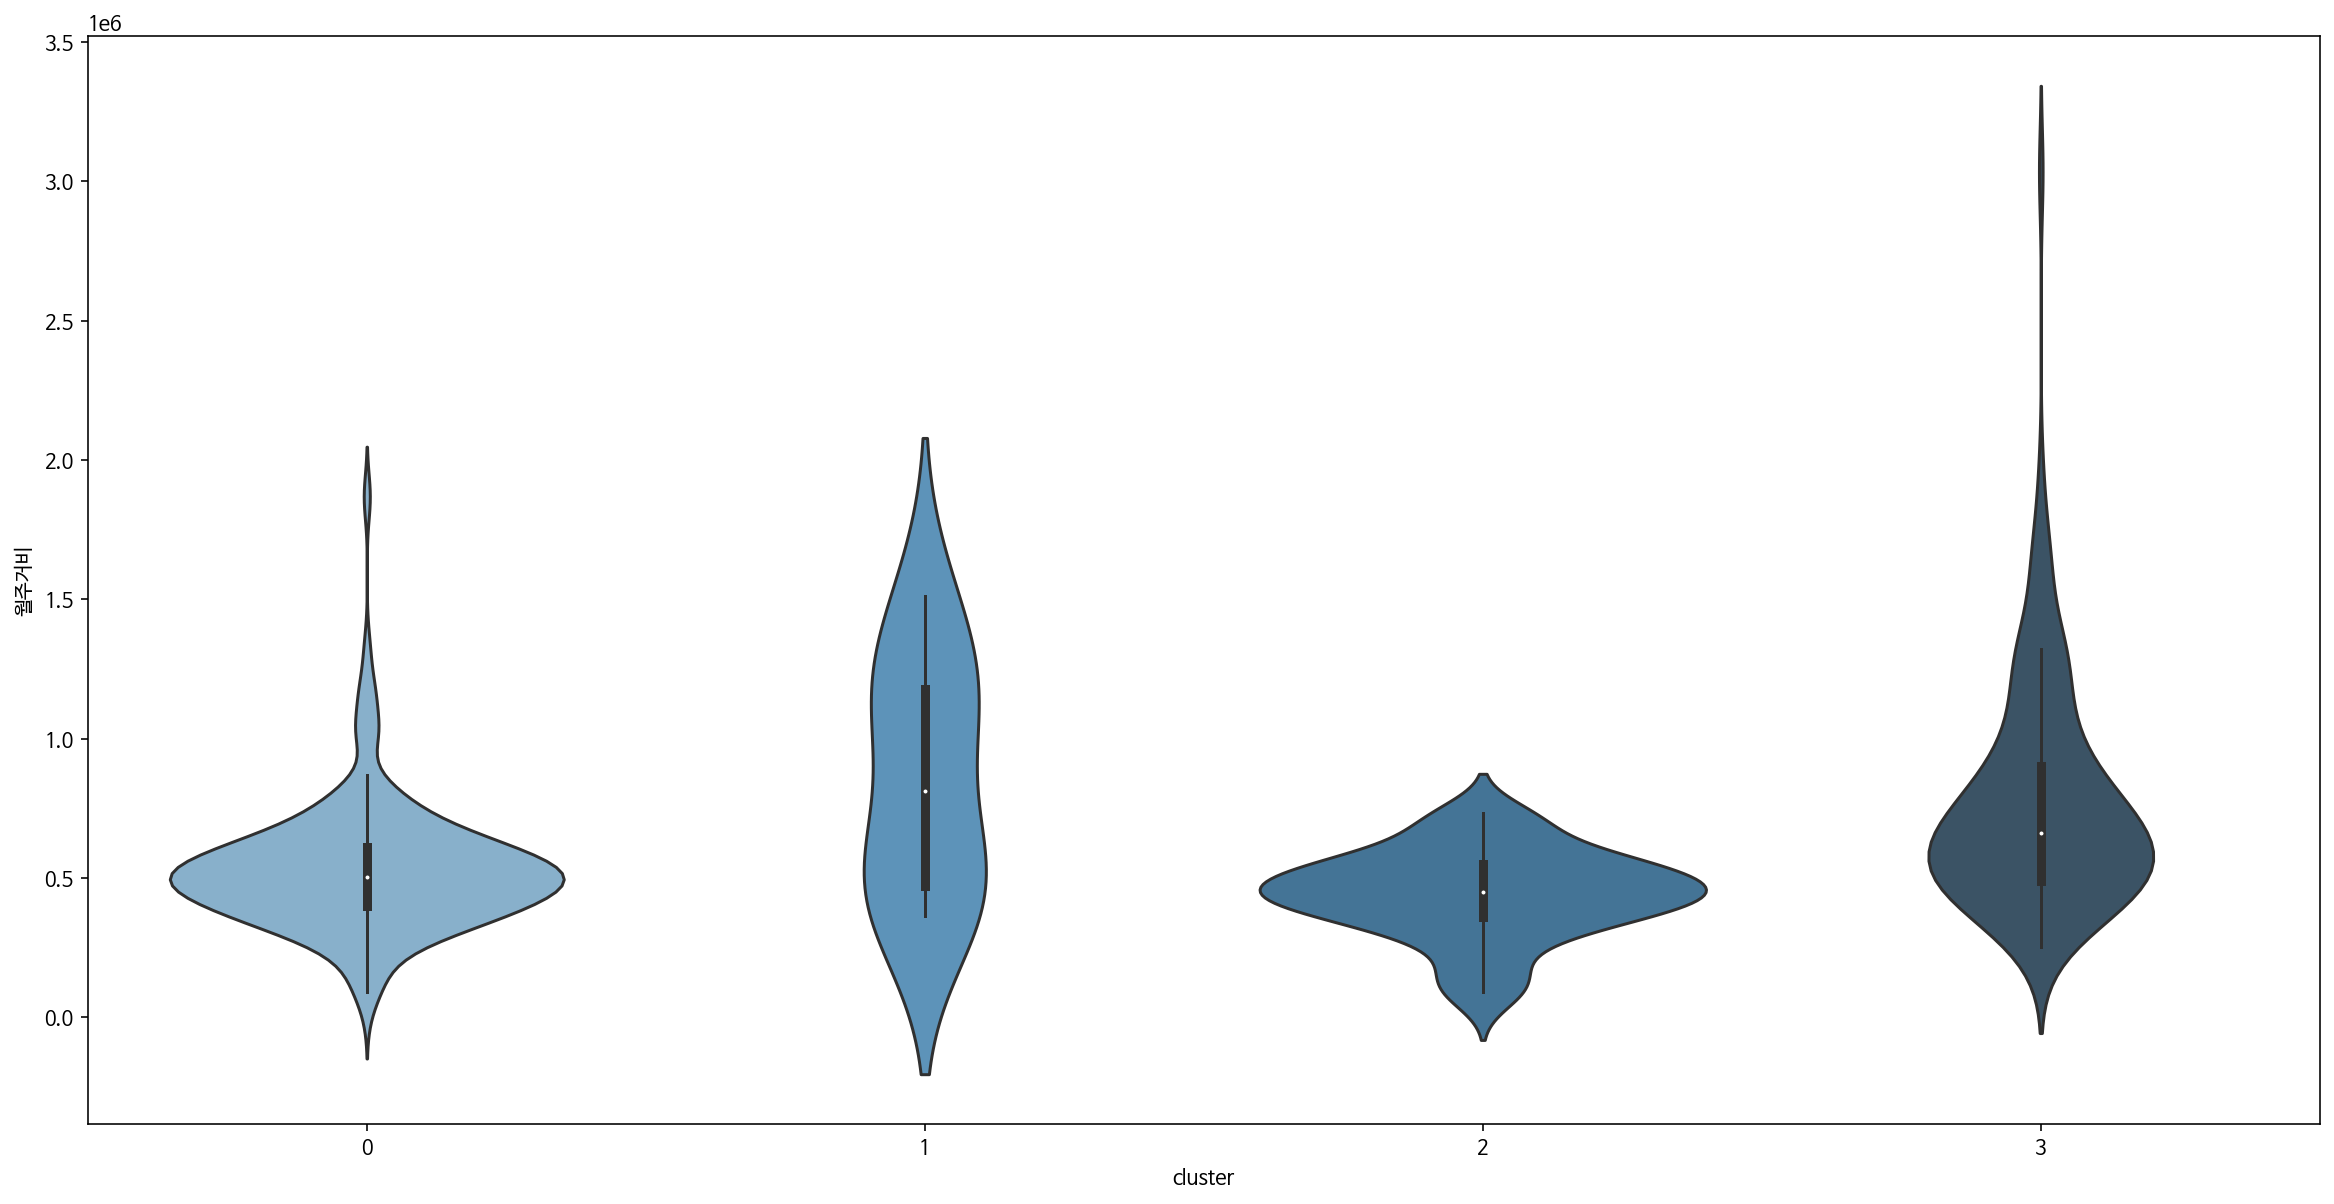

In [ ]:
# 클러스터의 특성을 파악해 보자
plt.figure(figsize = (20,10))
sns.violinplot(x = 'cluster', y = '월주거비', data = df_rir2, palette='Blues_d')
df_rir2.groupby('cluster')['월주거비'].mean()

cluster
0    2.184197e+06
1    7.275000e+06
2    1.088182e+06
3    3.226446e+06
Name: 월 소득 합, dtype: float64

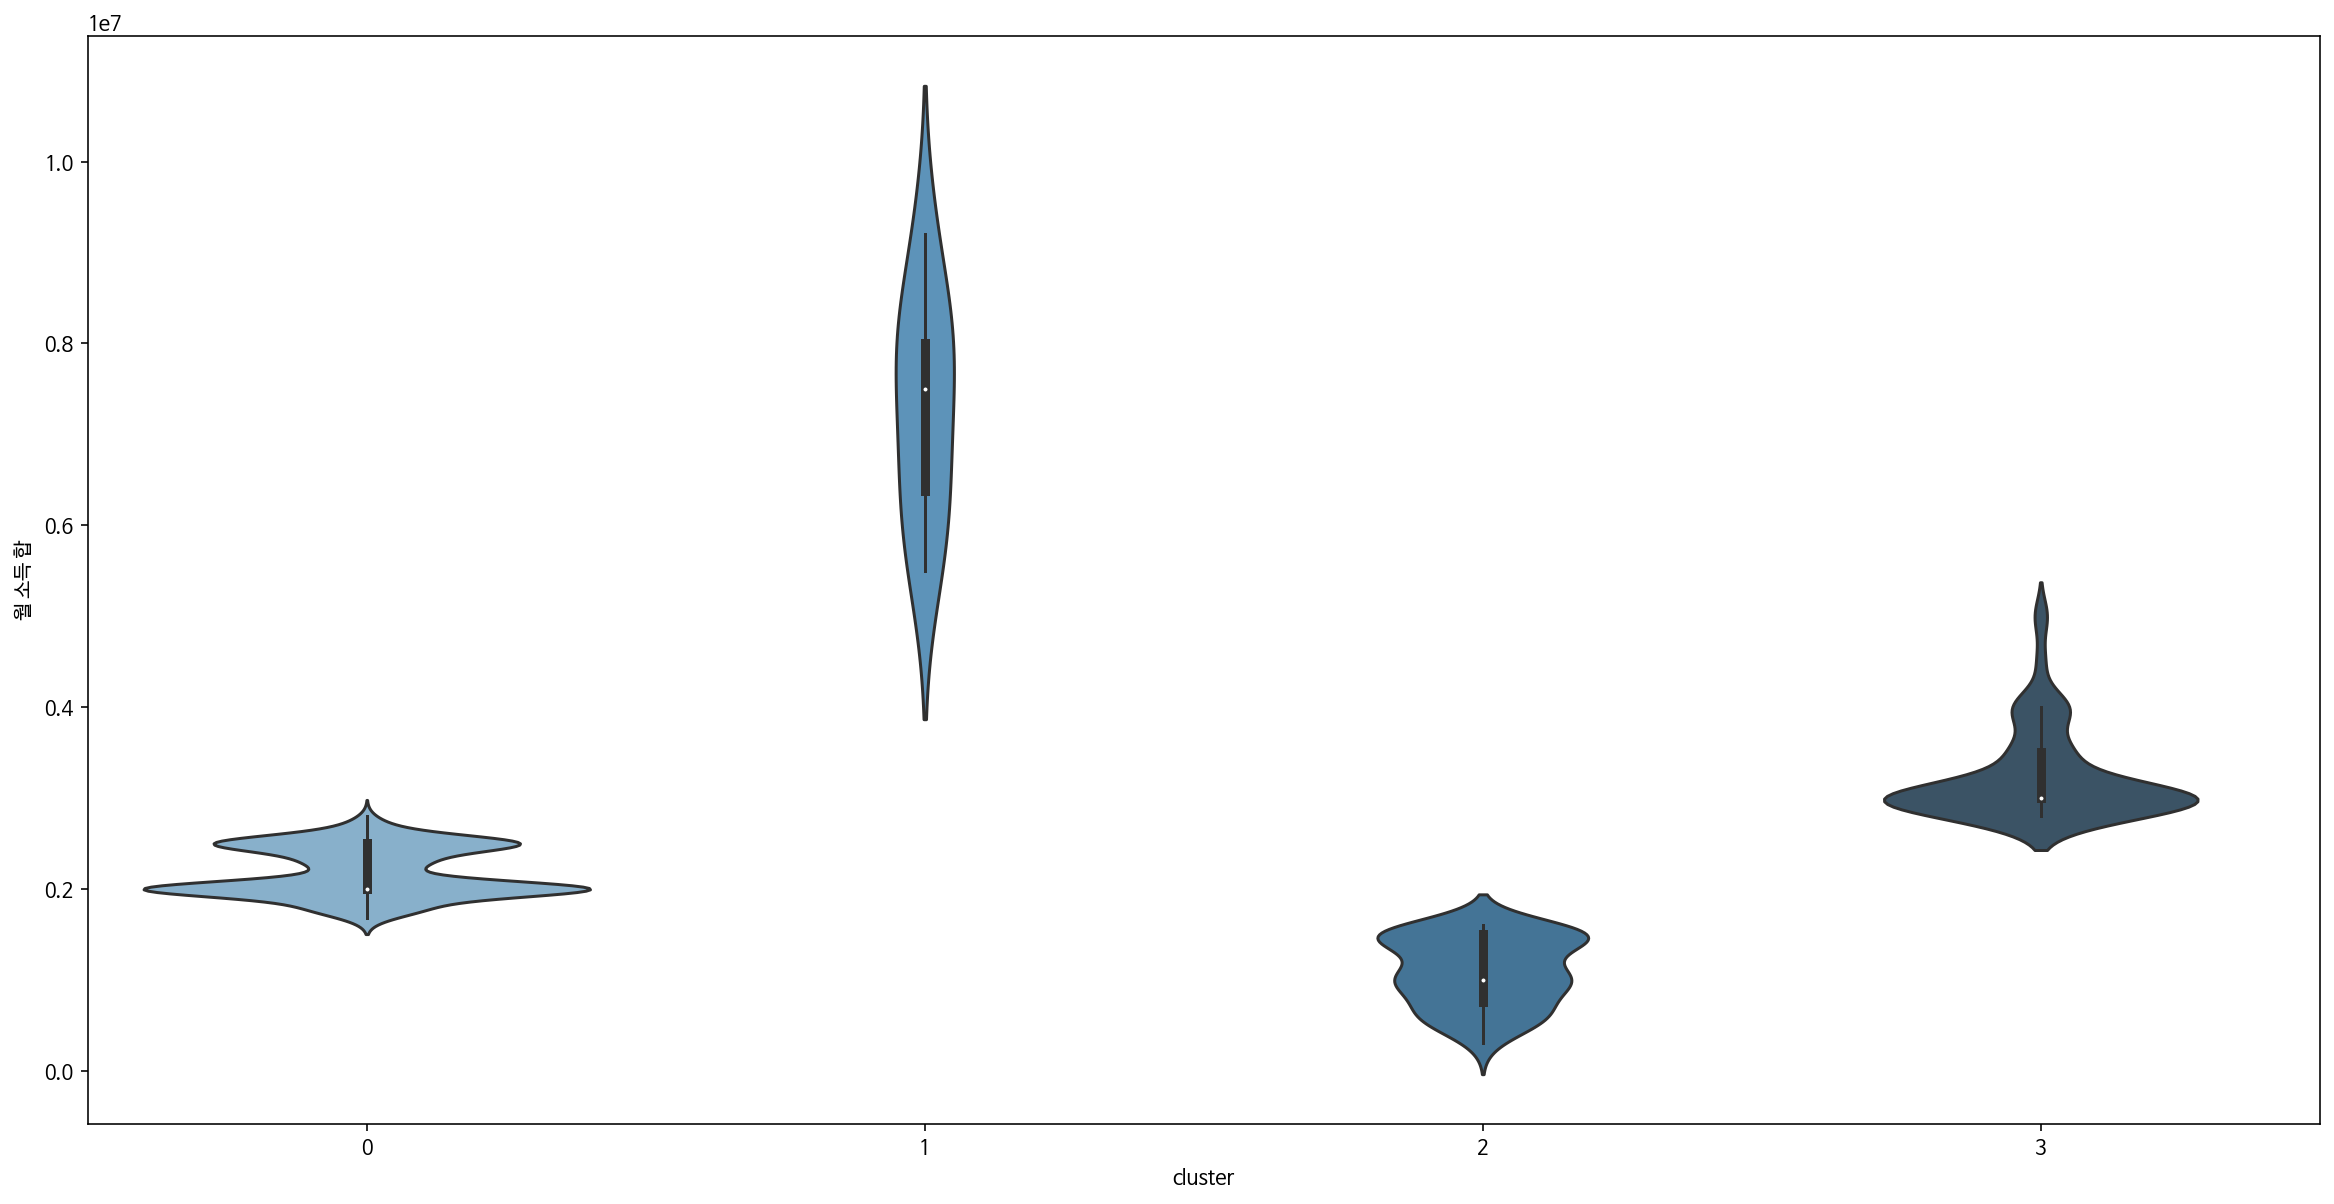

In [ ]:
# 클러스터의 특성을 파악해 보자(2)
plt.figure(figsize = (20,10))
sns.violinplot(x = 'cluster', y = '월 소득 합', data = df_rir2, palette='Blues_d')
df_rir2.groupby('cluster')['월 소득 합'].mean()

cluster
0    24.637226
1    11.650000
2    45.760000
3    23.719008
Name: RIR, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


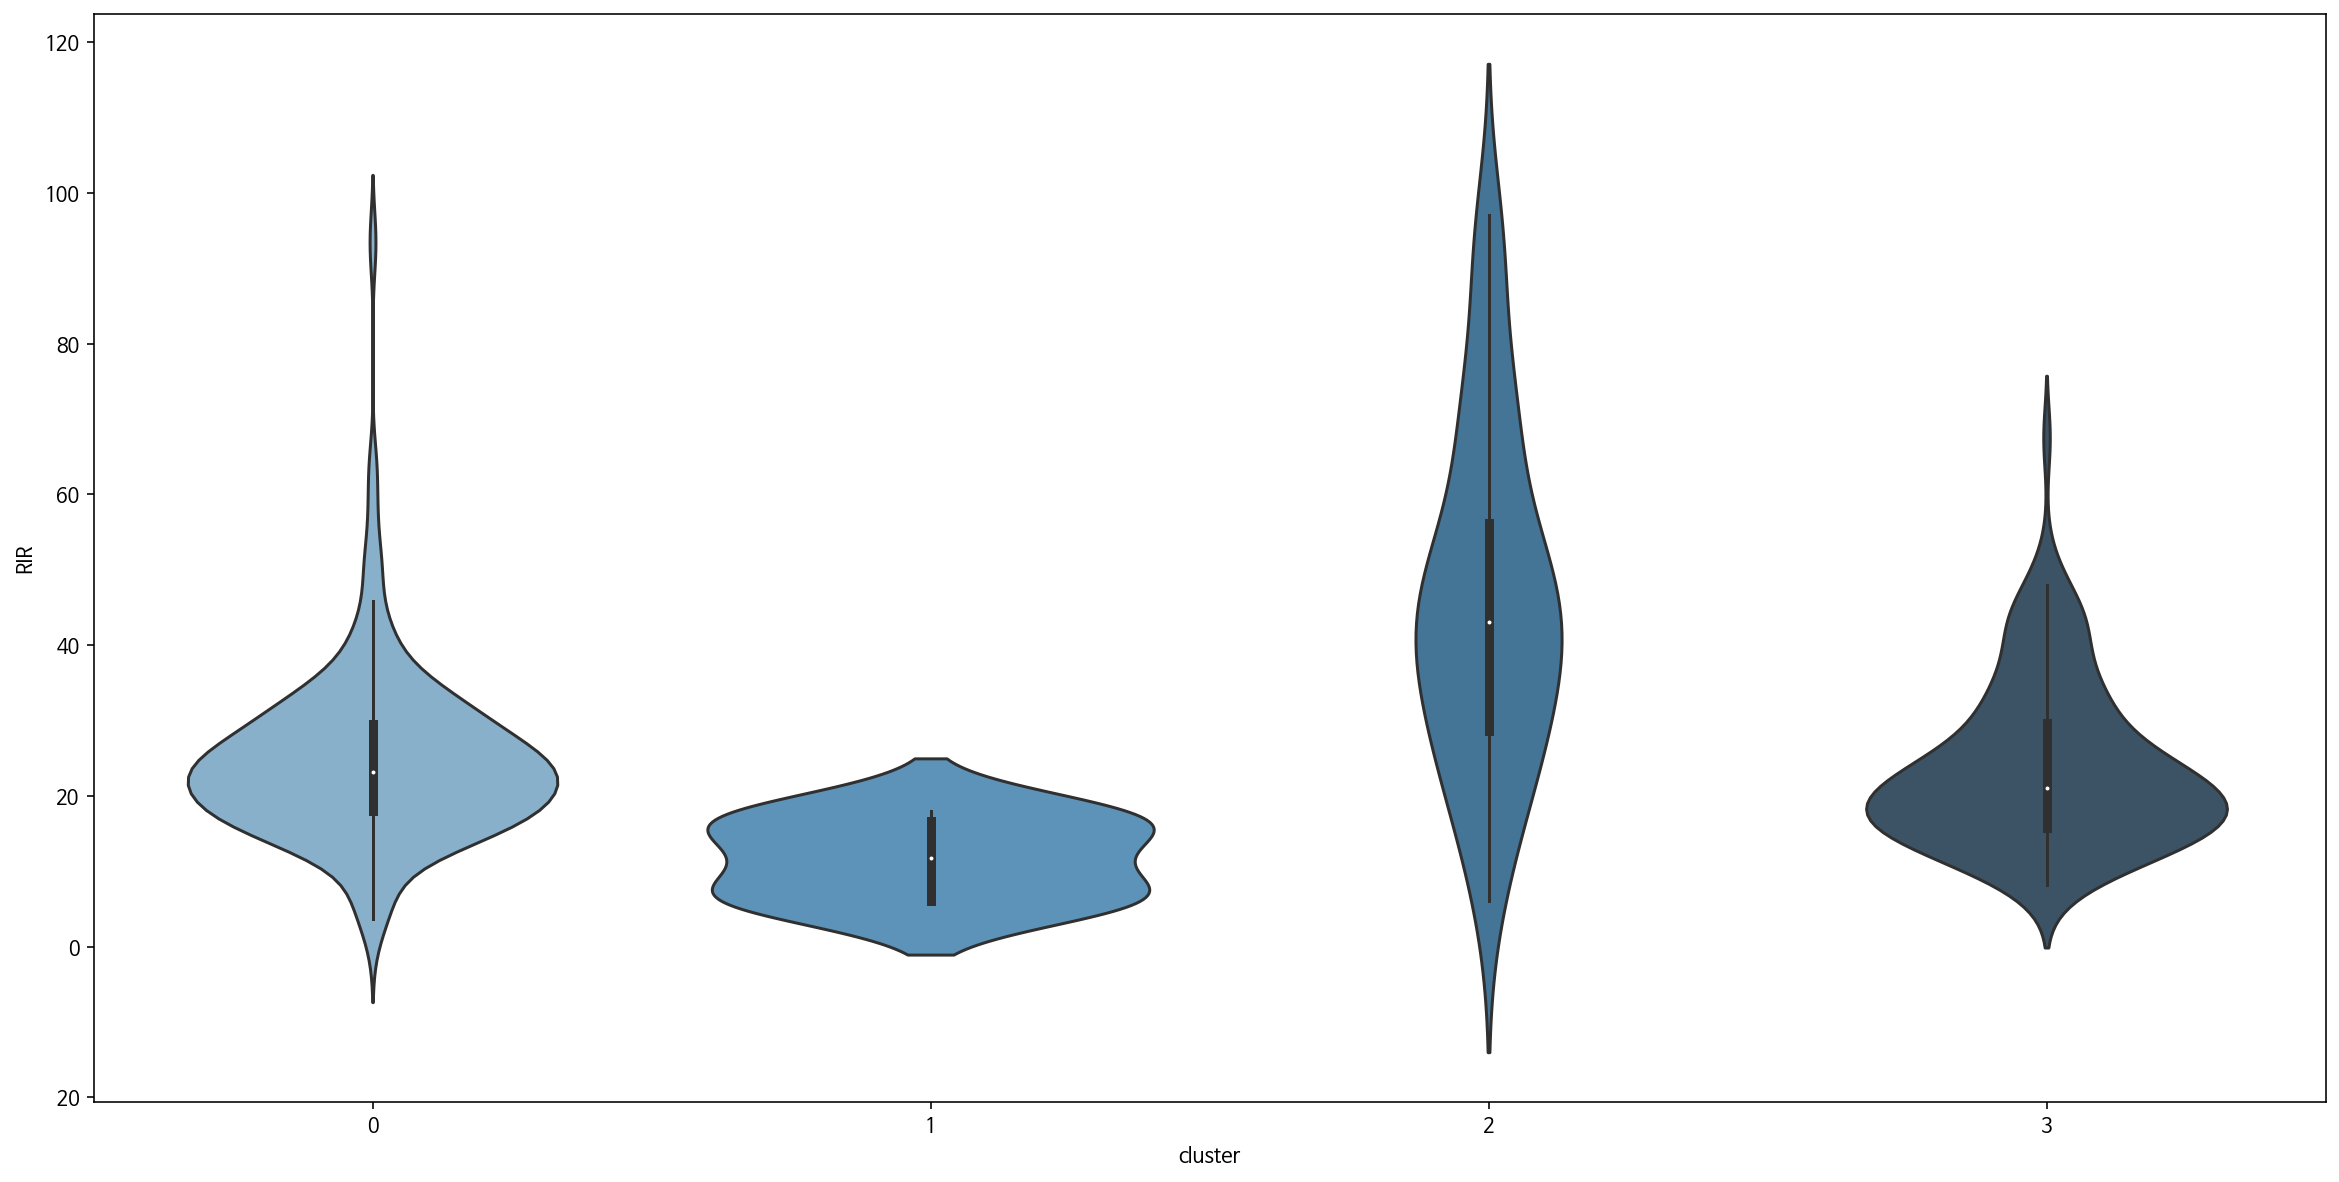

In [ ]:
# 클러스터의 특성을 파악해 보자(3)
plt.figure(figsize = (20,10))
sns.violinplot(x = 'cluster', y = 'RIR', data = df_rir2, palette='Blues_d')
df_rir2.groupby('cluster')['RIR'].mean()

# 소득분위에 대한 cluster와의 관계는 violinplot에서 나타나지 않음

In [ ]:
# 데이터프레임을 이용해 클러스터 값을 분석하기 위한 표 제작
col = ['클러스터 번호', 'RIR', '월주거비', '월 소득 합']
ind = [0, 1, 2, 3]
con = [[0, '24.6(Mid)', '528,868', '2,184,197(Mid)'],[1, '11.6(Low)', '852,250', '7,275,000(High)'], [2, '45.7(High)', '442,436', '1,088,182(Low)'], [3, '23.7(Mid)', '768,561', '3,226,446(Mid)']]
pd.DataFrame(con, columns = col, index = ind)

,클러스터 번호,RIR,월주거비,월 소득 합
0,0,24.6(Mid),"528,868","2,184,197(Mid)"
1,1,11.6(Low),"852,250","7,275,000(High)"
2,2,45.7(High),"442,436","1,088,182(Low)"
3,3,23.7(Mid),"768,561","3,226,446(Mid)"


클러스터 0은 **월 소득이 중하이고 주거비는 중하인** 사람들의 집합이다. 이 때의 **RIR은 중상**수준에 머문다.

클러스터 1은 **월 소득은 높고 주거비도 높은** 사람들의 집합이다. 이 때의 **RIR은 낮은**수준에 머문다.

클러스터 2는 **월 소득이 낮고 주거비도 낮은**사람들의 집합이다. 이 때의 **RIR은 높은**수준에 머문다.

클러스터 3은 **월 소득이 중상이고 주거비는 중상인** 사람들의 집합이다. 이 때의 **RIR은 중하**.


# 2-1. 데이터 전처리_ 행복주택 평균 주거비용

In [ ]:
import pandas as pd

In [ ]:
df_cost = pd.read_csv('/content/drive/Shareddrives/data_festival/서울주택도시공사_청년주택(보증금 및 월 임대료)-수정본 3차.csv', encoding='CP949')

In [ ]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   유형       320 non-null    object
 1   지역(구)    320 non-null    object
 2   단지명(명칭)  320 non-null    object
 3   공급유형     320 non-null    object
 4   신청유형     320 non-null    object
 5   보증금(원)   320 non-null    int64 
 6   월임대료(원)  320 non-null    int64 
 7   공급자      282 non-null    object
dtypes: int64(2), object(6)
memory usage: 20.1+ KB


In [ ]:
df_cost.shape

(320, 8)

In [ ]:
# 필요한 데이터 열만 추출
df_cost = df_cost.loc[:, ['유형', '신청유형', '공급유형', '보증금(원)', '월임대료(원)']]
df_cost.head(10)

,유형,신청유형,공급유형,보증금(원),월임대료(원)
0,역세권청년주택(공공임대),16,대학생,21320000,90000
1,역세권청년주택(공공임대),16,청년,22580000,100000
2,역세권청년주택(공공임대),32B(셰어형),청년,17720000,70000
3,역세권청년주택(공공임대),32A,신혼부부,35400000,140000
4,역세권청년주택(공공임대),16,대학생,16560000,70000
5,역세권청년주택(공공임대),17,청년,19120000,80000
6,역세권청년주택(공공임대),35A,신혼부부,40360000,160000
7,역세권청년주택(공공임대),35B,신혼부부,40920000,160000
8,역세권청년주택(공공임대),14,대학생,16320000,56000
9,역세권청년주택(공공임대),14,청년,17280000,59000


In [ ]:
# 주택 유형중 행복주택만 뽑기
df_cost = df_cost.loc[df_cost['유형'] == '행복주택']
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원)
30,행복주택,16,청년,23040000,77000
31,행복주택,21,청년,29520000,99000
32,행복주택,29,청년,41760000,139000
33,행복주택,24,청년,29160000,97000
34,행복주택,26,청년,29160000,97000
...,...,...,...,...,...
315,행복주택,36,청년,68760000,246000
316,행복주택,36,청년,64940000,233000
317,행복주택,44,신혼부부,88000000,315000
318,행복주택,51,신혼부부,142400000,474000


In [ ]:
# 면적이 16제곱미터 이상 29제곱미터 이하인 경우만 추출하기
df_cost['신청유형'] = df_cost['신청유형'].astype('int')
df_cost = df_cost.loc[(df_cost['신청유형'] >= 16) & (df_cost['신청유형'] <= 29)]
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원)
30,행복주택,16,청년,23040000,77000
31,행복주택,21,청년,29520000,99000
32,행복주택,29,청년,41760000,139000
33,행복주택,24,청년,29160000,97000
34,행복주택,26,청년,29160000,97000
...,...,...,...,...,...
294,행복주택,29,고령자,59660000,189000
297,행복주택,17,대학생,31620000,100000
298,행복주택,17,주거급여수급자,27900000,88000
299,행복주택,29,고령자,59280000,188000


In [ ]:
# 공급받는 사람이 청년, 대학생인 경우만 추출하기
df_cost = df_cost.loc[(df_cost['공급유형'] == '청년') | (df_cost['공급유형'] == '대학생')]
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원)
30,행복주택,16,청년,23040000,77000
31,행복주택,21,청년,29520000,99000
32,행복주택,29,청년,41760000,139000
33,행복주택,24,청년,29160000,97000
34,행복주택,26,청년,29160000,97000
...,...,...,...,...,...
289,행복주택,29,청년,58320000,225000
290,행복주택,29,청년,55080000,212000
292,행복주택,17,대학생,31960000,101000
297,행복주택,17,대학생,31620000,100000


In [ ]:
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원)
30,행복주택,16,청년,23040000,77000
31,행복주택,21,청년,29520000,99000
32,행복주택,29,청년,41760000,139000
33,행복주택,24,청년,29160000,97000
34,행복주택,26,청년,29160000,97000
...,...,...,...,...,...
289,행복주택,29,청년,58320000,225000
290,행복주택,29,청년,55080000,212000
292,행복주택,17,대학생,31960000,101000
297,행복주택,17,대학생,31620000,100000


In [ ]:
#보증금을 월세보증금으로 전환하고 column에 추가
#행복주택 평균 보증금이 6900만원, 전환금 평균 신청액이 1600만원, 이를 비율로 환산하면 평균적으로 23%를 전환하는 것을 알 수 있음. 전환이율은 2.5%로 고정
df_cost['월보증금(원)'] = round(((df_cost['보증금(원)']*0.23*0.025))/12, 0)
df_cost

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원)
30,행복주택,16,청년,23040000,77000,11040.0
31,행복주택,21,청년,29520000,99000,14145.0
32,행복주택,29,청년,41760000,139000,20010.0
33,행복주택,24,청년,29160000,97000,13972.0
34,행복주택,26,청년,29160000,97000,13972.0
...,...,...,...,...,...,...
289,행복주택,29,청년,58320000,225000,27945.0
290,행복주택,29,청년,55080000,212000,26392.0
292,행복주택,17,대학생,31960000,101000,15314.0
297,행복주택,17,대학생,31620000,100000,15151.0


In [ ]:
#관리비 및 최종주거비 정하기
#관리비는 https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=448&aid=0000317680 에 따라 평당 2700원으로 측정
df_cost['관리비(원)'] = df_cost['신청유형'] * 2700
df_cost['주거비'] = df_cost['월임대료(원)']+df_cost['월보증금(원)']+df_cost['관리비(원)']
df_cost

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비
30,행복주택,16,청년,23040000,77000,11040.0,43200,131240.0
31,행복주택,21,청년,29520000,99000,14145.0,56700,169845.0
32,행복주택,29,청년,41760000,139000,20010.0,78300,237310.0
33,행복주택,24,청년,29160000,97000,13972.0,64800,175772.0
34,행복주택,26,청년,29160000,97000,13972.0,70200,181172.0
...,...,...,...,...,...,...,...,...
289,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0
290,행복주택,29,청년,55080000,212000,26392.0,78300,316692.0
292,행복주택,17,대학생,31960000,101000,15314.0,45900,162214.0
297,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0


In [ ]:
# 평 수로 정렬 후, 인덱스 재정렬
df_cost = df_cost.sort_values(by='신청유형')
df_cost = df_cost.reset_index(drop=True)
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비
0,행복주택,16,청년,23040000,77000,11040.0,43200,131240.0
1,행복주택,16,대학생,24480000,95000,11730.0,43200,149930.0
2,행복주택,16,청년,21760000,73000,10427.0,43200,126627.0
3,행복주택,16,청년,23040000,77000,11040.0,43200,131240.0
4,행복주택,16,대학생,37400000,131000,17921.0,43200,192121.0
...,...,...,...,...,...,...,...,...
88,행복주택,29,청년,84240000,289000,40365.0,78300,407665.0
89,행복주택,29,청년,71400000,245000,34212.0,78300,357512.0
90,행복주택,29,청년,75600000,259000,36225.0,78300,373525.0
91,행복주택,29,청년,27880000,95000,13359.0,78300,186659.0


In [ ]:
# 얻어낸 행복주택 데이터셋을 랜덤으로 추출해 1000개의 데이터 프레임 생성
df_cost = df_cost.sample(n=1000, random_state=2000, replace=True).reset_index(drop=True)
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0
...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0


In [ ]:
#1번 데이터셋에서 월 소득합을 랜덤으로 추출해서 적용(중복선택도 허용)
df_cost['월 소득(만원)']=df_rir['월 소득 합'].sample(n=1000, random_state=2000, replace=True).reset_index(drop=True)
df_cost['월 소득(원)']=df_cost['월 소득(만원)']*10000
del(df_cost['월 소득(만원)'])
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원)
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2000000
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0,2000000
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0,1800000
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0,1500000
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2800000
...,...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0,2000000
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0,3000000
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,3000000
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0,1500000


In [ ]:
#RIR 구하기(월 주거비/월 소득)
df_cost['RIR']=round((df_cost['주거비']/(df_cost['월 소득(원)']))*100,1)
df_cost

,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),RIR
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2000000,9.2
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0,2000000,16.6
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0,1800000,13.1
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0,1500000,12.9
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2800000,6.6
...,...,...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0,2000000,17.9
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0,3000000,7.6
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,3000000,6.1
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0,1500000,10.7


In [ ]:
# 소득분위라는 비어있는 열을 만들고 각 분위 마다의 RIR 파악
# 1분위 1인가구 월 소득 : 860000, 2분위 1인가구 소득 : 2220000, 3분위 1인가구 소득 : 3820000
# 4분위 1인가구 소득 : 5960000, 5분위 1인가구 월 소득 : 9890000
# 출처: 통계청 가구특성별_소득분위별_가구소득
df_cost['소득분위'] = ""

i = 0
for i in range(0,1000):
  if df_cost['월 소득(원)'].iloc[i] <= 860000:
    df_cost['소득분위'].iloc[i] = 1
    i = i + 1
  elif 860000 < df_cost['월 소득(원)'].iloc[i] <= 2220000:
    df_cost['소득분위'].iloc[i] = 2
    i = i + 1
  elif 2220000 < df_cost['월 소득(원)'].iloc[i] <= 3820000:
    df_cost['소득분위'].iloc[i] = 3
    i = i + 1
  elif 3820000 < df_cost['월 소득(원)'].iloc[i] <= 5960000:
    df_cost['소득분위'].iloc[i] = 4
    i = i + 1
  else:
    df_cost['소득분위'].iloc[i] = 5
    i = i + 1
df_cost

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),RIR,소득분위
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2000000,9.2,2
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0,2000000,16.6,2
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0,1800000,13.1,2
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0,1500000,12.9,2
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2800000,6.6,3
...,...,...,...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0,2000000,17.9,2
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0,3000000,7.6,3
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,3000000,6.1,3
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0,1500000,10.7,2


In [ ]:
# 주택 가격 계급
df_cost['주택_가격_계급'] = ''

i = 0
for i in range(0,1000):
  if df_cost['주거비'].iloc[i] <= df_cost['주거비'].quantile(q=0.2, interpolation='nearest'):
    df_cost['주택_가격_계급'].iloc[i] = 1
    i = i + 1
  elif df_cost['주거비'].quantile(q=0.2, interpolation='nearest') < df_cost['주거비'].iloc[i] <= df_cost['주거비'].quantile(q=0.4, interpolation='nearest'):
    df_cost['주택_가격_계급'].iloc[i] = 2
    i = i + 1
  elif df_cost['주거비'].quantile(q=0.4, interpolation='nearest') < df_cost['주거비'].iloc[i] <= df_cost['주거비'].quantile(q=0.6, interpolation='nearest'):
    df_cost['주택_가격_계급'].iloc[i] = 3
    i = i + 1
  elif df_cost['주거비'].quantile(q=0.6, interpolation='nearest') < df_cost['주거비'].iloc[i] <= df_cost['주거비'].quantile(q=0.8, interpolation='nearest'):
    df_cost['주택_가격_계급'].iloc[i] = 4
    i = i + 1
  else:
    df_cost['주택_가격_계급'].iloc[i] = 5
    i = i + 1

df_cost

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),RIR,소득분위,주택_가격_계급
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2000000,9.2,2,2
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0,2000000,16.6,2,5
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0,1800000,13.1,2,3
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0,1500000,12.9,2,2
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2800000,6.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0,2000000,17.9,2,5
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0,3000000,7.6,3,2
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,3000000,6.1,3,2
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0,1500000,10.7,2,1


In [ ]:
# 소득분위별 RIR 평균 구하기
df_cost.groupby('소득분위')['RIR'].mean()

소득분위
1    54.367213
2    14.181406
3     9.030197
4     5.856667
5     3.072727
Name: RIR, dtype: float64

In [ ]:
# 1번 데이터셋에서 필요한 자료 랜덤 추출
df_compare = df_rir.sample(n=1000, random_state = 2000, replace=True).reset_index(drop=True)
df_compare2 = df_compare.loc[:, ['주택유형', '면적', '임차료_월세', '전세보증금_월세전환', '월평균주거관리비', 'RIR', '월 소득 합']]
df_compare2

,주택유형,면적,임차료_월세,전세보증금_월세전환,월평균주거관리비,RIR,월 소득 합
0,8,19.834710,0.0,66.1,6,36.0,200
1,6,33.057850,50.0,0.0,10,30.0,200
2,2,29.752065,20.0,0.0,9,16.1,180
3,8,16.528925,45.0,0.0,2,31.3,150
4,2,36.363635,0.0,50.8,8,21.0,280
...,...,...,...,...,...,...,...
995,8,26.446280,0.0,43.2,13,28.1,200
996,6,29.752065,0.0,55.9,6,20.6,300
997,2,16.528925,34.0,0.0,6,13.3,300
998,8,16.528925,45.0,0.0,2,31.3,150


In [ ]:
#df_compare2의 단위를 '원'으로 맞춰주기
df_compare2['주택유형']='일반주택'
df_compare2['면적']=round(df_compare2['면적'],1)
df_compare2['임차료_월세']=(df_compare2['임차료_월세']*10000)
df_compare2['전세보증금_월세전환']=(df_compare2['전세보증금_월세전환']*10000)
df_compare2['월평균주거관리비']=(df_compare2['월평균주거관리비']*10000)
df_compare2['월 소득 합']=(df_compare2['월 소득 합']*10000)
df_compare2

,주택유형,면적,임차료_월세,전세보증금_월세전환,월평균주거관리비,RIR,월 소득 합
0,일반주택,19.8,0.0,661000.0,60000,36.0,2000000
1,일반주택,33.1,500000.0,0.0,100000,30.0,2000000
2,일반주택,29.8,200000.0,0.0,90000,16.1,1800000
3,일반주택,16.5,450000.0,0.0,20000,31.3,1500000
4,일반주택,36.4,0.0,508000.0,80000,21.0,2800000
...,...,...,...,...,...,...,...
995,일반주택,26.4,0.0,432000.0,130000,28.1,2000000
996,일반주택,29.8,0.0,559000.0,60000,20.6,3000000
997,일반주택,16.5,340000.0,0.0,60000,13.3,3000000
998,일반주택,16.5,450000.0,0.0,20000,31.3,1500000


In [ ]:
#df_compare2의 소득분위 생성
df_compare2['소득분위'] = ""

i = 0
for i in range(0,1000):
  if df_compare2['월 소득 합'].iloc[i] <= 860000:
    df_compare2['소득분위'].iloc[i] = 1
    i = i + 1
  elif 860000 < df_compare2['월 소득 합'].iloc[i] <= 2220000:
    df_compare2['소득분위'].iloc[i] = 2
    i = i + 1
  elif 2220000 < df_compare2['월 소득 합'].iloc[i] <= 3820000:
    df_compare2['소득분위'].iloc[i] = 3
    i = i + 1
  elif 3820000 < df_compare2['월 소득 합'].iloc[i] <= 5960000:
    df_compare2['소득분위'].iloc[i] = 4
    i = i + 1
  else:
    df_compare2['소득분위'].iloc[i] = 5
    i = i + 1
df_compare2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,주택유형,면적,임차료_월세,전세보증금_월세전환,월평균주거관리비,RIR,월 소득 합,소득분위
0,일반주택,19.8,0.0,661000.0,60000,36.0,2000000,2
1,일반주택,33.1,500000.0,0.0,100000,30.0,2000000,2
2,일반주택,29.8,200000.0,0.0,90000,16.1,1800000,2
3,일반주택,16.5,450000.0,0.0,20000,31.3,1500000,2
4,일반주택,36.4,0.0,508000.0,80000,21.0,2800000,3
...,...,...,...,...,...,...,...,...
995,일반주택,26.4,0.0,432000.0,130000,28.1,2000000,2
996,일반주택,29.8,0.0,559000.0,60000,20.6,3000000,3
997,일반주택,16.5,340000.0,0.0,60000,13.3,3000000,3
998,일반주택,16.5,450000.0,0.0,20000,31.3,1500000,2


In [ ]:
# 새로운 데이터 프레임 생성
df_cost2 = df_cost.copy()
df_cost2

,유형,신청유형,공급유형,보증금(원),월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),RIR,소득분위,주택_가격_계급
0,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2000000,9.2,2,2
1,행복주택,29,청년,58320000,225000,27945.0,78300,331245.0,2000000,16.6,2,5
2,행복주택,29,청년,37740000,139000,18084.0,78300,235384.0,1800000,13.1,2,3
3,행복주택,29,청년,29520000,101000,14145.0,78300,193445.0,1500000,12.9,2,2
4,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,2800000,6.6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,행복주택,25,청년,74880000,255000,35880.0,67500,358380.0,2000000,17.9,2,5
996,행복주택,29,청년,39440000,131000,18898.0,78300,228198.0,3000000,7.6,3,2
997,행복주택,27,청년,29160000,97000,13972.0,72900,183872.0,3000000,6.1,3,2
998,행복주택,17,대학생,31620000,100000,15151.0,45900,161051.0,1500000,10.7,2,1


In [ ]:
#df_cost와 df_compare2의 columns 통일(1)
df_cost2['행복주택_거주여부'] = ""
df_cost2 = df_cost2.loc[:, ['유형', '행복주택_거주여부', '신청유형', '월임대료(원)', '월보증금(원)', '관리비(원)', '월 소득(원)', '소득분위', 'RIR']]
df_cost2.columns = ['주택유형', '행복주택_거주여부', '면적', '월임대료(원)', '월보증금(원)', '관리비(원)', '월 소득(원)', '소득분위', 'RIR']
df_cost2

,주택유형,행복주택_거주여부,면적,월임대료(원),월보증금(원),관리비(원),월 소득(원),소득분위,RIR
0,행복주택,,27,97000,13972.0,72900,2000000,2,9.2
1,행복주택,,29,225000,27945.0,78300,2000000,2,16.6
2,행복주택,,29,139000,18084.0,78300,1800000,2,13.1
3,행복주택,,29,101000,14145.0,78300,1500000,2,12.9
4,행복주택,,27,97000,13972.0,72900,2800000,3,6.6
...,...,...,...,...,...,...,...,...,...
995,행복주택,,25,255000,35880.0,67500,2000000,2,17.9
996,행복주택,,29,131000,18898.0,78300,3000000,3,7.6
997,행복주택,,27,97000,13972.0,72900,3000000,3,6.1
998,행복주택,,17,100000,15151.0,45900,1500000,2,10.7


In [ ]:
#df_cost와 df_compare2의 columns 통일(2)
df_compare2['행복주택_거주여부'] = ""
df_compare2 = df_compare2.loc[:, ['주택유형', '행복주택_거주여부', '면적', '임차료_월세', '전세보증금_월세전환', '월평균주거관리비', '월 소득 합', '소득분위', 'RIR']]
df_compare2.columns = ['주택유형', '행복주택_거주여부', '면적', '월임대료(원)', '월보증금(원)', '관리비(원)', '월 소득(원)', '소득분위', 'RIR']
df_compare2 = df_compare2.reset_index(drop=True)
df_compare2

,주택유형,행복주택_거주여부,면적,월임대료(원),월보증금(원),관리비(원),월 소득(원),소득분위,RIR
0,일반주택,,19.8,0.0,661000.0,60000,2000000,2,36.0
1,일반주택,,33.1,500000.0,0.0,100000,2000000,2,30.0
2,일반주택,,29.8,200000.0,0.0,90000,1800000,2,16.1
3,일반주택,,16.5,450000.0,0.0,20000,1500000,2,31.3
4,일반주택,,36.4,0.0,508000.0,80000,2800000,3,21.0
...,...,...,...,...,...,...,...,...,...
995,일반주택,,26.4,0.0,432000.0,130000,2000000,2,28.1
996,일반주택,,29.8,0.0,559000.0,60000,3000000,3,20.6
997,일반주택,,16.5,340000.0,0.0,60000,3000000,3,13.3
998,일반주택,,16.5,450000.0,0.0,20000,1500000,2,31.3


In [ ]:
# df_cost2와 df_compare2의 병합 후, 행복 주택 거주여부 입력(거주 시 1, 비거주시 0) + 주거비 계급을 나누기 위한 주거비 추가
df_result = pd.concat([df_cost2,df_compare2])
df_result = df_result.reset_index(drop=True)

i = 0
for i in range(0,2000):
  if df_result['주택유형'].iloc[i] == '행복주택':
    df_result['행복주택_거주여부'].iloc[i] = 1
    i = i + 1
  elif df_result['주택유형'].iloc[i] != '행복주택':
    df_result['행복주택_거주여부'].iloc[i] = 0
    i = i + 1

df_result['주거비'] = df_result['월임대료(원)']+df_result['월보증금(원)']+df_result['관리비(원)']
df_result = df_result.loc[:, ['주택유형', '행복주택_거주여부', '면적', '월임대료(원)', '월보증금(원)', '관리비(원)', '주거비', '월 소득(원)', '소득분위', 'RIR']]
df_result

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,주택유형,행복주택_거주여부,면적,월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),소득분위,RIR
0,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,2000000,2,9.2
1,행복주택,1,29.0,225000.0,27945.0,78300,331245.0,2000000,2,16.6
2,행복주택,1,29.0,139000.0,18084.0,78300,235384.0,1800000,2,13.1
3,행복주택,1,29.0,101000.0,14145.0,78300,193445.0,1500000,2,12.9
4,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,2800000,3,6.6
...,...,...,...,...,...,...,...,...,...,...
1995,일반주택,0,26.4,0.0,432000.0,130000,562000.0,2000000,2,28.1
1996,일반주택,0,29.8,0.0,559000.0,60000,619000.0,3000000,3,20.6
1997,일반주택,0,16.5,340000.0,0.0,60000,400000.0,3000000,3,13.3
1998,일반주택,0,16.5,450000.0,0.0,20000,470000.0,1500000,2,31.3


In [ ]:
#이상치 제거 및 행복주택과 면적 통일
df_result = df_result.drop(df_result[df_result['면적'] == 9999999.0].index)
df_result = df_result.drop(df_result[df_result['RIR'] > 100].index)
df_result = df_result.drop(df_result[df_result['면적']>29].index)
df_result = df_result.drop(df_result[df_result['면적']<16].index)
df_result.reset_index(drop=True)

,주택유형,행복주택_거주여부,면적,월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),소득분위,RIR
0,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,2000000,2,9.2
1,행복주택,1,29.0,225000.0,27945.0,78300,331245.0,2000000,2,16.6
2,행복주택,1,29.0,139000.0,18084.0,78300,235384.0,1800000,2,13.1
3,행복주택,1,29.0,101000.0,14145.0,78300,193445.0,1500000,2,12.9
4,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,2800000,3,6.6
...,...,...,...,...,...,...,...,...,...,...
1505,일반주택,0,23.1,400000.0,0.0,140000,540000.0,2000000,2,27.0
1506,일반주택,0,26.4,300000.0,0.0,60000,360000.0,2540000,3,14.2
1507,일반주택,0,26.4,0.0,432000.0,130000,562000.0,2000000,2,28.1
1508,일반주택,0,16.5,340000.0,0.0,60000,400000.0,3000000,3,13.3


In [ ]:
#데이터프레임 describe를 동해 주거비 분포 확인
df_result.describe()

,면적,월임대료(원),월보증금(원),관리비(원),주거비,월 소득(원),RIR
count,1510.000000,1.510000e+03,1.510000e+03,1510.000000,1.510000e+03,1.510000e+03,1510.000000
mean,23.199868,2.156420e+05,5.289731e+04,70502.715232,3.390420e+05,2.304967e+06,17.419205
std,4.460480,1.630517e+05,1.446722e+05,24209.889031,1.853917e+05,8.972244e+05,13.136010
min,16.000000,0.000000e+00,0.000000e+00,20000.000000,6.000000e+04,2.000000e+05,1.900000
25%,19.800000,1.000000e+05,0.000000e+00,54000.000000,2.041700e+05,2.000000e+06,9.100000
50%,23.100000,1.740000e+05,1.808400e+04,70000.000000,3.000000e+05,2.200000e+06,13.900000
75%,27.000000,2.790000e+05,2.704400e+04,78300.000000,4.300000e+05,2.800000e+06,22.000000
max,29.000000,1.500000e+06,1.220000e+06,200000.000000,1.640000e+06,8.000000e+06,97.200000


In [ ]:
#주택 가격 계급
df_result['주택_가격_계급'] = ''

i = 0
for i in range(0,1510):
  if df_result['주거비'].iloc[i] <= df_result['주거비'].quantile(q=0.2, interpolation='nearest'):
    df_result['주택_가격_계급'].iloc[i] = 1
    i = i + 1
  elif df_result['주거비'].quantile(q=0.2, interpolation='nearest') < df_result['주거비'].iloc[i] <= df_result['주거비'].quantile(q=0.4, interpolation='nearest'):
    df_result['주택_가격_계급'].iloc[i] = 2
    i = i + 1
  elif df_result['주거비'].quantile(q=0.4, interpolation='nearest') < df_result['주거비'].iloc[i] <= df_result['주거비'].quantile(q=0.6, interpolation='nearest'):
    df_result['주택_가격_계급'].iloc[i] = 3
    i = i + 1
  elif df_result['주거비'].quantile(q=0.6, interpolation='nearest') < df_result['주거비'].iloc[i] <= df_result['주거비'].quantile(q=0.8, interpolation='nearest'):
    df_result['주택_가격_계급'].iloc[i] = 4
    i = i + 1
  else:
    df_result['주택_가격_계급'].iloc[i] = 5
    i = i + 1

df_result = df_result.loc[:, ['주택유형', '행복주택_거주여부', '면적', '월임대료(원)', '월보증금(원)', '관리비(원)', '주거비', '주택_가격_계급', '월 소득(원)', '소득분위', 'RIR']]
df_result

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,주택유형,행복주택_거주여부,면적,월임대료(원),월보증금(원),관리비(원),주거비,주택_가격_계급,월 소득(원),소득분위,RIR
0,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,1,2000000,2,9.2
1,행복주택,1,29.0,225000.0,27945.0,78300,331245.0,3,2000000,2,16.6
2,행복주택,1,29.0,139000.0,18084.0,78300,235384.0,2,1800000,2,13.1
3,행복주택,1,29.0,101000.0,14145.0,78300,193445.0,2,1500000,2,12.9
4,행복주택,1,27.0,97000.0,13972.0,72900,183872.0,1,2800000,3,6.6
...,...,...,...,...,...,...,...,...,...,...,...
1991,일반주택,0,23.1,400000.0,0.0,140000,540000.0,5,2000000,2,27.0
1993,일반주택,0,26.4,300000.0,0.0,60000,360000.0,4,2540000,3,14.2
1995,일반주택,0,26.4,0.0,432000.0,130000,562000.0,5,2000000,2,28.1
1997,일반주택,0,16.5,340000.0,0.0,60000,400000.0,4,3000000,3,13.3


In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   주택유형       1510 non-null   object 
 1   행복주택_거주여부  1510 non-null   object 
 2   면적         1510 non-null   float64
 3   월임대료(원)    1510 non-null   float64
 4   월보증금(원)    1510 non-null   float64
 5   관리비(원)     1510 non-null   int64  
 6   주거비        1510 non-null   float64
 7   주택_가격_계급   1510 non-null   object 
 8   월 소득(원)    1510 non-null   int64  
 9   소득분위       1510 non-null   object 
 10  RIR        1510 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 141.6+ KB


In [ ]:
df_result.shape

(1510, 11)

# 2-2. 행복주택 RIR 회귀분석 및 시각화

In [ ]:
#회귀분석을 위한 목푯값(Labels)와 변수(features) 지정
labels = df_result['RIR']
features = df_result[['행복주택_거주여부', '소득분위', '주택_가격_계급']]

print(labels.shape)
labels.head()

(1510,)


0     9.2
1    16.6
2    13.1
3    12.9
4     6.6
Name: RIR, dtype: float64

In [ ]:
#회귀분석을 위한 목푯값(Labels)와 변수(features) 지정
features.head()

,행복주택_거주여부,소득분위,주택_가격_계급
0,1,2,1
1,1,2,3
2,1,2,2
3,1,2,2
4,1,3,1


In [ ]:
# <소득분위에 따른 행복주택 주거 여부에 따른 RIR의 변화>를 알아보기 위한 회귀식
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(features, labels)
print(model.intercept_, model.coef_)


34.5443343872749 [ -3.20528345 -10.80084749   3.97337867]


rir_happy(행복주택 RIR)=34.5443343872749  **-3.20528345 X 행복주택 거주여부**  **-10.80084749 X 소득분위**  **+3.97337867 X 주택가격계급**

In [ ]:
# OLS회귀분석을 통한 분석확인(1)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
x_data = df_result[['행복주택_거주여부', '소득분위', '주택_가격_계급']]
target = df_result[['RIR']]

multi_model = sm.OLS(target.astype(float), x_data.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    RIR   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              1641.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:41:47   Log-Likelihood:                         -5701.8
No. Observations:                1510   AIC:                                  1.141e+04
Df Residuals:                    1507   BIC:                                  1.143e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
행복주택_거주여부      8.8531      0.614     14.418      0.000       7.649      10.058
소득분위          -5.7210      0.334    -17.104      0.000      -6.377      -5.065
주택_가격_계급       8.3440      0.193     43.136      0.000       7.965       8.723
==============================================================================
Omnibus:                      935.776   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10684.006
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      14.814   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

행복주택 거주여부, 소득분위, 주택가격계급 모두 p-value가 0.05 미만이므로 **통계적으로 유의미**하다고 할 수 있다.

R-스퀘어의 경우, 0.766으로 **모델이 변수를 설명하는데 적합**하다고 할 수 있다.

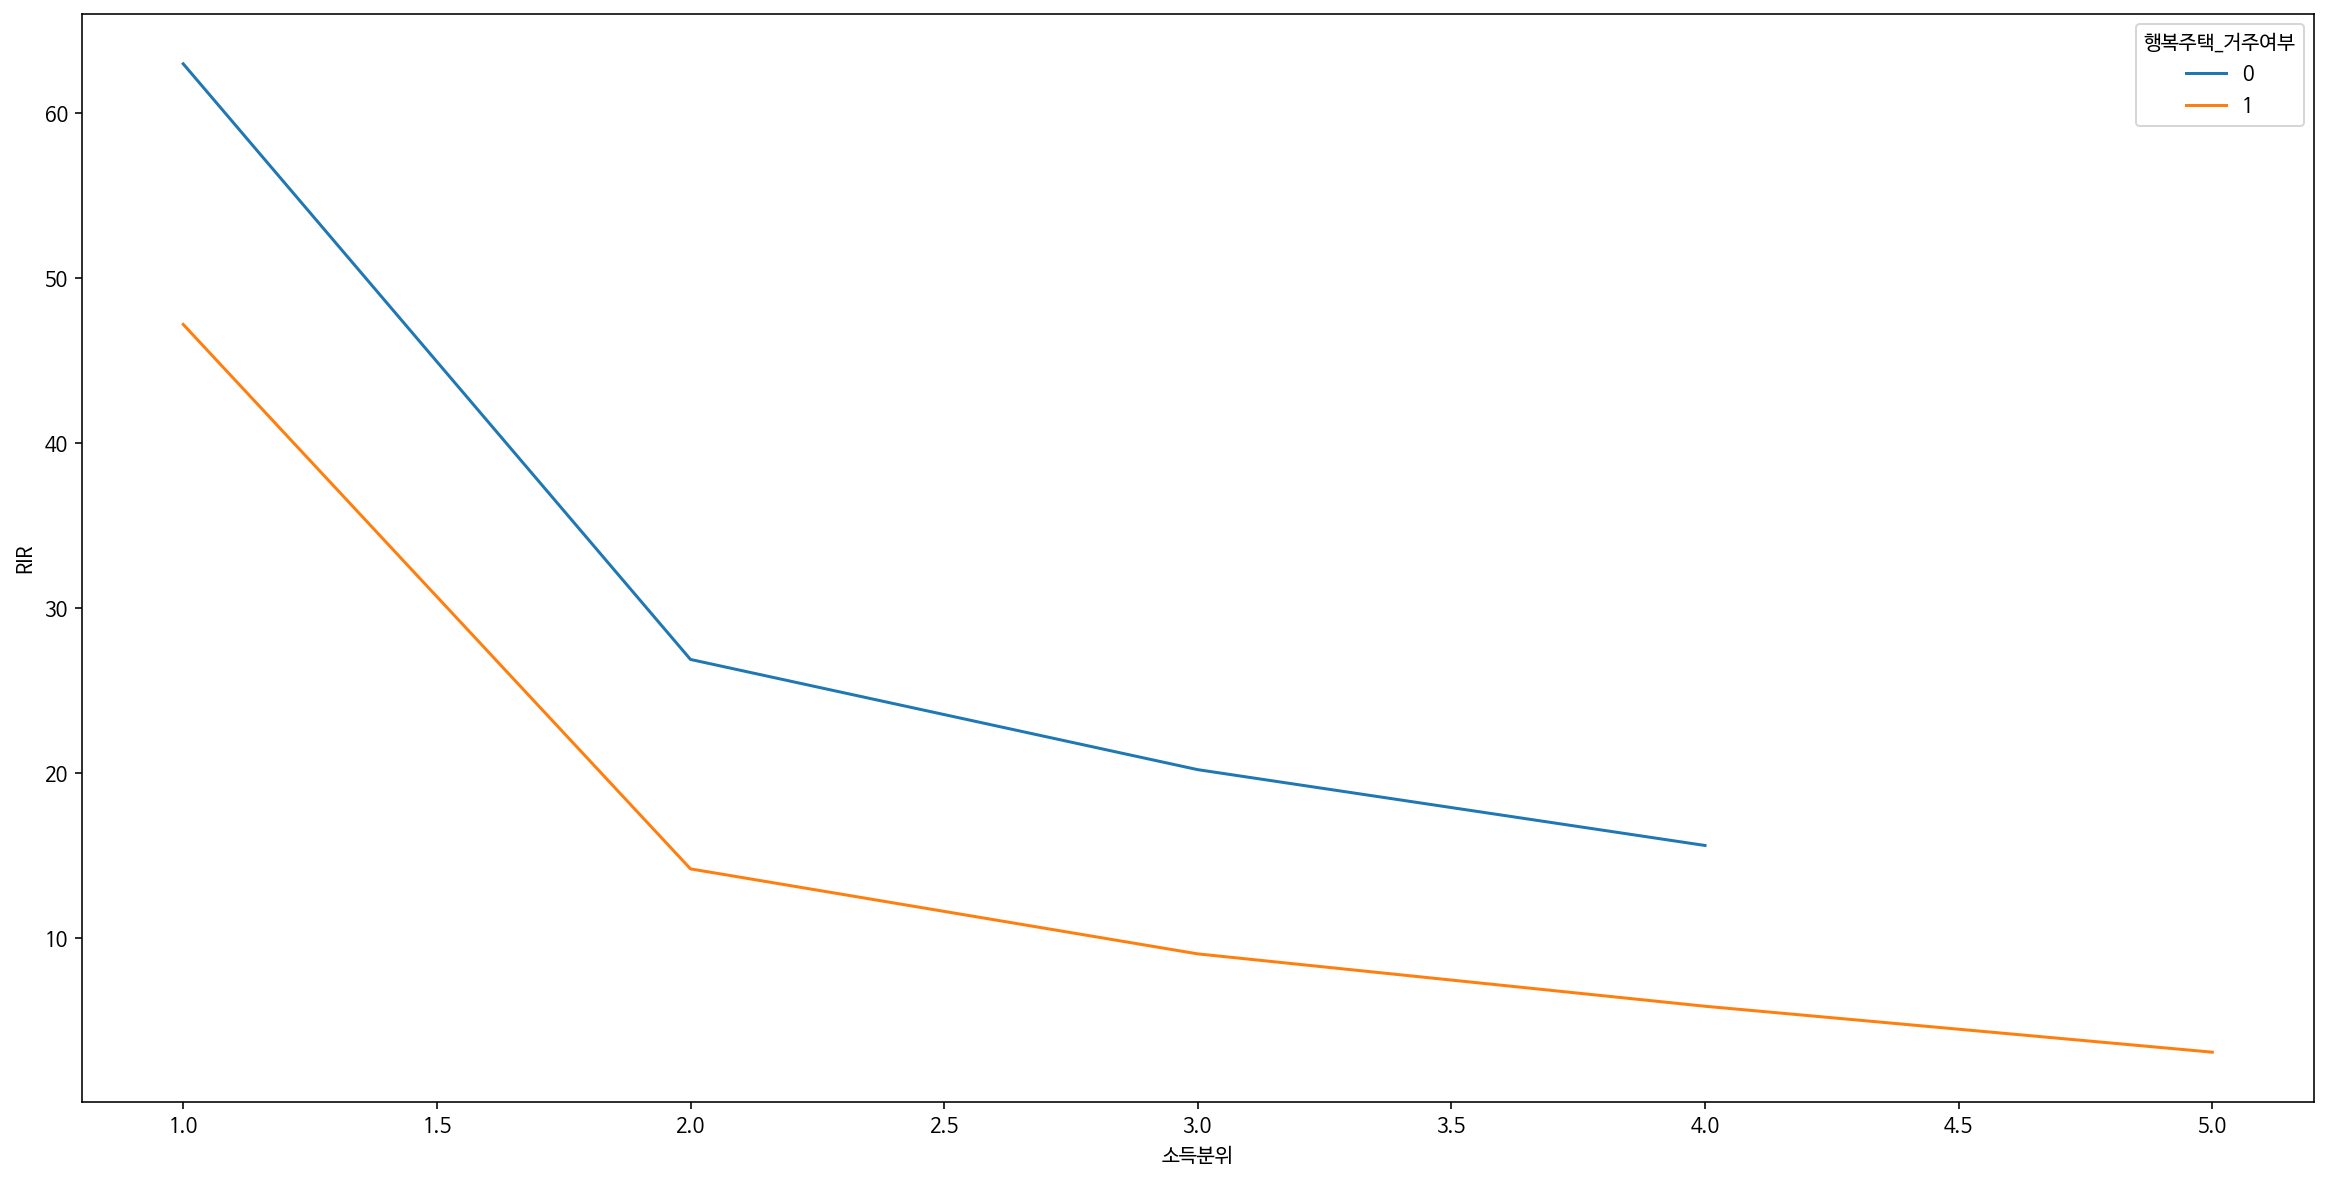

In [ ]:
# 꺾은선 그래프를 통한 행복주택 거주자와 일반주택 거주자의 소득분위별 RIR 파악
plt.figure(figsize=(20,10))
sns.lineplot(x= '소득분위', y = 'RIR', hue = '행복주택_거주여부', data = df_result, ci=None)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

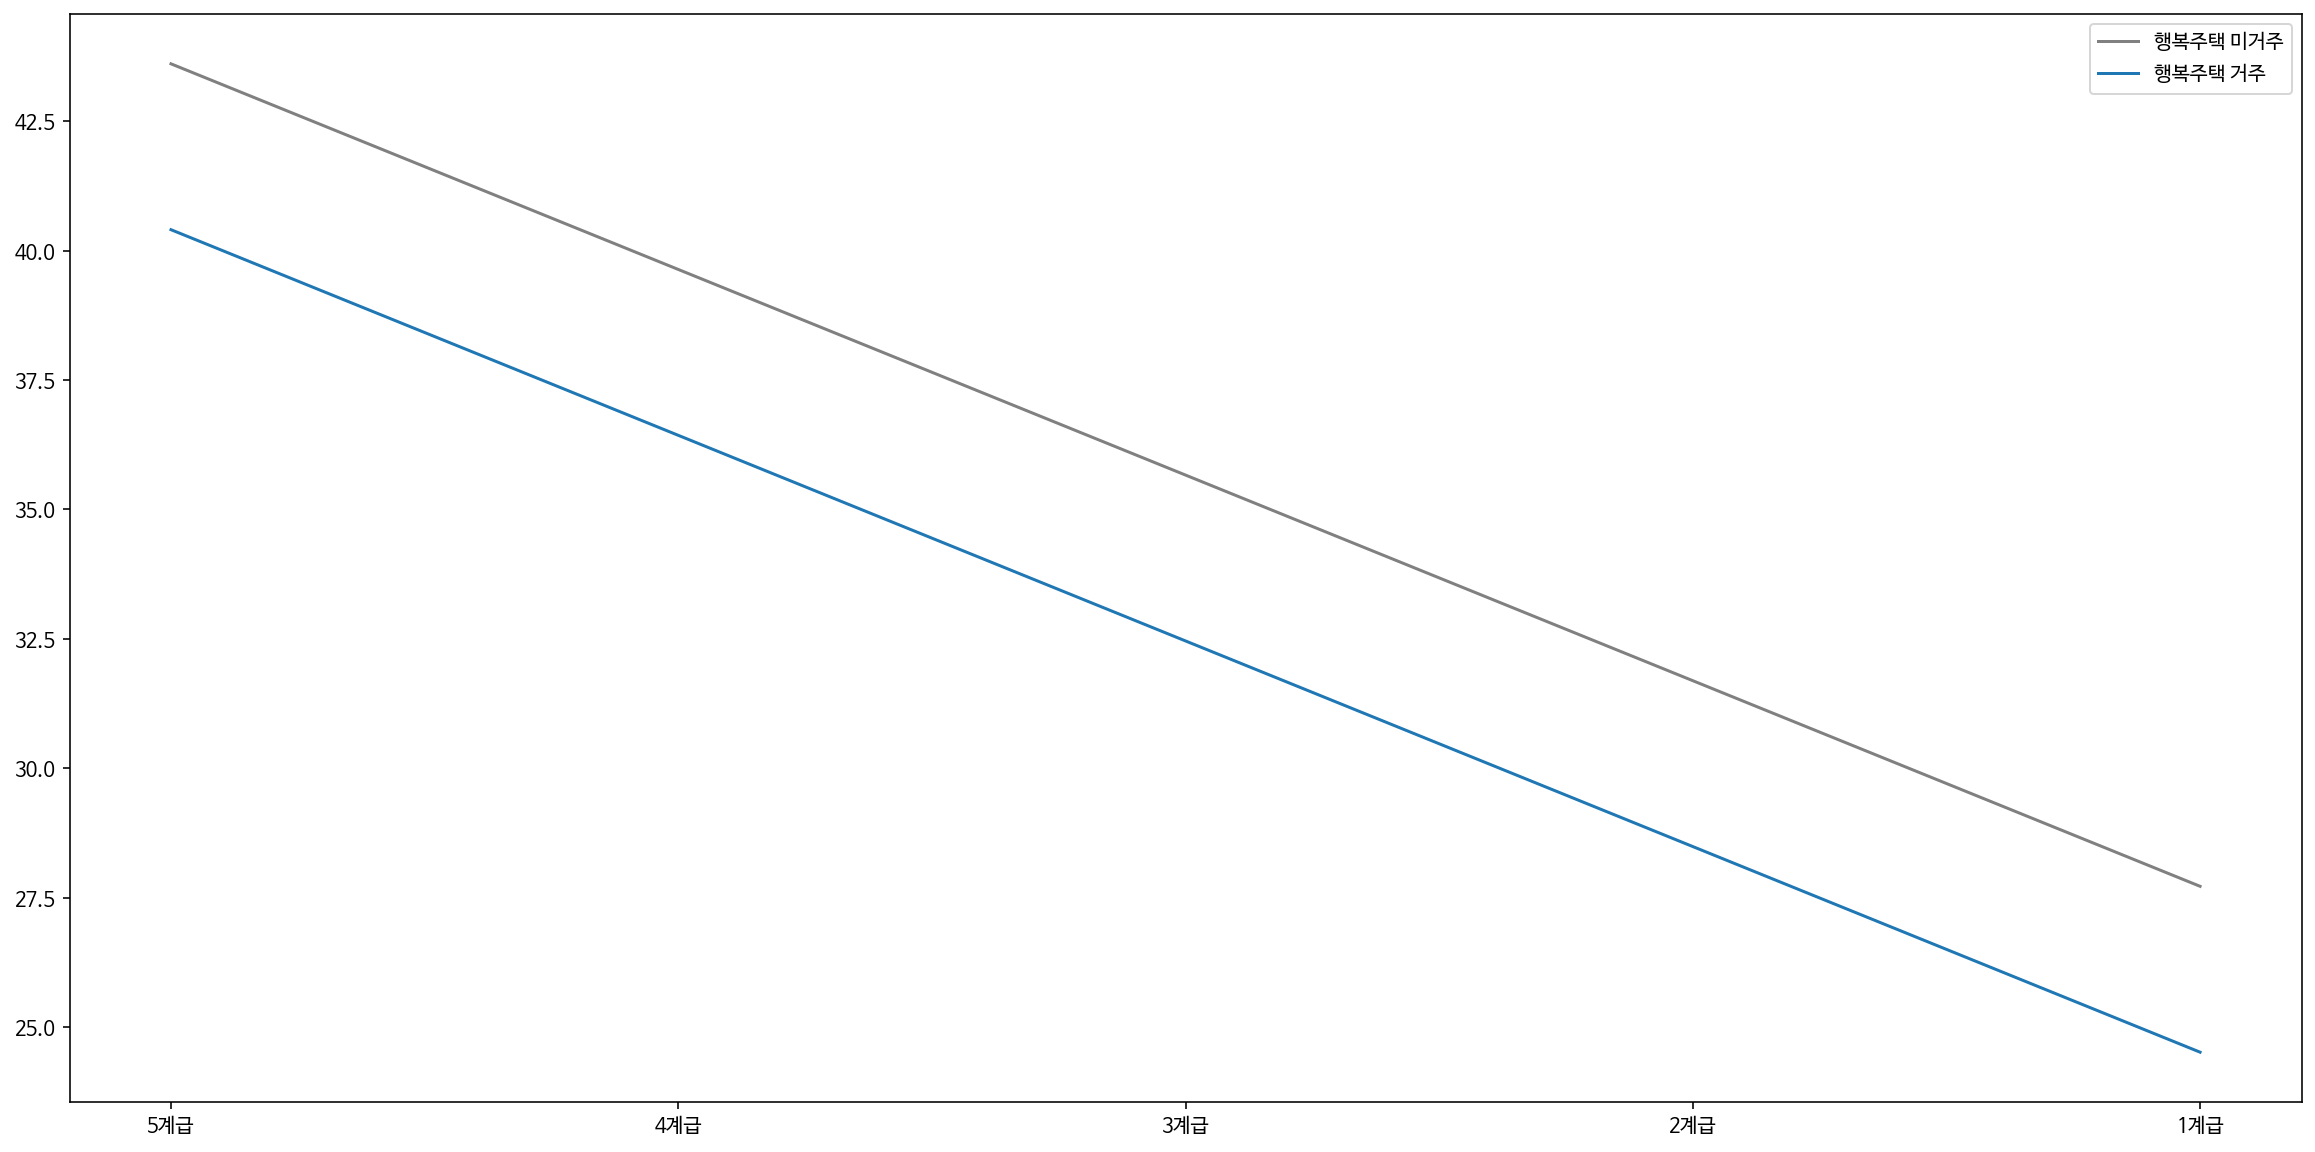

In [ ]:
# <행복주택 주거 여부에 따른 RIR의 변화>를 알아보기 위한 회귀식을 통한 예측치 확인
from matplotlib import pyplot as plt

# 행복주택 거주 할 때의 예측치(1분위 기준)
x_values = ['5계급', '4계급', '3계급', '2계급', '1계급']
live1 = model.predict([[1,1,5]])
live2 = model.predict([[1,1,4]])
live3 = model.predict([[1,1,3]])
live4 = model.predict([[1,1,2]])
live5 = model.predict([[1,1,1]])
live_values = [live1, live2, live3, live4, live5]

# 행복주택 거주 하지 않을 때의 예측치(1분위 기준)
non_live1 = model.predict([[0,1,5]])
non_live2 = model.predict([[0,1,4]])
non_live3 = model.predict([[0,1,3]])
non_live4 = model.predict([[0,1,2]])
non_live5 = model.predict([[0,1,1]])
non_values = [non_live1, non_live2, non_live3, non_live4, non_live5]


plt.figure(figsize = (20,10))
plt.plot(x_values, non_values, label = '행복주택 미거주',color = 'gray')
plt.plot(x_values, live_values, label = '행복주택 거주')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

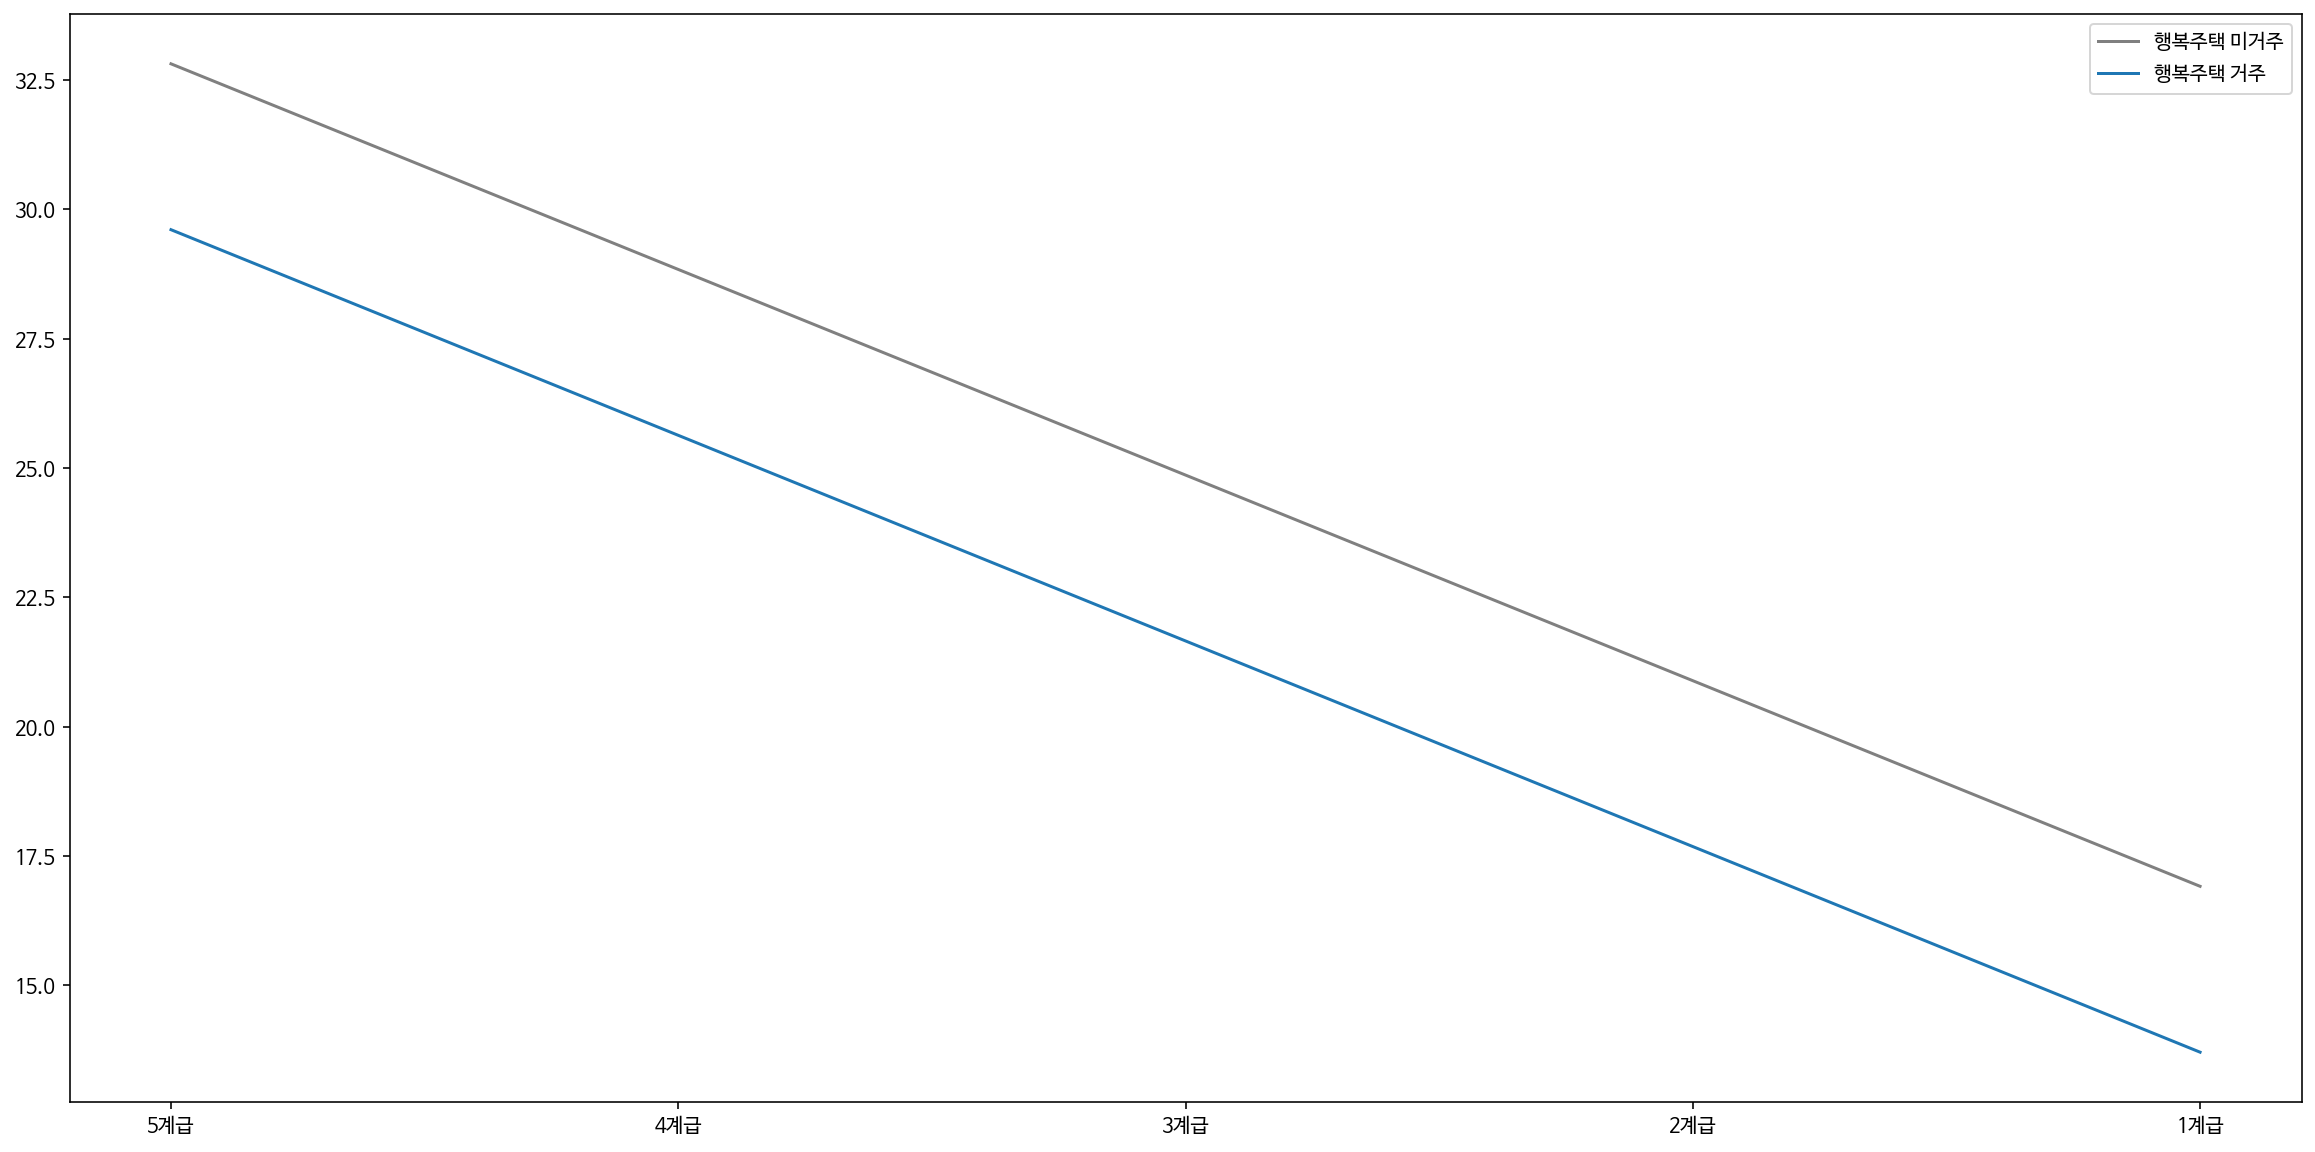

In [ ]:
# 행복주택 거주 할 때의 예측치(2분위 기준)
x_values = ['5계급', '4계급', '3계급', '2계급', '1계급']
live6 = model.predict([[1,2,5]])
live7 = model.predict([[1,2,4]])
live8 = model.predict([[1,2,3]])
live9 = model.predict([[1,2,2]])
live10 = model.predict([[1,2,1]])
live_values2 = [live6, live7, live8, live9, live10]

# 행복주택 거주 하지 않을 때의 예측치(2분위 기준)
non_live6 = model.predict([[0,2,5]])
non_live7 = model.predict([[0,2,4]])
non_live8 = model.predict([[0,2,3]])
non_live9 = model.predict([[0,2,2]])
non_live10 = model.predict([[0,2,1]])
non_values2 = [non_live6, non_live7, non_live8, non_live9, non_live10]

plt.figure(figsize = (20,10))
plt.plot(x_values, non_values2, label = '행복주택 미거주',color = 'gray')
plt.plot(x_values, live_values2, label = '행복주택 거주')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

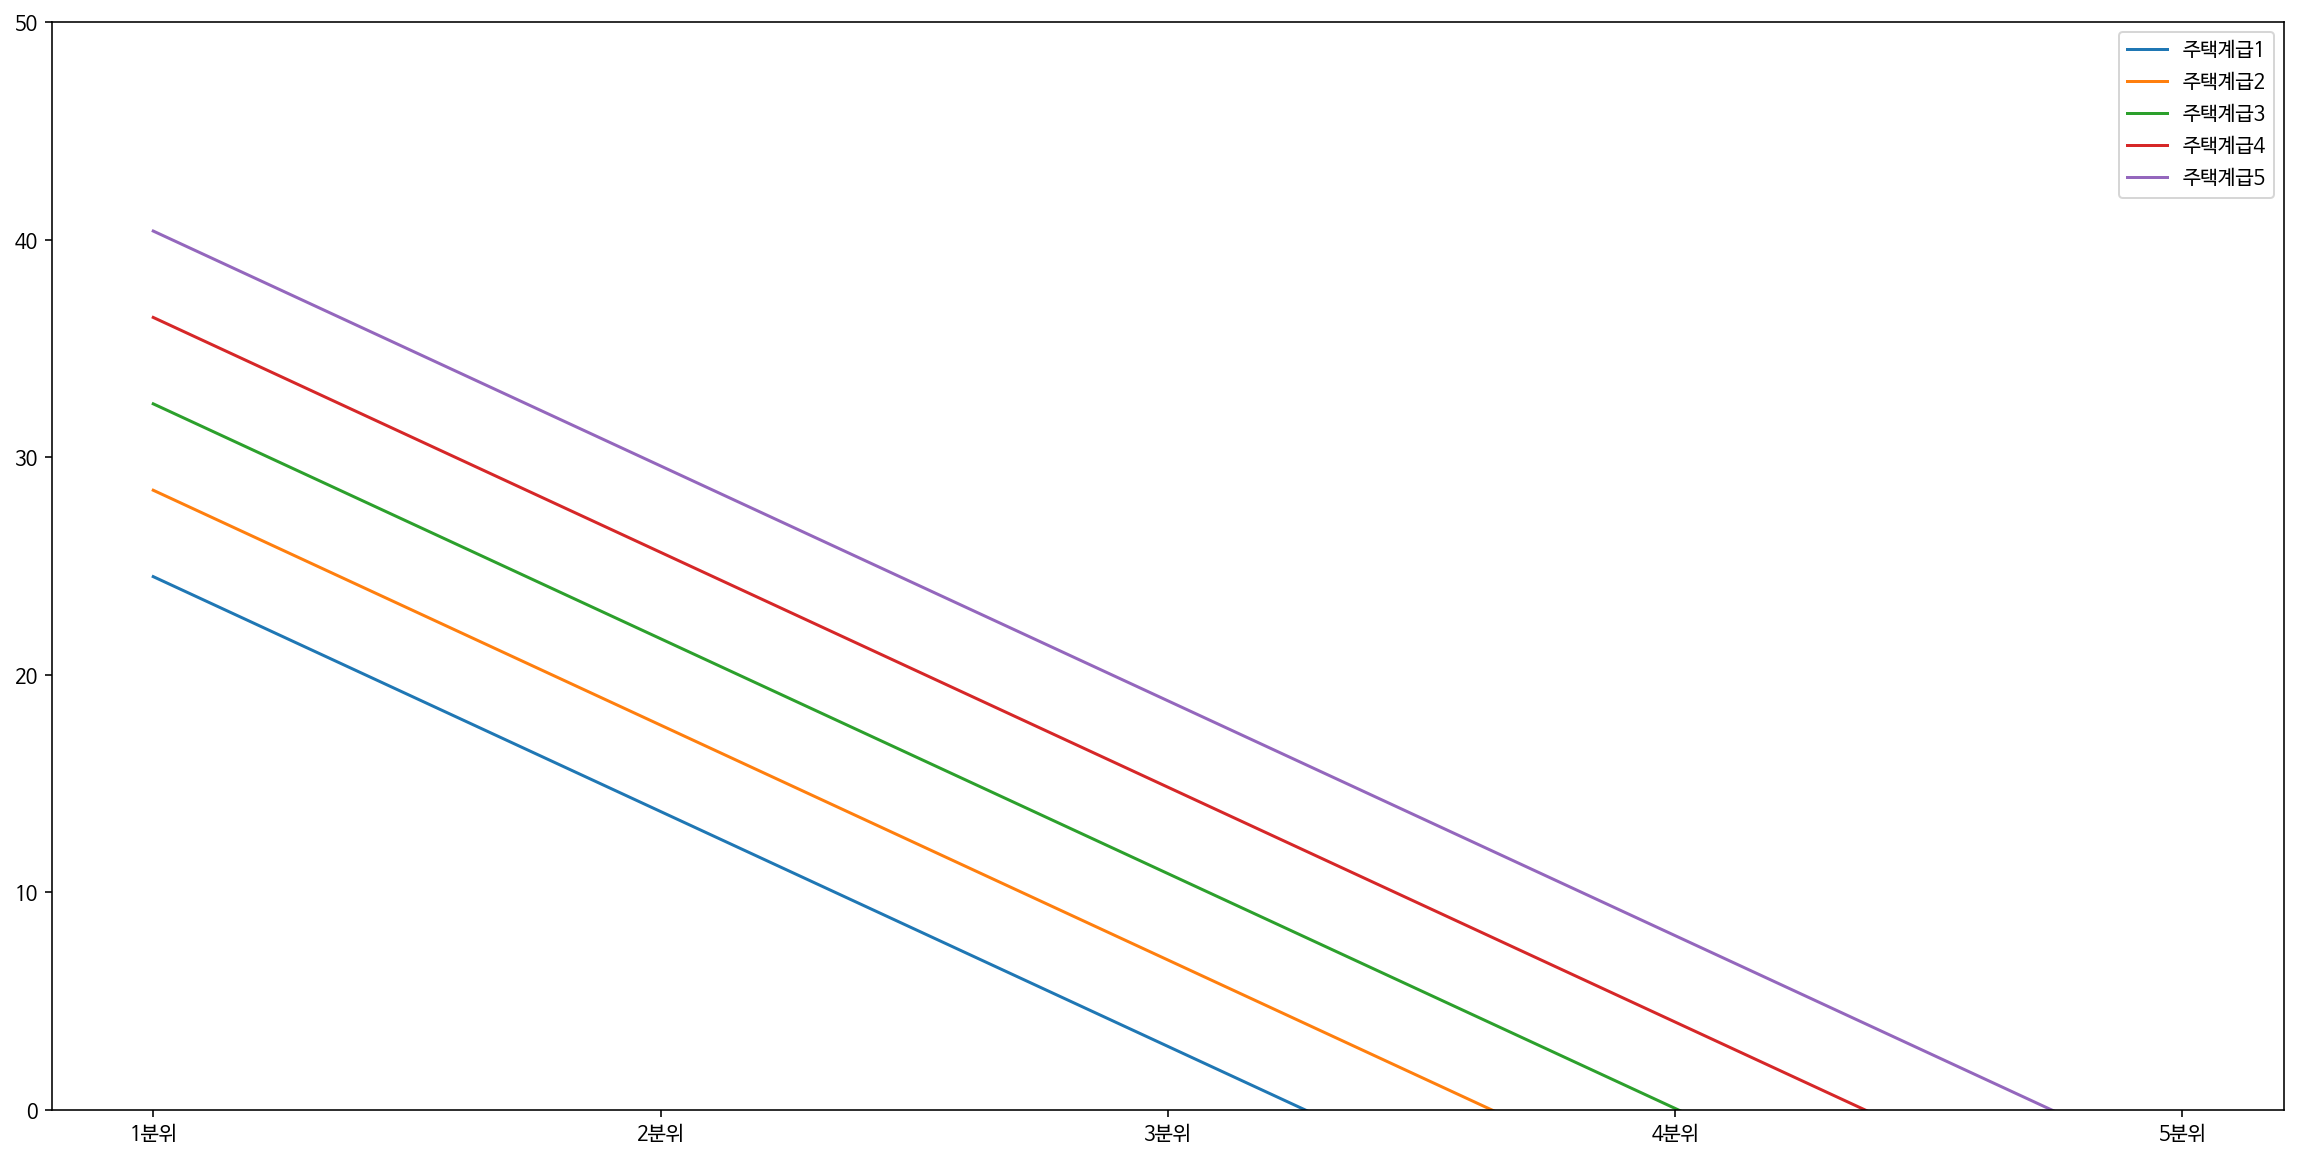

In [ ]:

# <소득분위에 따른 RIR의 변화>를 알아보기 위한 회귀식을 통한 예측치 확인(소득분위 및 주택계급만 변동)
from matplotlib import pyplot as plt

# 주택 계급에 따른 소득분위별 예측치(주택계급 1)
x_values2 = ['1분위', '2분위', '3분위', '4분위', '5분위']
house1 = model.predict([[1,1,1]])
house2 = model.predict([[1,2,1]])
house3 = model.predict([[1,3,1]])
house4 = model.predict([[1,4,1]])
house5 = model.predict([[1,5,1]])
house_values = [house1, house2, house3, house4, house5]

# 주택 계급에 따른 소득분위별 예측치(주택계급 2)
house6 = model.predict([[1,1,2]])
house7 = model.predict([[1,2,2]])
house8 = model.predict([[1,3,2]])
house9 = model.predict([[1,4,2]])
house10 = model.predict([[1,5,2]])
house_values2 = [house6, house7, house8, house9, house10]

# 주택 계급에 따른 소득분위별 예측치(주택계급 3)
house11 = model.predict([[1,1,3]])
house12 = model.predict([[1,2,3]])
house13 = model.predict([[1,3,3]])
house14 = model.predict([[1,4,3]])
house15 = model.predict([[1,5,3]])
house_values3 = [house11, house12, house13, house14, house15]

# 주택 계급에 따른 소득분위별 예측치(주택계급 4)
house16 = model.predict([[1,1,4]])
house17 = model.predict([[1,2,4]])
house18 = model.predict([[1,3,4]])
house19 = model.predict([[1,4,4]])
house20 = model.predict([[1,5,4]])
house_values4 = [house16, house17, house18, house19, house20]

# 주택 계급에 따른 소득분위별 예측치(주택계급 5)
house21 = model.predict([[1,1,5]])
house22 = model.predict([[1,2,5]])
house23 = model.predict([[1,3,5]])
house24 = model.predict([[1,4,5]])
house25 = model.predict([[1,5,5]])
house_values5 = [house21, house22, house23, house24, house25]

plt.figure(figsize=(20,10))
plt.ylim(0,50)
plt.plot(x_values2, house_values, label = '주택계급1')
plt.plot(x_values2, house_values2, label = '주택계급2')
plt.plot(x_values2, house_values3, label = '주택계급3')
plt.plot(x_values2, house_values4, label = '주택계급4')
plt.plot(x_values2, house_values5, label = '주택계급5')
plt.legend()
plt.show()

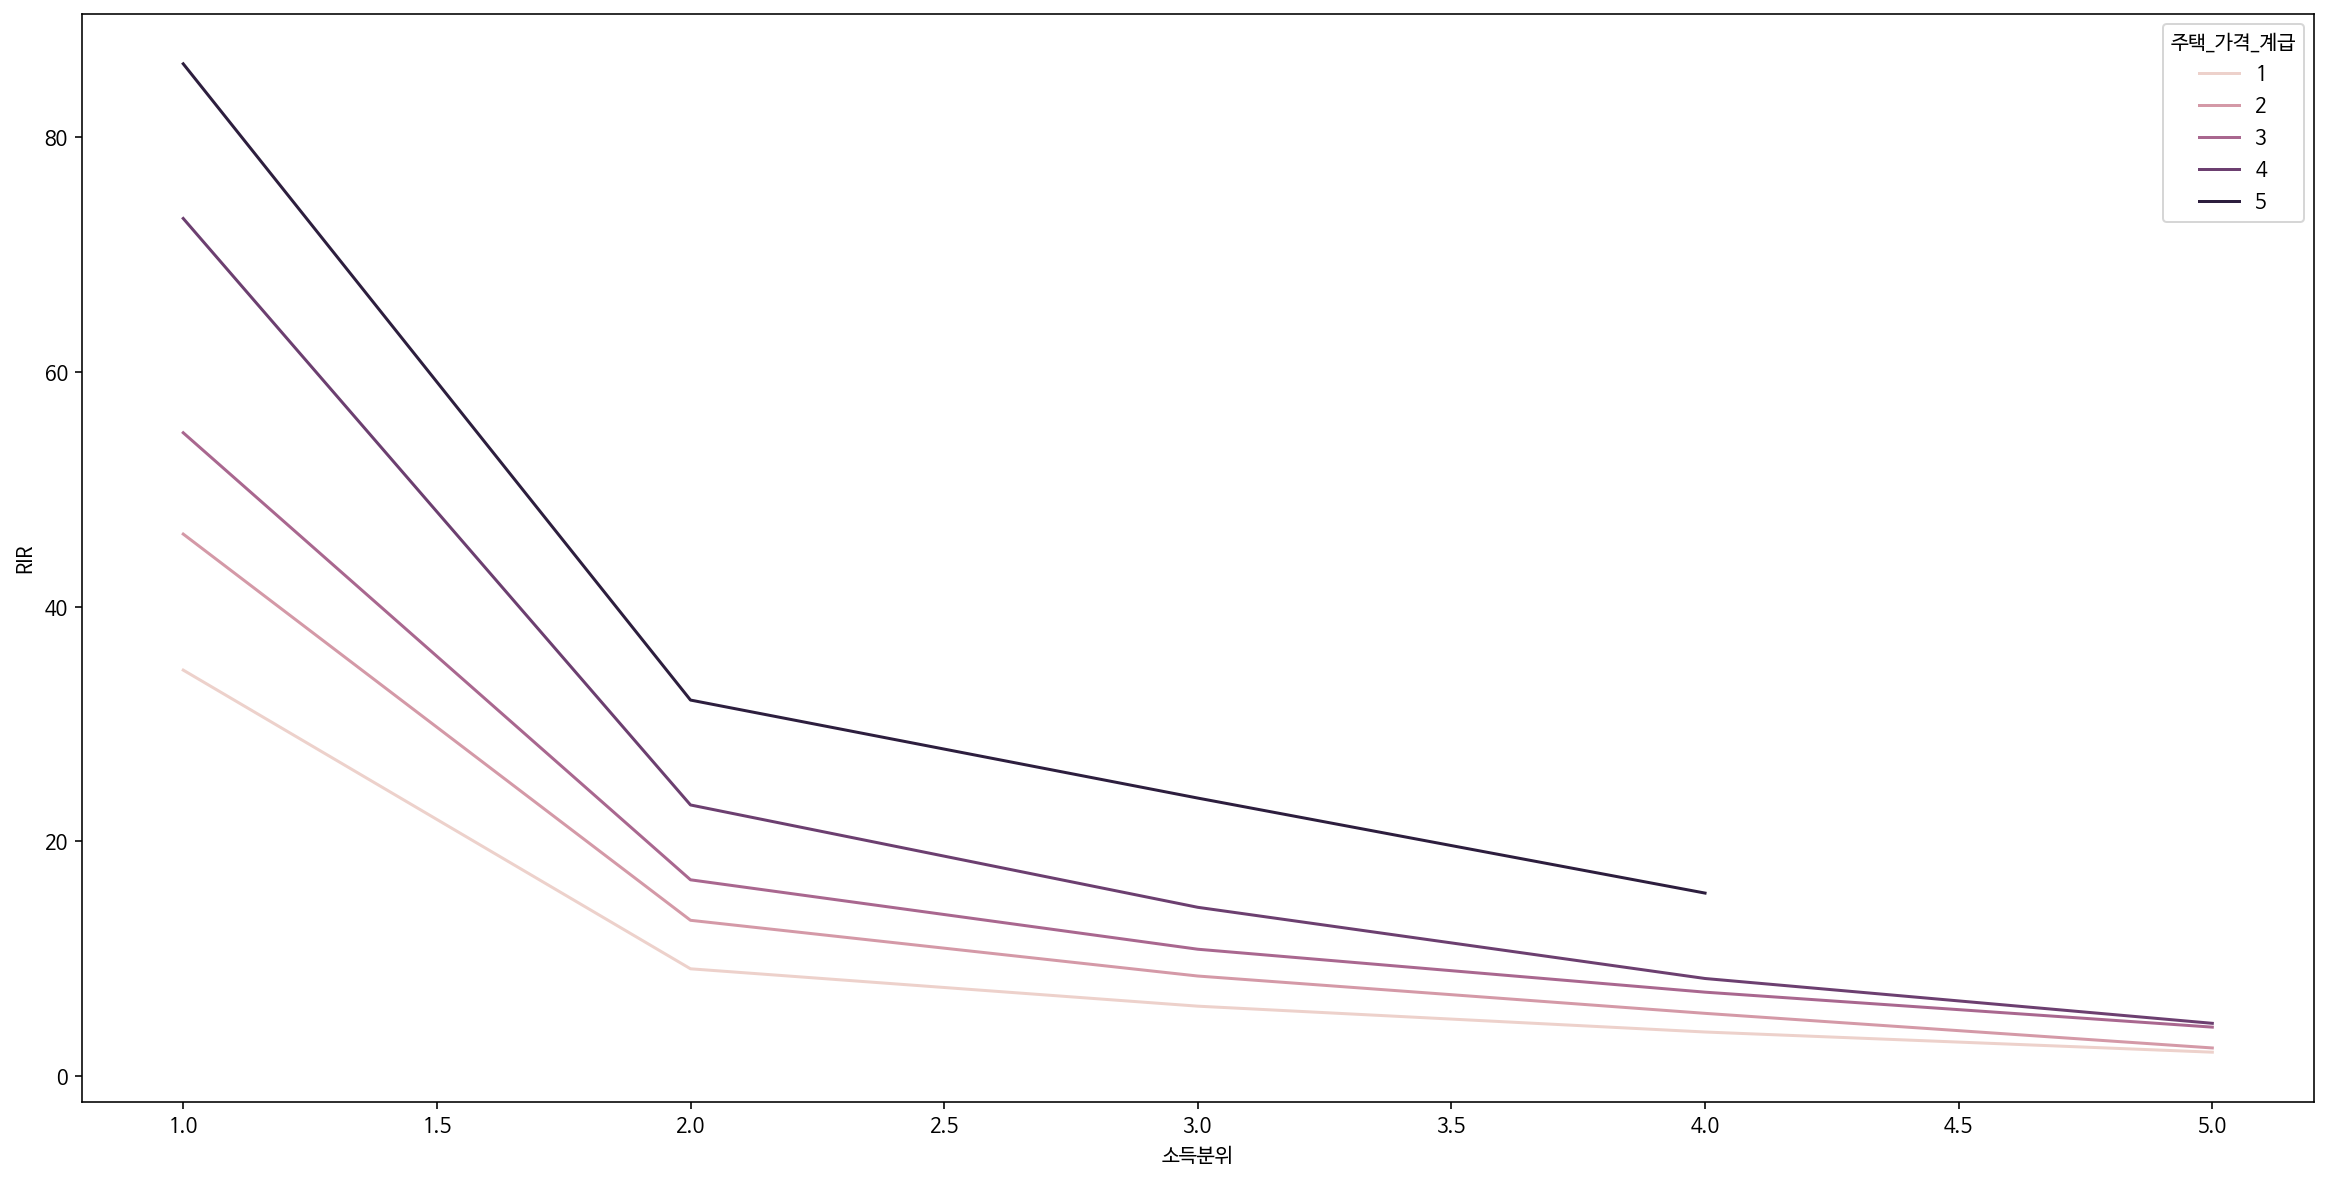

In [ ]:
# 꺾은선 그래프를 통한 주택 가격 계급에 따른 RIR 파악
plt.figure(figsize=(20,10))
sns.lineplot(x= '소득분위', y = 'RIR', hue = '주택_가격_계급', data = df_result, ci=None)

#3-1.데이터 전처리_청년전세자금 대출 평균 주거비용

In [ ]:
df_price = pd.read_csv('/content/drive/Shareddrives/data_festival/서울특별시_전월세가_정보_2020.csv', encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517502 entries, 0 to 517501
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지번코드     517502 non-null  object 
 1   기관코드     517502 non-null  int64  
 2   일련번호     517502 non-null  int64  
 3   접수년도     517502 non-null  int64  
 4   자치구코드    517502 non-null  int64  
 5   자치구명     517502 non-null  object 
 6   법정동코드    517502 non-null  int64  
 7   법정동명     517502 non-null  object 
 8   본번       362925 non-null  float64
 9   부번       362925 non-null  float64
 10  건물명      362949 non-null  object 
 11  층        360191 non-null  float64
 12  임대건물코드   514763 non-null  float64
 13  임대건물명    514763 non-null  object 
 14  임대면적     514763 non-null  float64
 15  전월세구분코드  514763 non-null  float64
 16  전월세구분    514763 non-null  object 
 17  보증금      514763 non-null  float64
 18  임대료      514763 non-null  float64
 19  계약년도     514763 non-null  float64
 20  계약일자     514763 non-null  

In [ ]:
df_price.shape

(517502, 22)

In [ ]:
#필요한 데이터 열만 추출
df_price = df_price.iloc[0:, [12, 13, 14, 15, 16, 17, 18]]
df_price.head()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
0,2.0,단독/다가구,78.0,4.0,준전세,15000.0,30.0
1,1.0,아파트,50.0,3.0,준월세,2000.0,150.0
2,1.0,아파트,59.0,1.0,전세,50000.0,0.0
3,4.0,다세대/연립,31.0,3.0,준월세,5000.0,100.0
4,1.0,아파트,84.0,1.0,전세,60000.0,0.0


In [ ]:
df_price.describe()

,임대건물코드,임대면적,전월세구분코드,보증금,임대료
count,514763.000000,514763.000000,514763.000000,514763.000000,514763.000000
mean,2.760698,50.922638,1.834953,21650.080458,21.938409
std,2.364404,29.517634,1.092737,24341.086208,41.300931
min,1.000000,6.000000,1.000000,0.000000,0.000000
25%,1.000000,28.000000,1.000000,4000.000000,0.000000
50%,2.000000,45.000000,1.000000,15000.000000,0.000000
75%,4.000000,66.000000,3.000000,30000.000000,40.000000
max,9.000000,360.000000,4.000000,490000.000000,3600.000000


In [ ]:
#임대건물코드에 따라 정렬
df_price = df_price.sort_values(by='임대건물코드')
df_price.head()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
517501,1.0,아파트,40.0,4.0,준전세,5552.0,13.0
163856,1.0,아파트,85.0,1.0,전세,53000.0,0.0
163857,1.0,아파트,30.0,1.0,전세,26500.0,0.0
370041,1.0,아파트,85.0,1.0,전세,50000.0,0.0
370040,1.0,아파트,85.0,1.0,전세,42500.0,0.0


In [ ]:
#임대면적 조건 설정
df_price = df_price.loc[(df_price['임대면적'] >= 16.0) & (df_price['임대면적'] <= 29.0)]
df_price.head()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
370146,1.0,아파트,17.0,1.0,전세,16590.0,0.0
370144,1.0,아파트,17.0,1.0,전세,16590.0,0.0
164100,1.0,아파트,24.0,1.0,전세,23000.0,0.0
369793,1.0,아파트,28.0,1.0,전세,43000.0,0.0
369789,1.0,아파트,28.0,4.0,준전세,43000.0,10.0


In [ ]:
#전세인 데이터만 남기기
df_price = df_price.loc[df_price['전월세구분코드'] == 1.0]
df_price.head()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
370146,1.0,아파트,17.0,1.0,전세,16590.0,0.0
370144,1.0,아파트,17.0,1.0,전세,16590.0,0.0
164100,1.0,아파트,24.0,1.0,전세,23000.0,0.0
369793,1.0,아파트,28.0,1.0,전세,43000.0,0.0
369996,1.0,아파트,21.0,1.0,전세,20000.0,0.0


In [ ]:
#전세자금 대출 조건 설정 (보증금 4억원 이하만 대출 가능)
df_price = df_price.loc[(df_price['보증금'] < 40000.0)]
df_price.head()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
370146,1.0,아파트,17.0,1.0,전세,16590.0,0.0
370144,1.0,아파트,17.0,1.0,전세,16590.0,0.0
164100,1.0,아파트,24.0,1.0,전세,23000.0,0.0
369996,1.0,아파트,21.0,1.0,전세,20000.0,0.0
163563,1.0,아파트,28.0,1.0,전세,35000.0,0.0


In [ ]:
#건물별 전세금 평균 구하기
df_price.groupby('임대건물명')['보증금'].mean()

임대건물명
다세대/연립    20080.755445
단독/다가구     8782.046579
아파트       20583.017159
오피스텔      16441.822260
Name: 보증금, dtype: float64

In [ ]:
#조건에 맞는 대상들의 월평균주거관리비의 평균을 도출(서울 거주 청년 1인가구)
expenses = df_rir[(df_rir['점유형태'] != 1) & (df_rir['지역'] == 11) & (df_rir['가구원 수'] == 1) & (df_rir['나이'] >= 19) & (df_rir['나이'] <= 34)]['월평균주거관리비'].mean()
expenses

8.634453781512605

In [ ]:
#월 소득 합 데이터만 추출해서 저장
df_rir_2 = df_rir['월 소득 합'].copy()
df_rir_2 = df_rir_2.reset_index()
df_rir_2 = df_rir_2.drop(['index'], axis=1)

In [ ]:
df_rir_2.describe()

,월 소득 합
count,476.000000
mean,234.153361
std,104.278996
min,20.000000
25%,200.000000
50%,230.000000
75%,280.000000
max,920.000000


In [ ]:
#월 소득 합 데이터 랜덤 추출
import random
for i in range(476, 58471):
  data_to_insert = {'월 소득 합':random.randrange(20, 920)}
  df_rir_2 = df_rir_2.append(data_to_insert, ignore_index=True)
df_rir_2.tail()

,월 소득 합
116461,894
116462,233
116463,287
116464,868
116465,837


In [ ]:
#df_price 데이터 복사후에 인덱싱 다시하기
df_price_2 = df_price.copy()
df_price_2 = df_price_2.reset_index()
df_price_2 = df_price_2.drop(['index'], axis=1)

In [ ]:
df_price_2.tail()

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료
58466,9.0,오피스텔,28.0,1.0,전세,24000.0,0.0
58467,9.0,오피스텔,24.0,1.0,전세,12600.0,0.0
58468,9.0,오피스텔,25.0,1.0,전세,17850.0,0.0
58469,9.0,오피스텔,18.0,1.0,전세,7500.0,0.0
58470,9.0,오피스텔,18.0,1.0,전세,19400.0,0.0


In [ ]:
#데이터 합치기
df_price_2['월 소득 합'] = df_rir_2['월 소득 합']
df_price_2

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합
0,1.0,아파트,17.0,1.0,전세,16590.0,0.0,250
1,1.0,아파트,17.0,1.0,전세,16590.0,0.0,200
2,1.0,아파트,24.0,1.0,전세,23000.0,0.0,500
3,1.0,아파트,21.0,1.0,전세,20000.0,0.0,250
4,1.0,아파트,28.0,1.0,전세,35000.0,0.0,200
...,...,...,...,...,...,...,...,...
58466,9.0,오피스텔,28.0,1.0,전세,24000.0,0.0,759
58467,9.0,오피스텔,24.0,1.0,전세,12600.0,0.0,259
58468,9.0,오피스텔,25.0,1.0,전세,17850.0,0.0,52
58469,9.0,오피스텔,18.0,1.0,전세,7500.0,0.0,313


In [ ]:
#rir 계산해서 열에 추가하기
#평균 대출 금리 3.0% 적용, 보증금의 최대 90%까지 대출 가능
df_price_2['rir'] = round(((df_price_2['보증금'] * 0.9 * 0.03 / 12) / df_price_2['월 소득 합'] * 100), 2)
df_price_2

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir
0,1.0,아파트,17.0,1.0,전세,16590.0,0.0,250,14.93
1,1.0,아파트,17.0,1.0,전세,16590.0,0.0,200,18.66
2,1.0,아파트,24.0,1.0,전세,23000.0,0.0,500,10.35
3,1.0,아파트,21.0,1.0,전세,20000.0,0.0,250,18.00
4,1.0,아파트,28.0,1.0,전세,35000.0,0.0,200,39.38
...,...,...,...,...,...,...,...,...,...
58466,9.0,오피스텔,28.0,1.0,전세,24000.0,0.0,759,7.11
58467,9.0,오피스텔,24.0,1.0,전세,12600.0,0.0,259,10.95
58468,9.0,오피스텔,25.0,1.0,전세,17850.0,0.0,52,77.24
58469,9.0,오피스텔,18.0,1.0,전세,7500.0,0.0,313,5.39


In [ ]:
#소득분위 구간 나누어서 열에 추가하기
df_price_2['소득분위'] = ""
for i in range(0,58471):
  if df_price_2['월 소득 합'].iloc[i] <= 86:
    df_price_2['소득분위'].iloc[i] = 1
  elif 86 < df_price_2['월 소득 합'].iloc[i] <= 222:
    df_price_2['소득분위'].iloc[i] = 2
  elif 222 < df_price_2['월 소득 합'].iloc[i] <= 378:
    df_price_2['소득분위'].iloc[i] = 3
  elif 378 < df_price_2['월 소득 합'].iloc[i] <= 570:
    df_price_2['소득분위'].iloc[i] = 4 
  else:
    df_price_2['소득분위'].iloc[i] = 5
df_price_2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir,소득분위
0,1.0,아파트,17.0,1.0,전세,16590.0,0.0,250,14.93,3
1,1.0,아파트,17.0,1.0,전세,16590.0,0.0,200,18.66,2
2,1.0,아파트,24.0,1.0,전세,23000.0,0.0,500,10.35,4
3,1.0,아파트,21.0,1.0,전세,20000.0,0.0,250,18.00,3
4,1.0,아파트,28.0,1.0,전세,35000.0,0.0,200,39.38,2
...,...,...,...,...,...,...,...,...,...,...
58466,9.0,오피스텔,28.0,1.0,전세,24000.0,0.0,759,7.11,5
58467,9.0,오피스텔,24.0,1.0,전세,12600.0,0.0,259,10.95,3
58468,9.0,오피스텔,25.0,1.0,전세,17850.0,0.0,52,77.24,1
58469,9.0,오피스텔,18.0,1.0,전세,7500.0,0.0,313,5.39,3


In [ ]:
df_price_2.groupby('소득분위')['rir'].mean()

소득분위
1    77.569116
2    23.932221
3    11.841619
4     7.401456
5     4.719609
Name: rir, dtype: float64

In [ ]:
#데이터 프레임 복사
df_price_3 = df_price_2.copy()

In [ ]:
#가격 계급을 quantile 함수를 통해 5단계로 나누기
df_price_3['가격 계급'] = df_price_3['소득분위']
for i in range(0,58471):
  if df_price_3['보증금'].iloc[i] <= df_price_3['보증금'].quantile(q=0.2, interpolation='nearest'):
    df_price_3['가격 계급'].iloc[i] = 1
  elif df_price_3['보증금'].quantile(q=0.2, interpolation='nearest') < df_price_3['보증금'].iloc[i] <= df_price_3['보증금'].quantile(q=0.4, interpolation='nearest'):
    df_price_3['가격 계급'].iloc[i] = 2
  elif df_price_3['보증금'].quantile(q=0.4, interpolation='nearest') < df_price_3['보증금'].iloc[i] <= df_price_3['보증금'].quantile(q=0.6, interpolation='nearest'):
    df_price_3['가격 계급'].iloc[i] = 3
  elif df_price_3['보증금'].quantile(q=0.6, interpolation='nearest') < df_price_3['보증금'].iloc[i] <= df_price_3['보증금'].quantile(q=0.8, interpolation='nearest'):
    df_price_3['가격 계급'].iloc[i] = 4
  else:
    df_price_3['가격 계급'].iloc[i] = 5
df_price_3.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Index(['임대건물코드', '임대건물명', '임대면적', '전월세구분코드', '전월세구분', '보증금', '임대료', '월 소득 합',
       'rir', '소득분위', '가격 계급'],
      dtype='object')

In [ ]:
#전세대출을 이용한 사람의 데이터들에 전세대출이용여부를 1을 부여
df_price_3['전세대출이용여부'] = 1

In [ ]:
import random
#1번데이터에서 데이터프레임을 복사한 후에 필요없는 열을 삭제
df_append = df_rir.copy()
df_append = df_append.drop(['지역', '임차료_월세', '나이', '가구원 수', '월근로소득', '월재산소득', '월사회보험수혜금', '월정부보조금',
                            '월사적이전소득', '월경상소득', '월비경상소득', '월평균주거관리비', '전세보증금_월세전환', '월주거비'], axis='columns')
df_append = df_append.loc[(df_append['주택유형'] == 1) | (df_append['주택유형'] == 2) | (df_append['주택유형'] == 4) | 
                          (df_append['주택유형'] == 5) | (df_append['주택유형'] == 6) | (df_append['주택유형'] == 8)]
df_append['임대건물명'] =''

#데이터프레임을 합치기 위해 열 이름을 동일하게 변경하고 전세인 데이터만 남긴 후, 자료형과 열 순서를 변경함
df_append.rename(columns={'주택유형':'임대건물코드', '임차료_전세보증금':'보증금', '점유형태':'전월세구분코드', '면적':'임대면적',
                          'RIR':'rir'}, inplace=True)
df_append = df_append[(df_append['전월세구분코드'] == 2)]
df_append['임대면적'] = round(df_append['임대면적'], 1)
df_append['전월세구분'] = '전세'
df_append['전월세구분코드'] = 1.0
df_append['임대건물코드'] = df_append['임대건물코드'].astype('float')
df_append = df_append.reset_index()
df_append = df_append.drop(['index'], axis='columns')
df_append=df_append[['임대건물코드', '임대건물명', '임대면적', '전월세구분코드', '전월세구분', '보증금', '월 소득 합', 'rir']]

#건물유형별로 임대건물명과 임대건물코드를 지정
for i in range(0, 158):
  if (df_append['임대건물코드'].iloc[i] == 1.0) | (df_append['임대건물코드'].iloc[i] == 2.0):
    df_append['임대건물명'].iloc[i] = '단독/다가구'
    df_append['임대건물코드'].iloc[i] = 2.0
  elif (df_append['임대건물코드'].iloc[i] == 4.0):
    df_append['임대건물명'].iloc[i] = '아파트'
    df_append['임대건물코드'].iloc[i] = 1.0
  elif (df_append['임대건물코드'].iloc[i] == 5.0) | (df_append['임대건물코드'].iloc[i] == 6.0):
    df_append['임대건물명'].iloc[i] = '다세대/연립'
    df_append['임대건물코드'].iloc[i] = 4.0
  else:
    df_append['임대건물명'].iloc[i] = '오피스텔'
    df_append['임대건물코드'].iloc[i] = 9.0

df_append = df_append.sort_values(by='임대건물코드')
df_append = df_append.reset_index()
df_append = df_append.drop(['index'], axis='columns')

#소득분위를 5단계로 나누어서 저장
df_append['임대료'] = 0.0
df_append['소득분위'] = ""
for i in range(0,158):
  if df_append['월 소득 합'].iloc[i] <= 86:
    df_append['소득분위'].iloc[i] = 1
  elif 86 < df_append['월 소득 합'].iloc[i] <= 222:
    df_append['소득분위'].iloc[i] = 2
  elif 222 < df_append['월 소득 합'].iloc[i] <= 378:
    df_append['소득분위'].iloc[i] = 3
  elif 378 < df_append['월 소득 합'].iloc[i] <= 570:
    df_append['소득분위'].iloc[i] = 4    
  else:
    df_append['소득분위'].iloc[i] = 5

#가격 계급을 quantile 함수를 사용하여 5단계로 나눔
df_append['가격 계급'] = df_append['소득분위']
for i in range(0,158):
  if df_append['보증금'].iloc[i] <= df_append['보증금'].quantile(q=0.2, interpolation='nearest'):
    df_append['가격 계급'].iloc[i] = 1
  elif df_append['보증금'].quantile(q=0.2, interpolation='nearest') < df_append['보증금'].iloc[i] <= df_append['보증금'].quantile(q=0.4, interpolation='nearest'):
    df_append['가격 계급'].iloc[i] = 2
  elif df_append['보증금'].quantile(q=0.4, interpolation='nearest') < df_append['보증금'].iloc[i] <= df_append['보증금'].quantile(q=0.6, interpolation='nearest'):
    df_append['가격 계급'].iloc[i] = 3
  elif df_append['보증금'].quantile(q=0.6, interpolation='nearest') < df_append['보증금'].iloc[i] <= df_append['보증금'].quantile(q=0.8, interpolation='nearest'):
    df_append['가격 계급'].iloc[i] = 4
  else:
    df_append['가격 계급'].iloc[i] = 5

#열 순서 재배열 후 비어있는 행 리스트를 만듦
df_append = df_append[['임대건물코드', '임대건물명', '임대면적', '전월세구분코드', '전월세구분', '보증금', '임대료', '월 소득 합',
       'rir', '소득분위', '가격 계급']]
df_to_insert = {'임대건물코드':[], '임대건물명':[], '임대면적':[], '전월세구분코드':[], '전월세구분':[], '보증금':[], 
                  '임대료':[], '월 소득 합':[], 'rir':[], '소득분위':[], '가격 계급':[]}

#158개의 데이터를 통계적으로 유의미할 수 있도록 df_price_3와 같이 행개수를 58471개로 만듦
for i in range(158, 58471):
  df_append = df_append.append(df_to_insert, ignore_index=True)
  df_append.iloc[i] = df_append.iloc[i - 158]
df_append['전세대출이용여부'] = 0
df_append

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir,소득분위,가격 계급,전세대출이용여부
0,1,아파트,46.3,1,전세,17500,0,200,50.5,2,4,0
1,1,아파트,29.8,1,전세,20000,0,250,46.7,3,5,0
2,1,아파트,52.9,1,전세,23000,0,400,33,4,5,0
3,1,아파트,59.8,1,전세,33000,0,200,91.9,2,5,0
4,1,아파트,86,1,전세,35000,0,200,95,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58466,1,아파트,86,1,전세,55000,0,450,67.5,4,5,0
58467,1,아파트,46.3,1,전세,21000,0,350,34.2,3,5,0
58468,1,아파트,46.3,1,전세,16000,0,300,30.1,3,4,0
58469,1,아파트,32.4,1,전세,10500,0,180,34.7,2,3,0


In [ ]:
#자료형을 df_price_3의 데이터와 동일하게 변경
df_append['임대건물코드'] = df_append['임대건물코드'].astype('float')
df_append['전월세구분코드'] = df_append['전월세구분코드'].astype('float')
df_append['임대료'] = df_append['임대료'].astype('float')
df_append

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir,소득분위,가격 계급,전세대출이용여부
0,1.0,아파트,46.3,1.0,전세,17500,0.0,200,50.5,2,4,0
1,1.0,아파트,29.8,1.0,전세,20000,0.0,250,46.7,3,5,0
2,1.0,아파트,52.9,1.0,전세,23000,0.0,400,33,4,5,0
3,1.0,아파트,59.8,1.0,전세,33000,0.0,200,91.9,2,5,0
4,1.0,아파트,86,1.0,전세,35000,0.0,200,95,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58466,1.0,아파트,86,1.0,전세,55000,0.0,450,67.5,4,5,0
58467,1.0,아파트,46.3,1.0,전세,21000,0.0,350,34.2,3,5,0
58468,1.0,아파트,46.3,1.0,전세,16000,0.0,300,30.1,3,4,0
58469,1.0,아파트,32.4,1.0,전세,10500,0.0,180,34.7,2,3,0


In [ ]:
#df_price_3와 df_append 데이터프레임을 합쳐 df_total 데이터프레임을 만들고 인덱스를 임대건물코드에 따라 재배열
df_total = pd.concat([df_price_3, df_append])
df_total = df_total.sort_values(by='임대건물코드')
df_total = df_total.reset_index()
df_total = df_total.drop(['index'], axis='columns')
df_total

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir,소득분위,가격 계급,전세대출이용여부
0,1.0,아파트,17,1.0,전세,16590,0.0,250,14.93,3,3,1
1,1.0,아파트,59.8,1.0,전세,33000,0.0,200,91.9,2,5,0
2,1.0,아파트,86,1.0,전세,35000,0.0,200,95,2,5,0
3,1.0,아파트,14.2,1.0,전세,12000,0.0,230,33.5,3,3,0
4,1.0,아파트,86,1.0,전세,55000,0.0,450,67.5,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
116937,9.0,오피스텔,19,1.0,전세,18600,0.0,881,4.75,5,4,1
116938,9.0,오피스텔,18,1.0,전세,19530,0.0,544,8.08,4,4,1
116939,9.0,오피스텔,24,1.0,전세,21000,0.0,846,5.59,5,4,1
116940,9.0,오피스텔,13.2,1.0,전세,9000,0.0,270,19.2,3,2,0


In [ ]:
df_total['아파트'] = 0
df_total['단독/다가구'] = 0
df_total['다세대/연립'] = 0
df_total['오피스텔'] = 0

for i in range(0, 116942):
  if df_total['임대건물코드'].iloc[i] == 1.0:
    df_total['아파트'].iloc[i] = 1
  elif df_total['임대건물코드'].iloc[i] == 2.0:
    df_total['단독/다가구'].iloc[i] = 1
  elif df_total['임대건물코드'].iloc[i] == 4.0:
    df_total['다세대/연립'].iloc[i] = 1
  elif df_total['임대건물코드'].iloc[i] == 9.0:
    df_total['오피스텔'].iloc[i] = 1  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df_total

,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,월 소득 합,rir,소득분위,가격 계급,전세대출이용여부,아파트,단독/다가구,다세대/연립,오피스텔
0,1.0,아파트,17,1.0,전세,16590,0.0,250,14.93,3,3,1,1,0,0,0
1,1.0,아파트,59.8,1.0,전세,33000,0.0,200,91.9,2,5,0,1,0,0,0
2,1.0,아파트,86,1.0,전세,35000,0.0,200,95,2,5,0,1,0,0,0
3,1.0,아파트,14.2,1.0,전세,12000,0.0,230,33.5,3,3,0,1,0,0,0
4,1.0,아파트,86,1.0,전세,55000,0.0,450,67.5,4,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116937,9.0,오피스텔,19,1.0,전세,18600,0.0,881,4.75,5,4,1,0,0,0,1
116938,9.0,오피스텔,18,1.0,전세,19530,0.0,544,8.08,4,4,1,0,0,0,1
116939,9.0,오피스텔,24,1.0,전세,21000,0.0,846,5.59,5,4,1,0,0,0,1
116940,9.0,오피스텔,13.2,1.0,전세,9000,0.0,270,19.2,3,2,0,0,0,0,1


# 3-2.전세대출제도 RIR 회귀분석 및 시각화

In [ ]:
#회귀분석을 위한 목푯값(Labels)와 변수(features) 지정
labels3 = df_total['rir']
features3 = df_total[['전세대출이용여부', '소득분위', '가격 계급', '아파트', '단독/다가구', '다세대/연립', '오피스텔']]


In [ ]:
#회귀분석을 위한 목푯값(Labels)와 변수(features) 지정
labels4 = df_total['rir']
features4 = df_total[['전세대출이용여부', '소득분위', '가격 계급']]

In [ ]:
# <전세대출이용여부, 소득분위, 가격 계급에 따른 rir의 변화>를 알아보기 위한 회귀식
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model4 = LinearRegression()
model4.fit(features4, labels4)
print(model4.intercept_, model4.coef_)

48.39883983216181 [ -6.13940441 -12.91309427   6.80048645]


rir_rent(전세대출이용 rir)=48.64380901858141 **-5.85167279 X 전세대출 이용 여부 -13.02426082 X소득분위   + 6.82113051 X 가격계급**

In [ ]:
# OLS회귀분석을 통한 분석확인
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
x_data4 = df_total[['전세대출이용여부', '소득분위', '가격 계급']]
target4 = df_total[['rir']]

multi_model4 = sm.OLS(target4.astype(float), x_data4.astype(float))
fitted_multi_model4 = multi_model4.fit()
fitted_multi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    rir   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                          4.939e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:58:13   Log-Likelihood:                     -5.3462e+05
No. Observations:              116942   AIC:                                  1.069e+06
Df Residuals:                  116939   BIC:                                  1.069e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전세대출이용여부      -7.4075      0.150    -49.475      0.000      -7.701      -7.114
소득분위          -3.6473      0.046    -79.088      0.000      -3.738      -3.557
가격 계급         12.0893      0.042    290.272      0.000      12.008      12.171
==============================================================================
Omnibus:                   100801.872   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4440691.846
Skew:                           3.986   Prob(JB):                         0.00
Kurtosis:                      32.117   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

전세대출 제도 이용 여부, 소득분위, 주택가격계급 모두 p-value가 0.05 미만이므로 **통계적으로 유의미**하다고 할 수 있다.

R-스퀘어의 경우, 0.559로 **모델이 변수를 설명하는데 적합**하다고 할 수 있다.

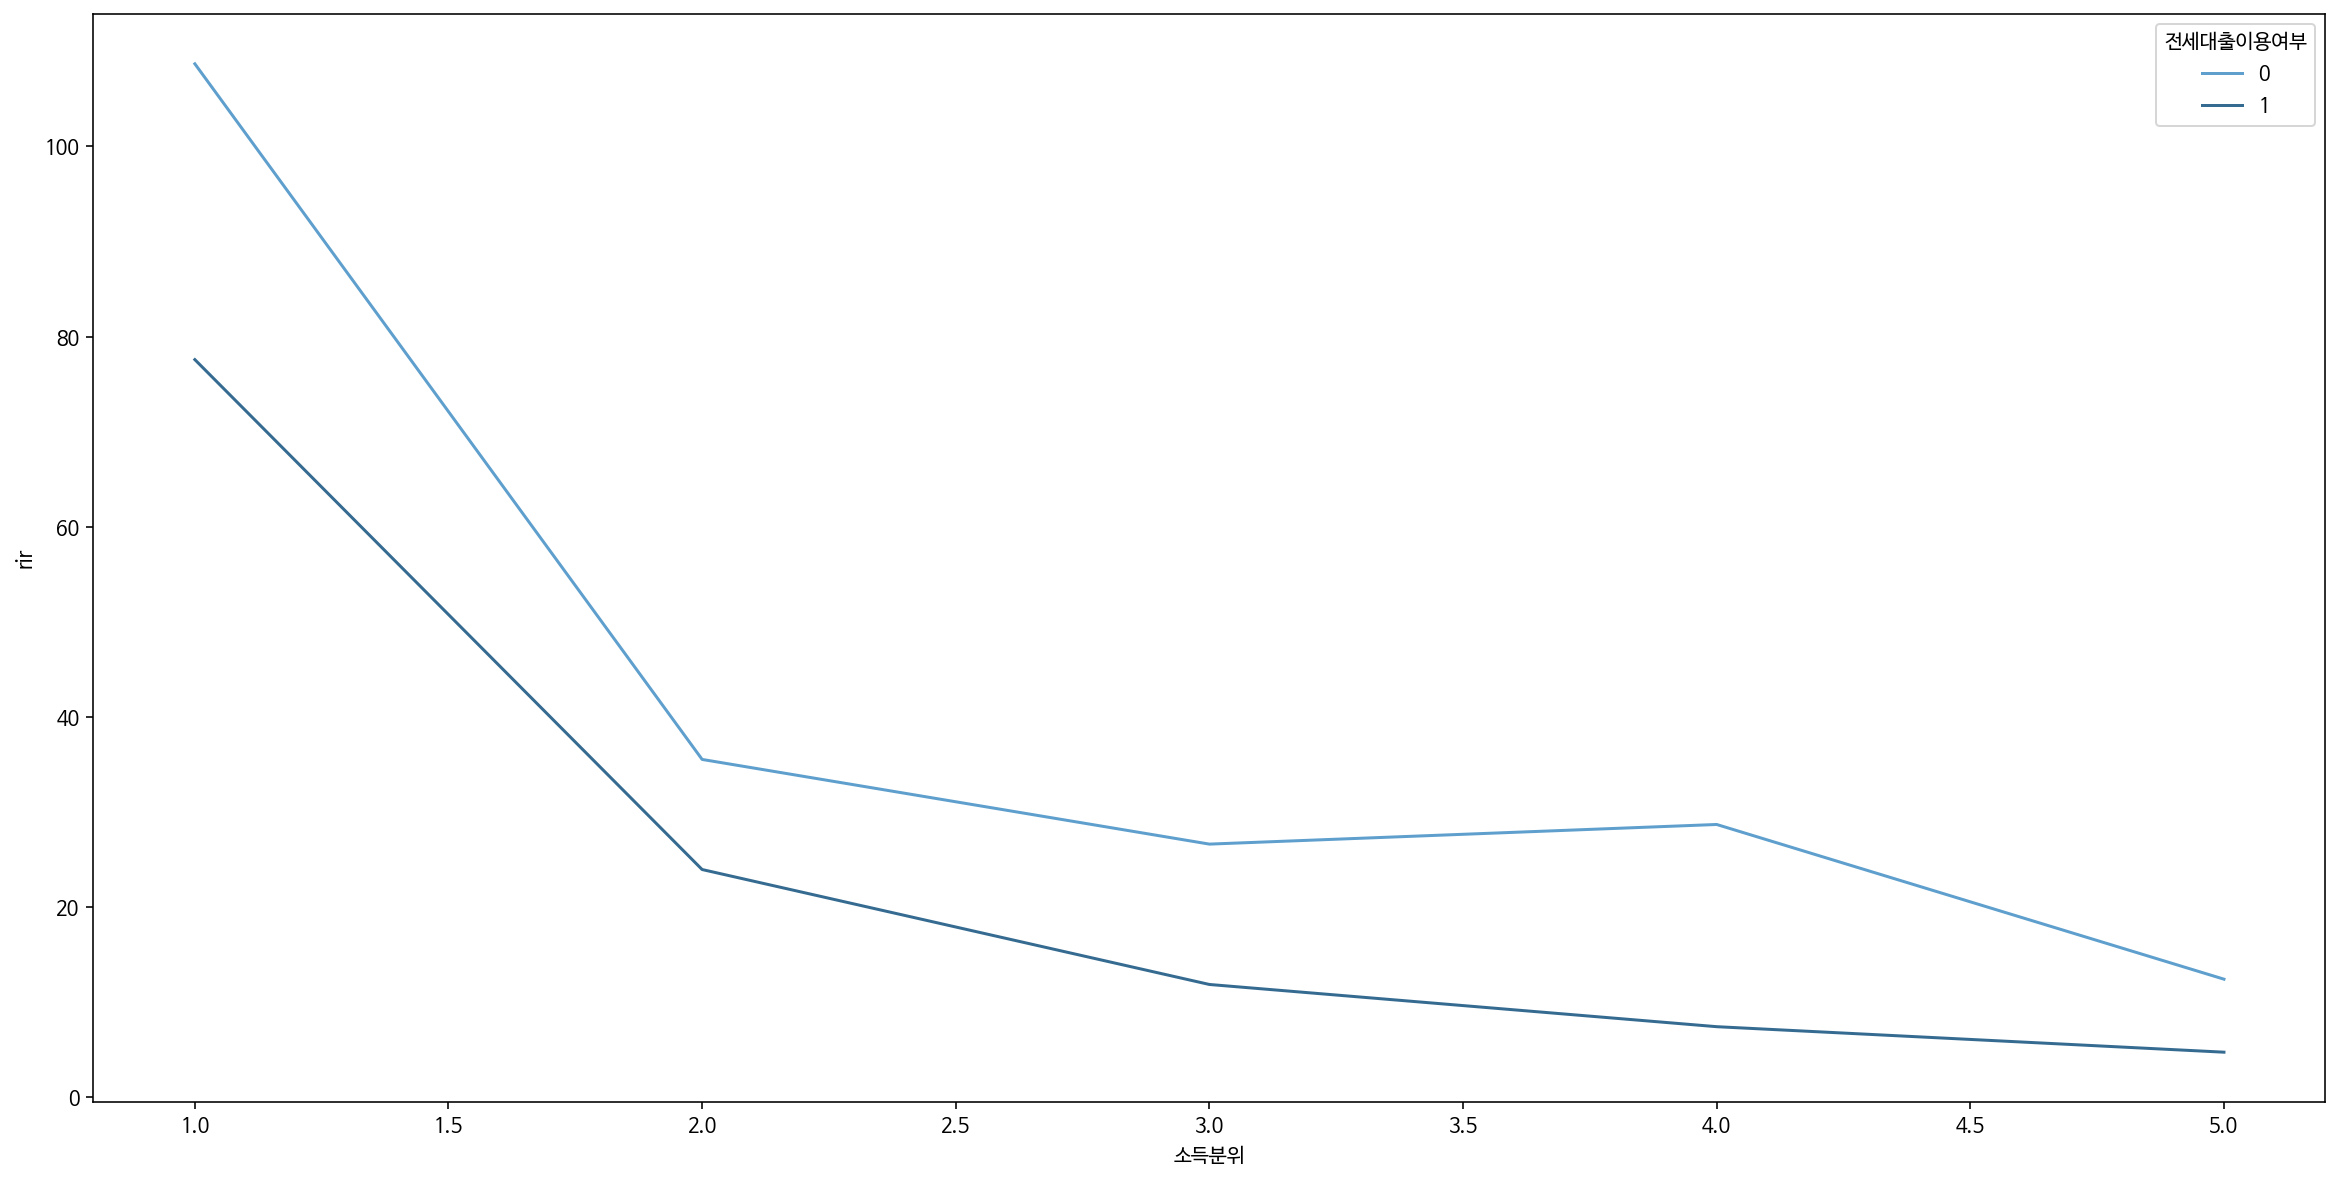

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x= '소득분위', y = 'rir', hue = '전세대출이용여부', data = df_total, ci=None, palette='Blues_d')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

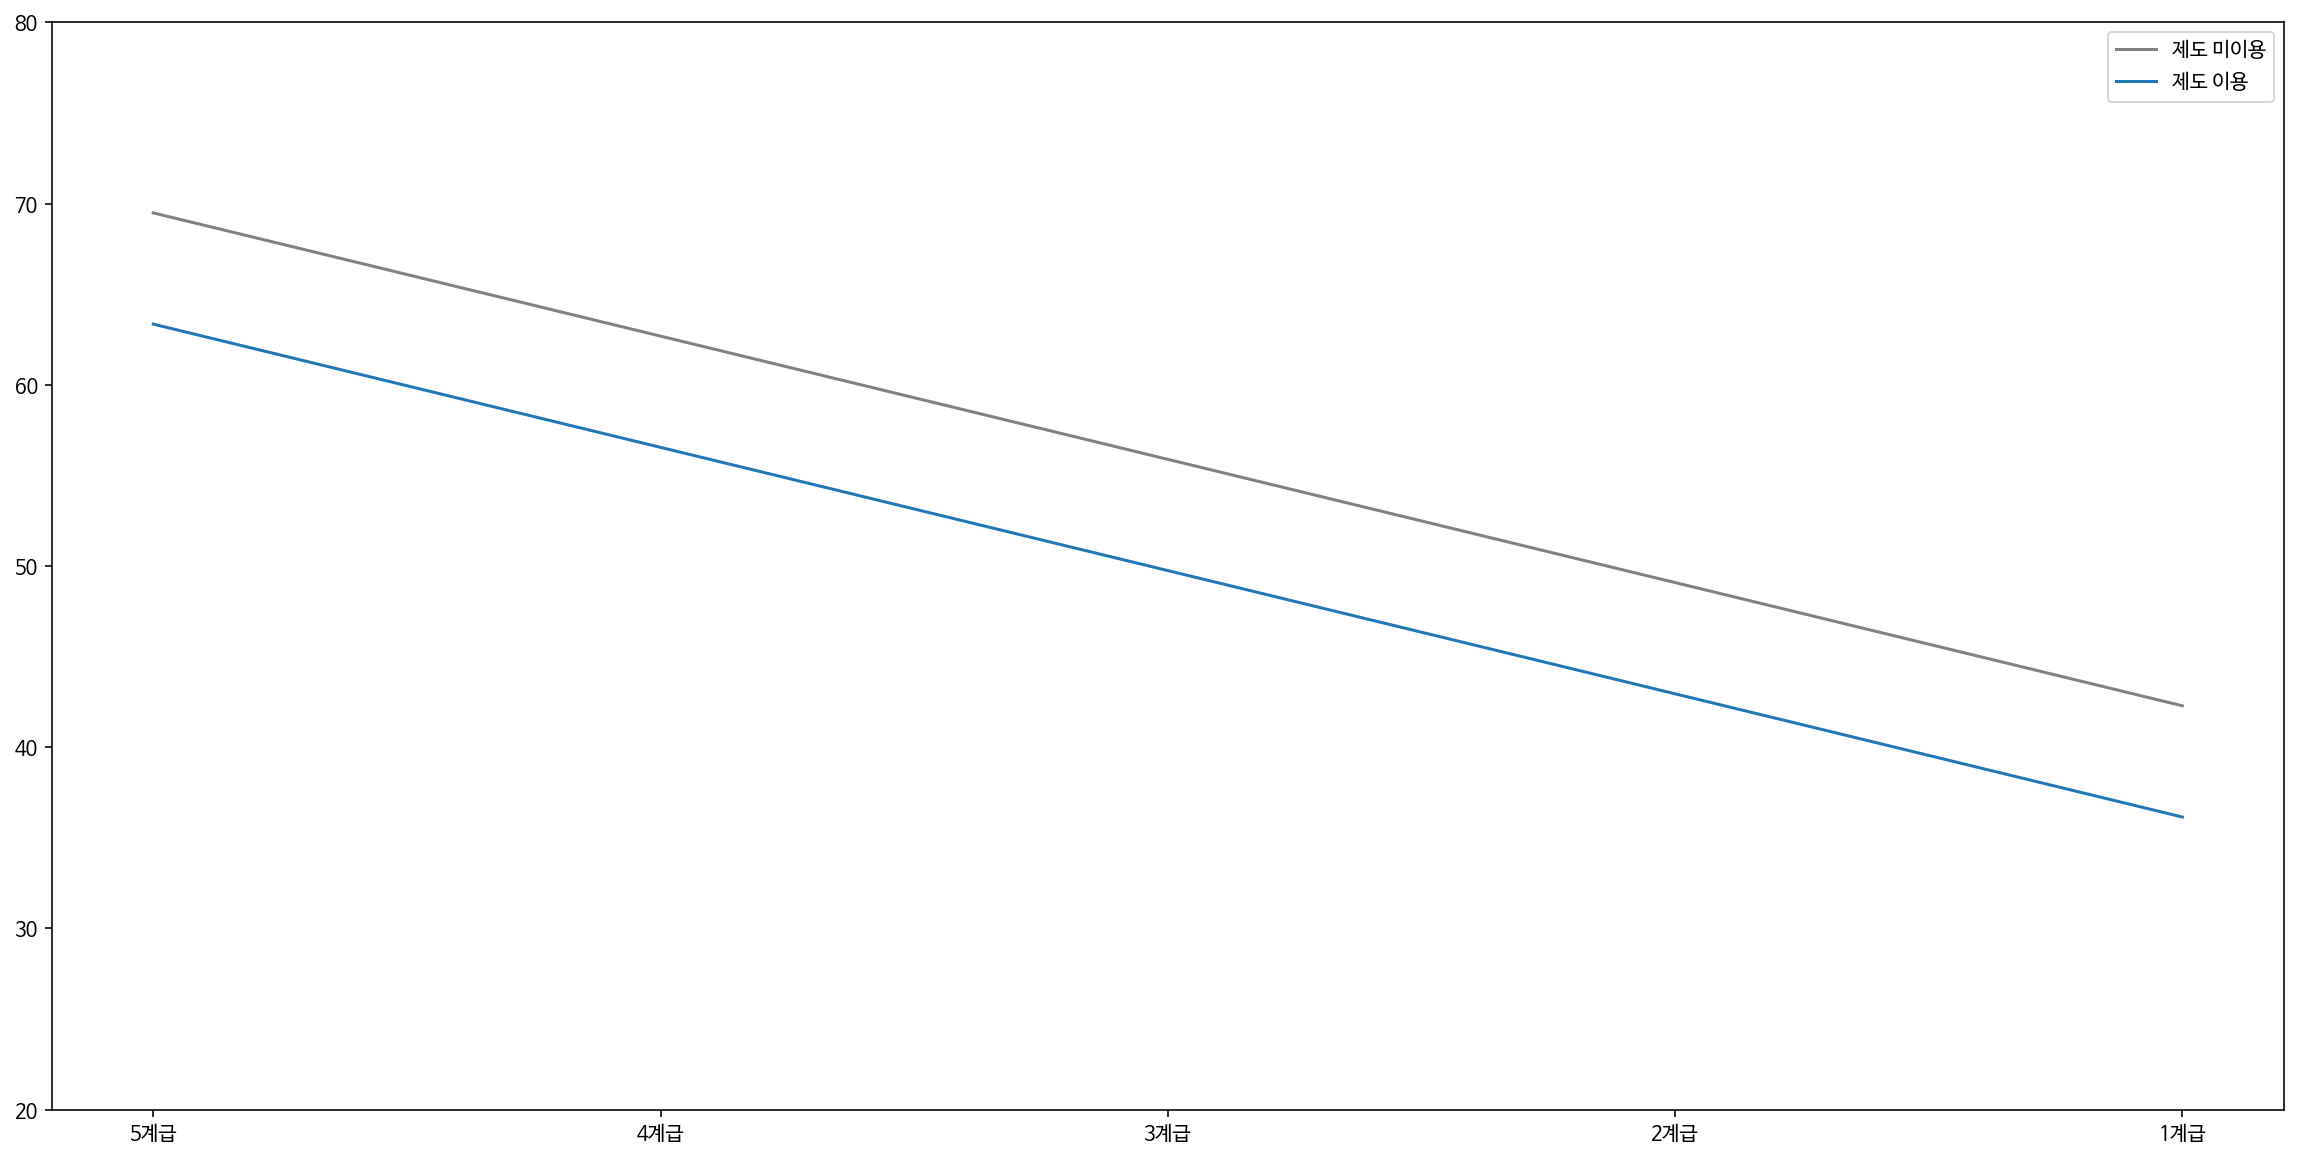

In [ ]:
# <청년전세대출제도 이용 여부에 따른 RIR의 변화>를 알아보기 위한 회귀식을 통한 예측치 확인
from matplotlib import pyplot as plt

# 청년전세대출 제도 이용 할 때의 예측치(1분위 기준)
x_values = ['5계급', '4계급', '3계급', '2계급', '1계급']
live1 = model4.predict([[1,1,5]])
live2 = model4.predict([[1,1,4]])
live3 = model4.predict([[1,1,3]])
live4 = model4.predict([[1,1,2]])
live5 = model4.predict([[1,1,1]])
live_values = [live1, live2, live3, live4, live5]

# 행복주택 거주 하지 않을 때의 예측치(1분위 기준)
non_live1 = model4.predict([[0,1,5]])
non_live2 = model4.predict([[0,1,4]])
non_live3 = model4.predict([[0,1,3]])
non_live4 = model4.predict([[0,1,2]])
non_live5 = model4.predict([[0,1,1]])
non_values = [non_live1, non_live2, non_live3, non_live4, non_live5]


plt.figure(figsize = (20,10))
plt.ylim(20,80)
plt.plot(x_values, non_values, label = '제도 미이용',color = 'gray')
plt.plot(x_values, live_values, label = '제도 이용')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

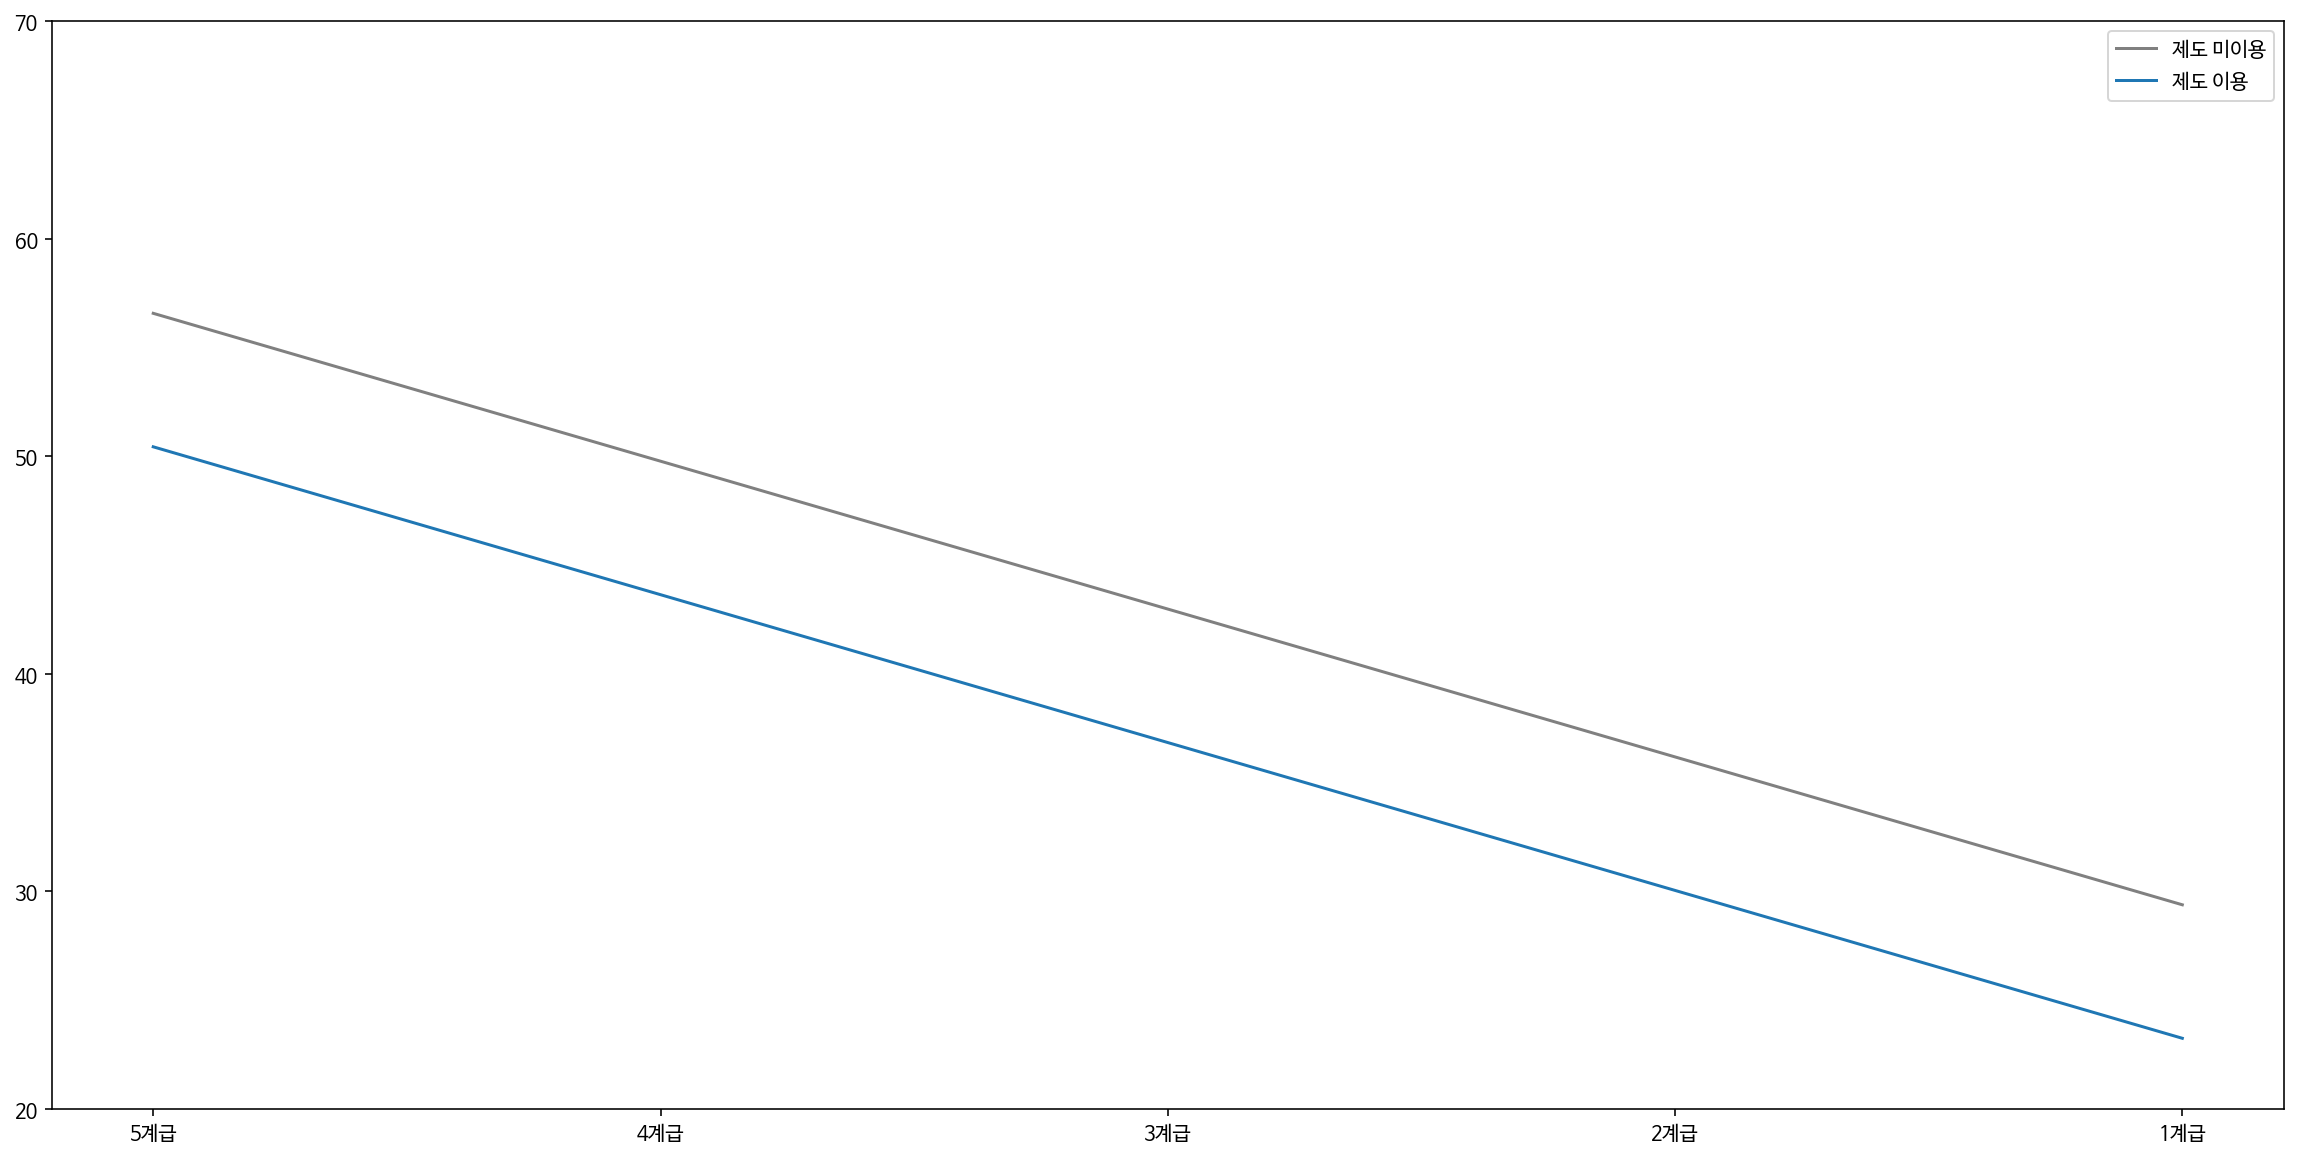

In [ ]:
# 전세대출 제도 이용 할 때의 예측치(2분위 기준)
x_values = ['5계급', '4계급', '3계급', '2계급', '1계급']
live6 = model4.predict([[1,2,5]])
live7 = model4.predict([[1,2,4]])
live8 = model4.predict([[1,2,3]])
live9 = model4.predict([[1,2,2]])
live10 = model4.predict([[1,2,1]])
live_values2 = [live6, live7, live8, live9, live10]

# 전세대출 제도 이용 하지 않을 때의 예측치(2분위 기준)
non_live6 = model4.predict([[0,2,5]])
non_live7 = model4.predict([[0,2,4]])
non_live8 = model4.predict([[0,2,3]])
non_live9 = model4.predict([[0,2,2]])
non_live10 = model4.predict([[0,2,1]])
non_values2 = [non_live6, non_live7, non_live8, non_live9, non_live10]

plt.figure(figsize = (20,10))
plt.ylim(20,70)
plt.plot(x_values, non_values2, label = '제도 미이용', color = 'gray')
plt.plot(x_values, live_values2, label = '제도 이용')
plt.legend()
plt.show()

In [ ]:
print(model4.predict([[1,2,1]]))

[23.23373333]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

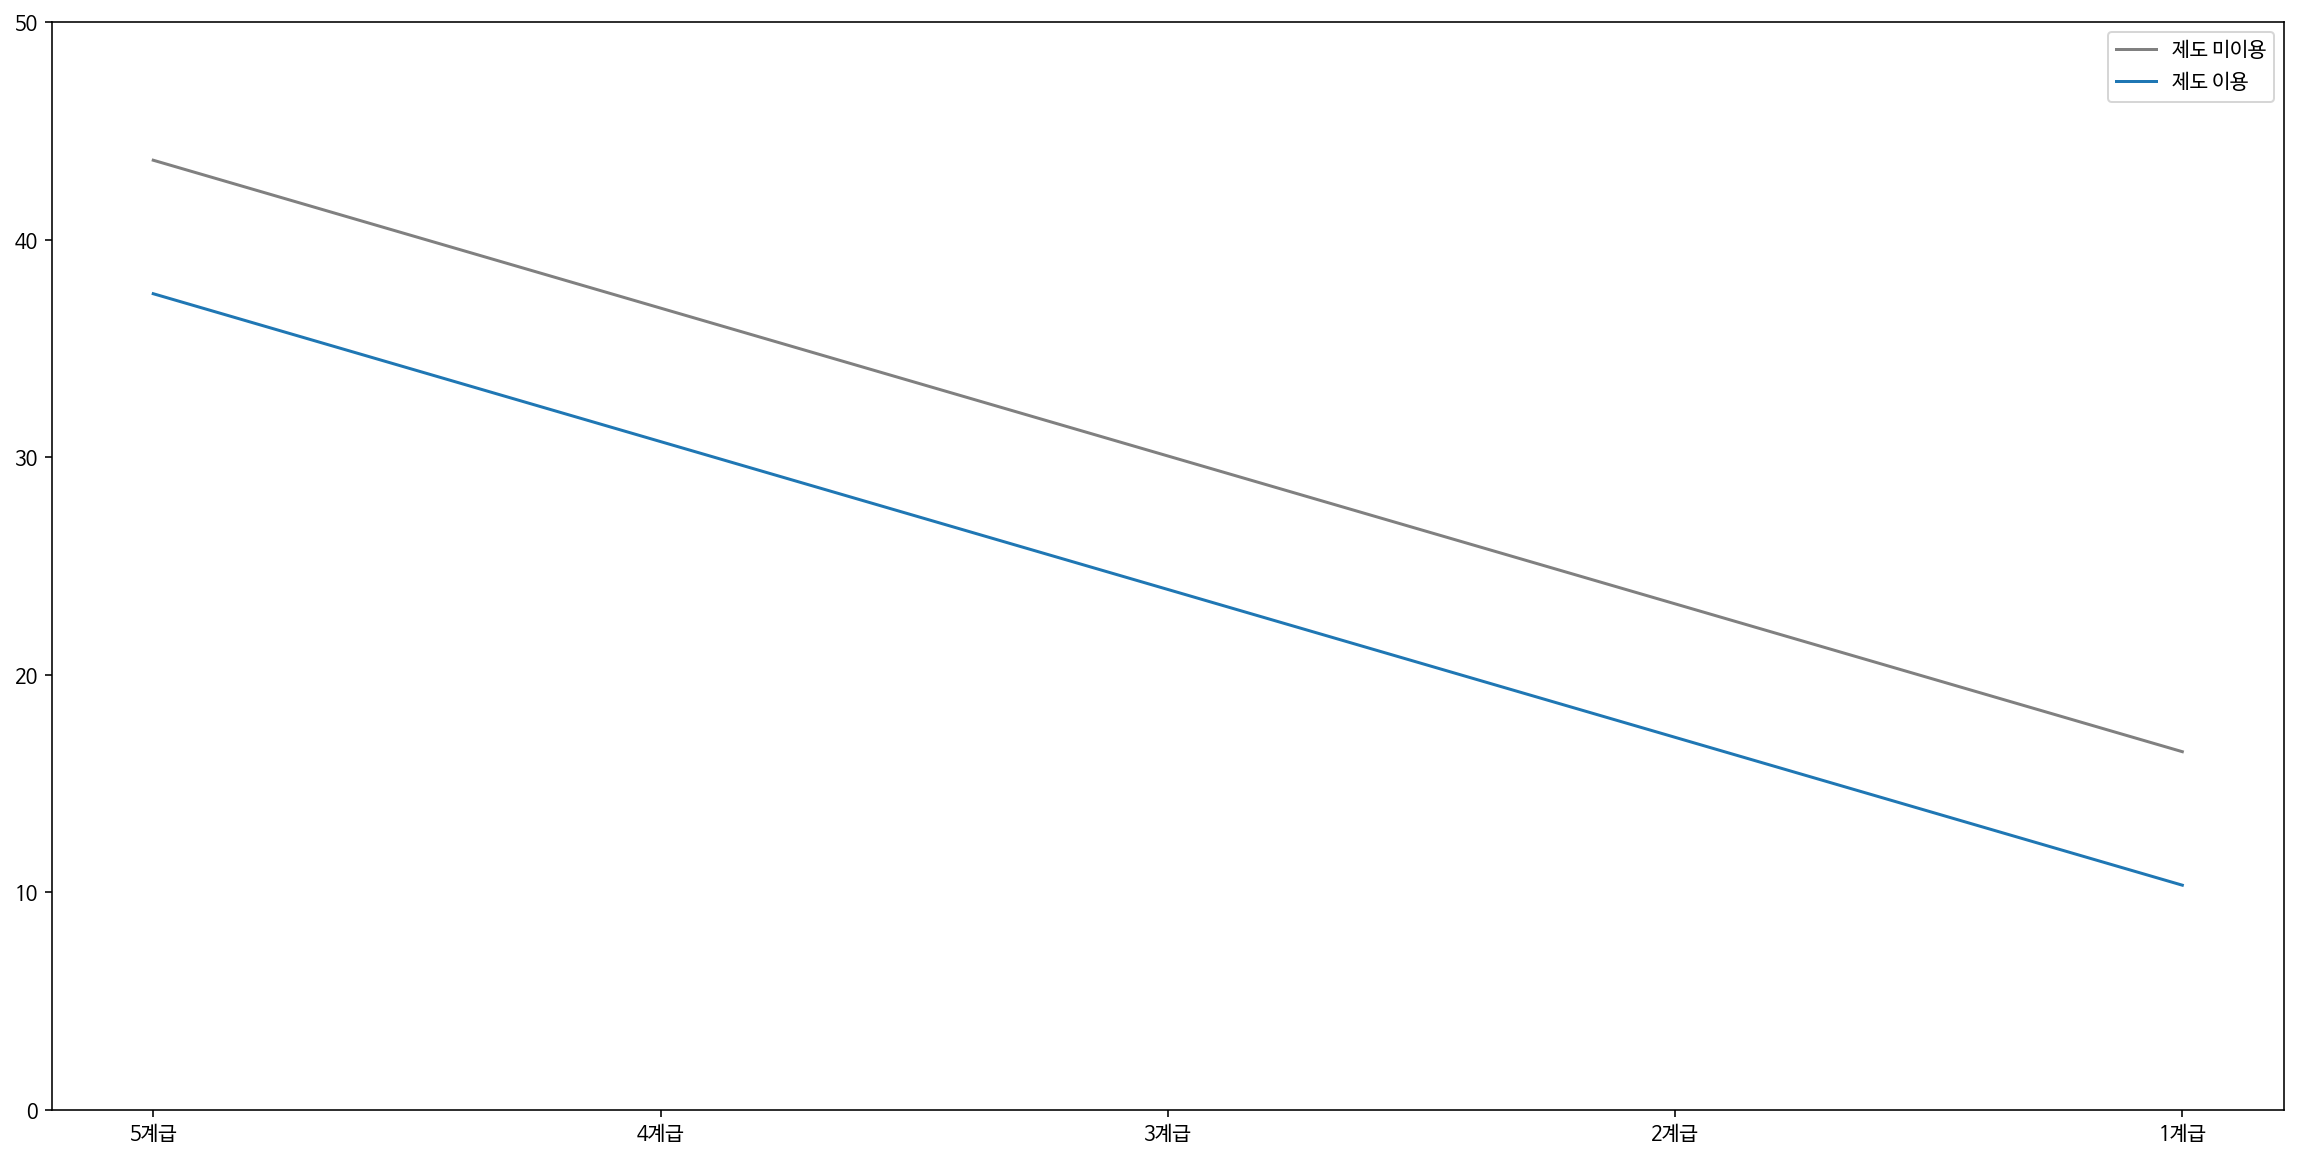

In [ ]:
# 전세대출 제도 이용 할 때의 예측치(3분위 기준)
x_values = ['5계급', '4계급', '3계급', '2계급', '1계급']
live6 = model4.predict([[1,3,5]])
live7 = model4.predict([[1,3,4]])
live8 = model4.predict([[1,3,3]])
live9 = model4.predict([[1,3,2]])
live10 = model4.predict([[1,3,1]])
live_values2 = [live6, live7, live8, live9, live10]

# 전세대출 제도 이용 하지 않을 때의 예측치(3분위 기준)
non_live6 = model4.predict([[0,3,5]])
non_live7 = model4.predict([[0,3,4]])
non_live8 = model4.predict([[0,3,3]])
non_live9 = model4.predict([[0,3,2]])
non_live10 = model4.predict([[0,3,1]])
non_values2 = [non_live6, non_live7, non_live8, non_live9, non_live10]

plt.figure(figsize = (20,10))
plt.ylim(0,50)
plt.plot(x_values, non_values2, label = '제도 미이용', color = 'gray')
plt.plot(x_values, live_values2, label = '제도 이용')
plt.legend()
plt.show()

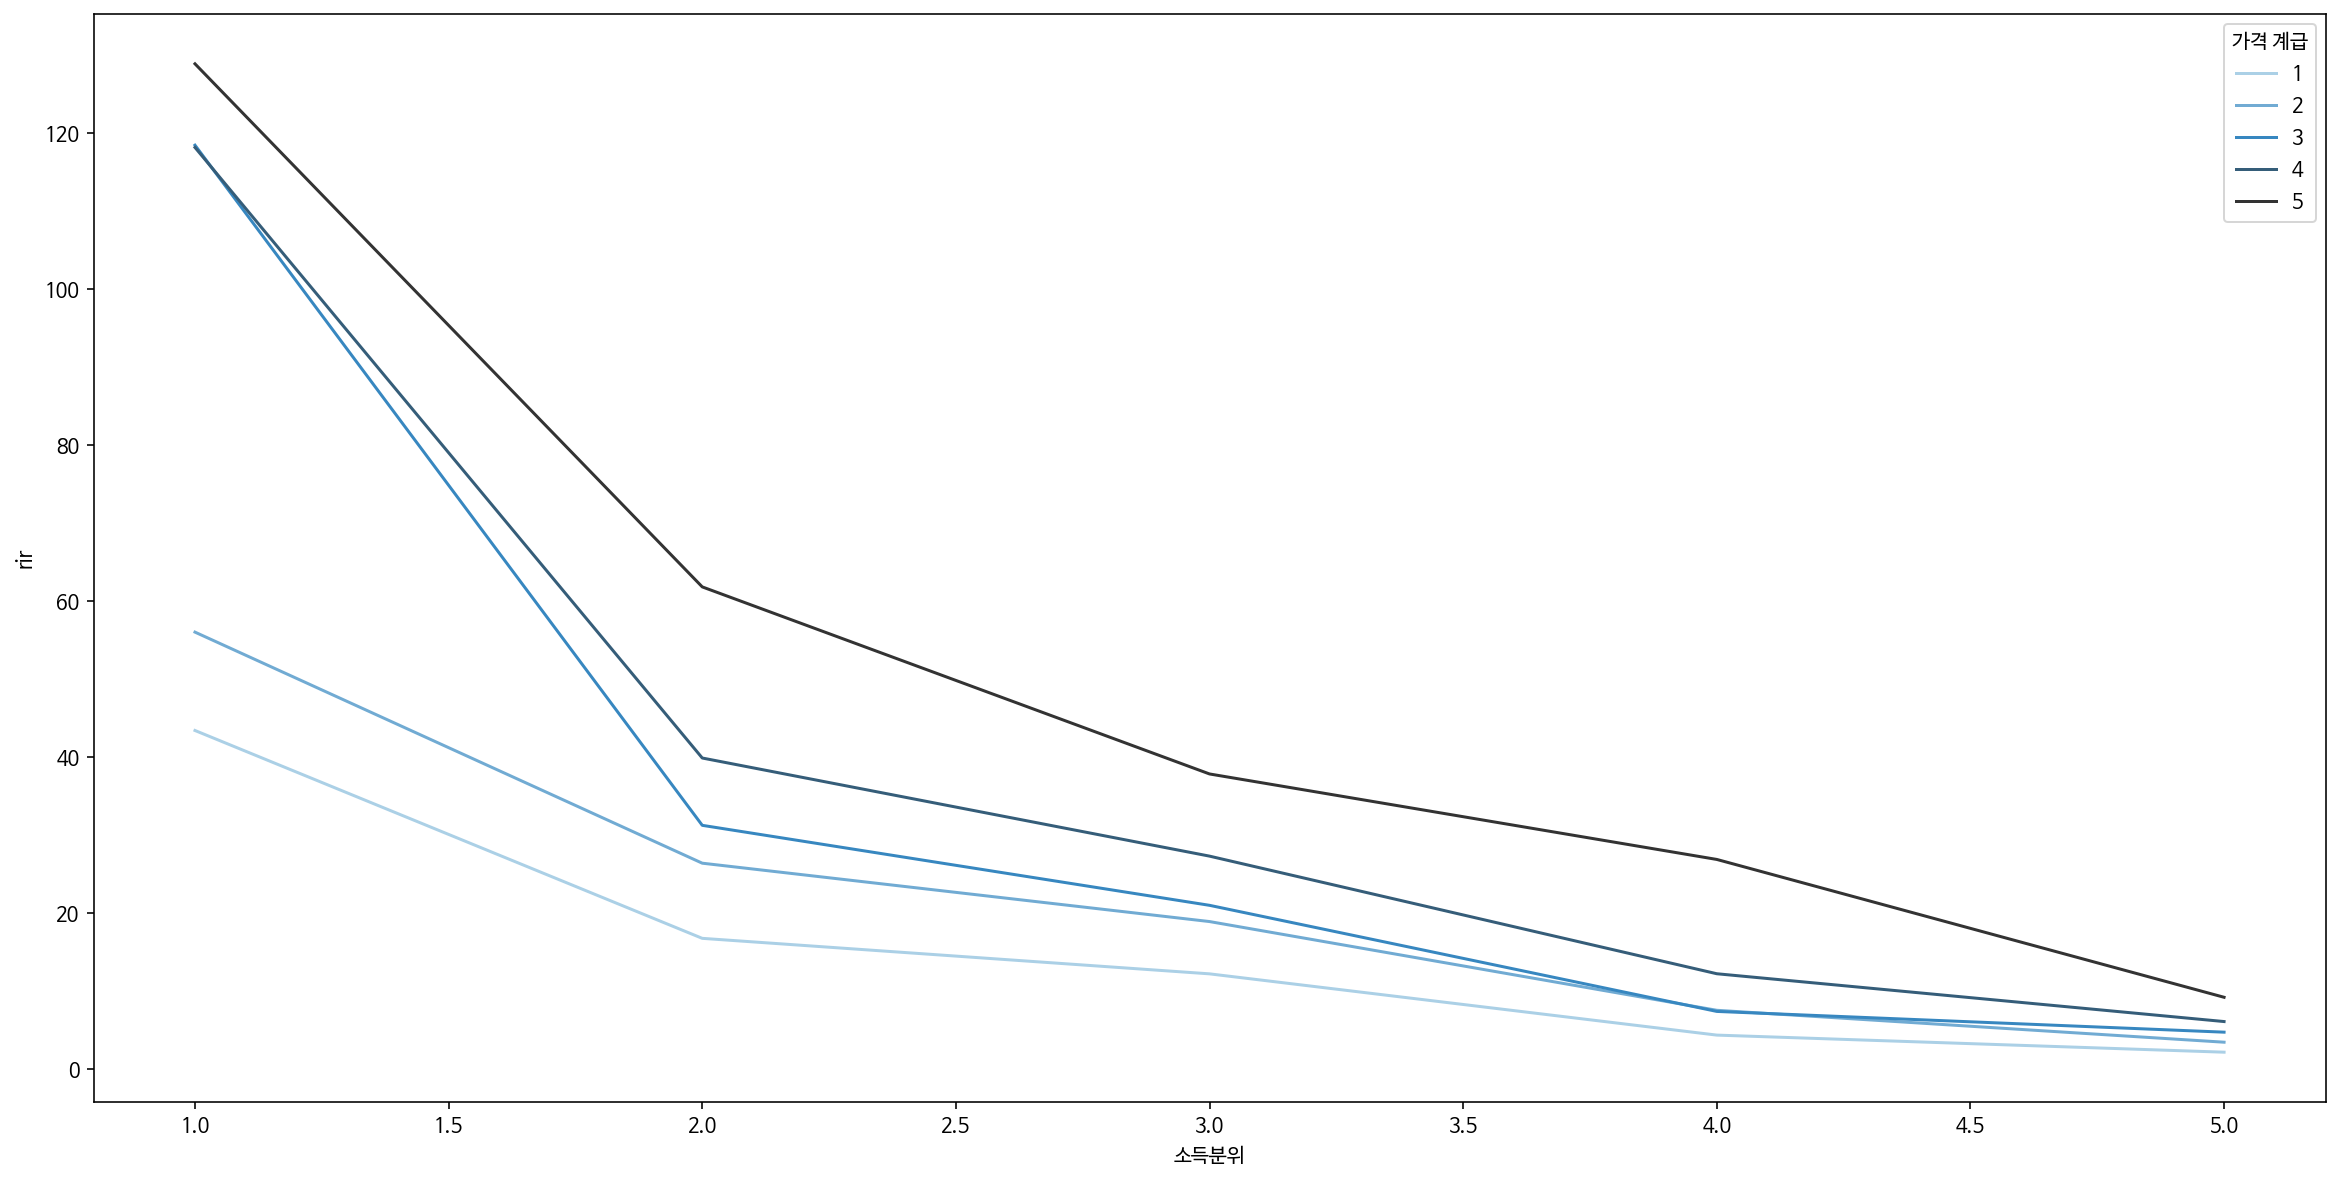

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x= '소득분위', y = 'rir', hue = '가격 계급', data = df_total, ci=None, palette='Blues_d')

# 4-1. 가설 검정

* 1. 모든 소득분위에서 행복주택 이용이 전세자금대출제도보다 주거비 부담 완화효과가 더 클 것이다.

    >  채택

* 2. 소득분위가 1분위에 해당할 경우 가장 낮은 주택 가격계급의 행복주택에 거주할 경우 소득 대비 주거비 부담율(RIR)을 25% 미만으로 낮출 수 있을 것이다.

    >  기각

* 3. 소득분위가 2분위에 해당할 경우 전세자금대출제도 이용만으로도 소득 대비 주거비 부담율(RIR)을 25%미만으로 
낮출 수 있을 것이다.
    >  기가

#4-2. 적용방안



*   소득 1분위 대상 행복주택 우선 공급 or 쿼터제
*   소득분위별 행복주택 주거비 조정
*   소득 2분위 대상 전세자금대출 확대 및 금리 우대

